In this project I will invistigate the Sea Ice Extent.  
First I will invistigate the statistics of the Ice extent in the northern and Southern Hemisphere.  
Then I will try to find if there is a relation between Ice extent and (Sea Surface Temperture, fresh water input from rivers).

In [237]:
# install these packages if needed
install.packages('gifski')
install.packages('gganimate')
install.packages('transformr') # needed for the annualk animation figure
install.packages("forecast")


Installing gifski [1.12.0-2] ...
	OK [linked cache]
Installing gganimate [1.0.8] ...
	OK [linked cache]
Installing transformr [0.1.4] ...
	OK [linked cache]


In [238]:
# # importing the needed libraries 
library(readr)
library(readxl)
library(gifski)
library(ggplot2)
library(forecast)
library(tidyverse)
library(gganimate)
library(transformr)

# Importing the Sea Icea data base from NSIDC

We used the 'Sea ice extent and area organized by year' data. It is obtained from National Snow and Ice Data Center NSIDC [website](https://nsidc.org/arcticseaicenews/sea-ice-tools/)


We will use the NH-Extent and SH-Extent data which contains sea ice extent data for the respective hemisphere. We chose the variable _Ice Sea Extent_ from the data because it is measured with a higher certainty than the _Ice Sea Area_ variable. 

Since the NSIDC data in Excel format, we invistigated it first in excel in our preliminary analysis. The data that we need ( The NH_sea_Ice and the SH_sea_Ice are the sheets 1 and 3)

In [239]:
# In this part of the code we download the excel from the NSIDC website.
# Then, In the next two steps:
#							We will work out the data from North Hemisphere NH sea ice
#							Then we will repeat the same work on data the South Hemisphere SH sea ice

# importing Sea ice extent and area organized by year from the NSIDC website  
NSIDC_url <- "https://masie_web.apps.nsidc.org/pub/DATASETS/NOAA/G02135/seaice_analysis/Sea_Ice_Index_Monthly_Data_by_Year_G02135_v3.0.xlsx"

# Data source with meta data and Spreadsheet Descriptions can be found at
# https://nsidc.org/arcticseaicenews/sea-ice-tools/


# Download the excel file to a temporary location
temp_file_NSIDC <- tempfile()
download.file(NSIDC_url, temp_file_NSIDC, mode = "wb")

## Importing the North Hemisphere NH sea ice

 The North Hemisphere NH sea ice data is on the sheet (1) from the excel file. It has the monthly values and annual ones. I will wrangle this sheet and make it two times series:  
 The _NH_monthly_ for the **Monthly** Sea Ice in the northeren Hemisphere.  
 The _NH_annual_ for **Annual** Sea Ice in the northeren Hemisphere.


### Monthly North Hemisphere sea ice ``NH_monthly``

In [240]:
# Read sheet (1) from the excel file
NH_monthly <- read_excel(temp_file_NSIDC, sheet = 1)

# Rename the A column to 'year'
colnames(NH_monthly)[1] <- 'year'

# Remove the column N and O because;
#				column N is empty
#				column O has inncorrected 'Annual' value based on missing data
NH_monthly <- NH_monthly[, -c(14, 15)]


# View the data
NH_monthly

New names:
• `` -> `...1`
• `` -> `...14`


year January February March  April  May    June   July   August September
1  1978     NA      NA       NA     NA     NA     NA     NA    NA     NA    
2  1979 15.414  16.175   16.342 15.447 13.857 12.530 10.311 8.041  7.051    
3  1980 14.862  15.955   16.041 15.429 13.793 12.205 10.100 7.984  7.667    
4  1981 14.910  15.604   15.632 15.010 13.802 12.430 10.271 7.844  7.138    
5  1982 15.177  15.974   16.044 15.466 13.973 12.476 10.367 8.139  7.302    
6  1983 14.942  16.006   16.085 15.172 13.491 12.296 10.570 8.186  7.395    
7  1984 14.473  15.299   15.584 15.015 13.577 12.152  9.977 7.771  6.805    
8  1985 14.725  15.466   15.886 15.357 14.073 12.219  9.744 7.402  6.698    
9  1986 14.890  15.785   15.910 15.059 13.379 11.976 10.146 7.979  7.411    
10 1987 14.970  16.050   15.816 15.211 13.743 12.486 10.333 7.628  7.279    
11 1988     NA  15.583   15.957 15.123 13.561 11.943  9.809 7.892  7.369    
12 1989 14.955  15.495   15.423 14.328 13.044 12.245 10.130 7.882  7.008    
13 1990 14.783  15.578   15.867 14.650 13.226 11.641  9.247 6.797  6.143    
14 1991 14.364  15.249   15.416 14.860 13.473 12.108  9.514 7.415  6.473    
15 1992 14.643  15.462   15.481 14.677 13.216 12.147 10.323 7.925  7.474    
16 1993 14.896  15.686   15.813 15.077 13.368 11.871  9.476 7.335  6.397    
17 1994 14.730  15.562   15.554 14.888 13.624 12.016  9.925 7.639  7.138    
18 1995 14.586  15.226   15.260 14.449 12.972 11.440  8.987 6.744  6.080    
19 1996 14.181  15.155   15.123 14.216 13.094 12.084 10.164 8.180  7.583    
20 1997 14.417  15.437   15.467 14.563 13.177 11.738  9.411 7.285  6.686    
21 1998 14.721  15.746   15.598 14.892 13.590 11.706  9.415 7.509  6.536    
22 1999 14.359  15.309   15.398 15.084 13.751 11.779  9.488 7.226  6.117    
23 2000 14.220  15.141   15.225 14.558 13.153 11.665  9.513 7.168  6.246    
24 2001 14.203  15.211   15.516 14.857 13.510 11.456  9.070 7.461  6.732    
25 2002 14.273  15.342   15.349 14.299 12.971 11.583  9.274 6.599  5.827    
26 2003 14.391  15.193   15.485 14.512 13.016 11.604  9.215 6.936  6.116    
27 2004 14.026  14.914   14.993 13.987 12.558 11.447  9.431 6.855  5.984    
28 2005 13.661  14.373   14.687 14.090 12.911 11.162  8.649 6.301  5.504    
29 2006 13.466  14.325   14.421 13.906 12.517 10.920  8.460 6.496  5.862    
30 2007 13.703  14.513   14.542 13.845 12.780 11.220  7.943 5.342  4.267    
31 2008 13.887  14.953   15.179 14.352 12.974 11.208  8.678 5.913  4.687    
32 2009 13.914  14.812   14.984 14.496 13.187 11.320  8.465 6.136  5.262    
33 2010 13.739  14.581   15.137 14.659 12.866 10.585  8.075 5.875  4.865    
34 2011 13.464  14.363   14.546 14.108 12.681 10.749  7.724 5.503  4.561    
35 2012 13.729  14.553   15.196 14.626 13.012 10.674  7.672 4.723  3.566    
36 2013 13.703  14.723   15.032 14.299 12.997 11.360  8.132 6.014  5.208    
37 2014 13.648  14.418   14.758 14.088 12.701 11.033  8.108 6.078  5.220    
38 2015 13.602  14.401   14.370 13.893 12.468 10.879  8.378 5.599  4.616    
39 2016 13.457  14.203   14.400 13.681 11.924 10.413  7.938 5.371  4.528    
40 2017 13.190  14.120   14.290 13.753 12.631 10.756  7.939 5.481  4.822    
41 2018 13.077  13.967   14.298 13.696 12.232 10.778  8.268 5.615  4.785    
42 2019 13.567  14.394   14.574 13.434 12.186 10.594  7.589 5.026  4.364    
43 2020 13.636  14.642   14.730 13.621 12.343 10.593  7.294 5.070  4.001    
44 2021 13.501  14.390   14.658 13.792 12.682 10.765  7.647 5.715  4.952    
45 2022 13.872  14.612   14.586 13.986 12.879 10.875  8.287 5.950  4.897    
46 2023 13.346  14.176   14.440 13.992 12.835 10.963  8.183 5.566  4.371    
   October November December
1     NA   11.645   13.667  
2  8.748   10.943   13.336  
3  9.183   11.383   13.593  
4  8.856   10.929   13.341  
5  9.421   11.627   13.642  
6  9.334   11.461   13.299  
7  8.561   10.842   12.989  
8  8.546   11.025   13.050  
9  9.484   11.453   13.222  
10 9.049   11.224       NA  
11 9.135   11.331   13.626  
12 8.829   11.115   13.387  
13 8.48

In [241]:
# Remove the first column of the data
NH_monthly <- NH_monthly[, -1]

# use pivot longer and keep only the data
NH_monthly <- pivot_longer(NH_monthly, January:December, names_to = "month", values_to = "extent_NH")[, "extent_NH"]

# Add the time_series as a date index column to NH_Extent_NSIDC_column
time_series <- seq(from = as.Date("1978-01-1"), to = as.Date("2023-12-1"), by = "1 month")
NH_monthly$date <- as.Date(time_series)

# We are doing this research in begin October 2023
# We need to remove the last three rows of NH_Extent_NSIDC_column because there is no measurments yet for all 2023
# There are also no measurments in the first ten months of 1978
NH_monthly <- NH_monthly[11:(nrow(NH_monthly)-3), ]

# Add (the year as integer) as a new column in NH_monthly
# This integer will be used later in the animation plot
NH_monthly$year <- as.integer(format(NH_monthly$date, "%Y"))

# Change the columns order 
NH_monthly <-NH_monthly[,3:1]

# View the updated dataframe
NH_monthly

year date       extent_NH
1   1978 1978-11-01 11.645   
2   1978 1978-12-01 13.667   
3   1979 1979-01-01 15.414   
4   1979 1979-02-01 16.175   
5   1979 1979-03-01 16.342   
6   1979 1979-04-01 15.447   
7   1979 1979-05-01 13.857   
8   1979 1979-06-01 12.530   
9   1979 1979-07-01 10.311   
10  1979 1979-08-01  8.041   
11  1979 1979-09-01  7.051   
12  1979 1979-10-01  8.748   
13  1979 1979-11-01 10.943   
14  1979 1979-12-01 13.336   
15  1980 1980-01-01 14.862   
16  1980 1980-02-01 15.955   
17  1980 1980-03-01 16.041   
18  1980 1980-04-01 15.429   
19  1980 1980-05-01 13.793   
20  1980 1980-06-01 12.205   
21  1980 1980-07-01 10.100   
22  1980 1980-08-01  7.984   
23  1980 1980-09-01  7.667   
24  1980 1980-10-01  9.183   
25  1980 1980-11-01 11.383   
26  1980 1980-12-01 13.593   
27  1981 1981-01-01 14.910   
28  1981 1981-02-01 15.604   
29  1981 1981-03-01 15.632   
30  1981 1981-04-01 15.010   
⋮   ⋮    ⋮          ⋮        
510 2021 2021-04-01 13.792   
511 2021 2021-05-01 12.682   
512 2021 2021-06-01 10.765   
513 2021 2021-07-01  7.647   
514 2021 2021-08-01  5.715   
515 2021 2021-09-01  4.952   
516 2021 2021-10-01  6.816   
517 2021 2021-11-01  9.830   
518 2021 2021-12-01 12.152   
519 2022 2022-01-01 13.872   
520 2022 2022-02-01 14.612   
521 2022 2022-03-01 14.586   
522 2022 2022-04-01 13.986   
523 2022 2022-05-01 12.879   
524 2022 2022-06-01 10.875   
525 2022 2022-07-01  8.287   
526 2022 2022-08-01  5.950   
527 2022 2022-09-01  4.897   
528 2022 2022-10-01  6.657   
529 2022 2022-11-01  9.725   
530 2022 2022-12-01 11.892   
531 2023 2023-01-01 13.346   
532 2023 2023-02-01 14.176   
533 2023 2023-03-01 14.440   
534 2023 2023-04-01 13.992   
535 2023 2023-05-01 12.835   
536 2023 2023-06-01 10.963   
537 2023 2023-07-01  8.183   
538 2023 2023-08-01  5.566   
539 2023 2023-09-01  4.371

In [242]:
# Here we will print out which measurment is missing in our NH data
missing_indices <- which(is.na(NH_monthly[['extent_NH']]))
NH_monthly$date[missing_indices]


[1] "1987-12-01" "1988-01-01"

In [243]:
# Interpolate the missing values in NH_Extent_NSIDC_column
NH_monthly$extent_NH <- approx(x = seq_along(NH_monthly$extent_NH),
                                          y = NH_monthly$extent_NH,
                                          xout = seq_along(NH_monthly$extent_NH))$y

NH_monthly

year date       extent_NH
1   1978 1978-11-01 11.645   
2   1978 1978-12-01 13.667   
3   1979 1979-01-01 15.414   
4   1979 1979-02-01 16.175   
5   1979 1979-03-01 16.342   
6   1979 1979-04-01 15.447   
7   1979 1979-05-01 13.857   
8   1979 1979-06-01 12.530   
9   1979 1979-07-01 10.311   
10  1979 1979-08-01  8.041   
11  1979 1979-09-01  7.051   
12  1979 1979-10-01  8.748   
13  1979 1979-11-01 10.943   
14  1979 1979-12-01 13.336   
15  1980 1980-01-01 14.862   
16  1980 1980-02-01 15.955   
17  1980 1980-03-01 16.041   
18  1980 1980-04-01 15.429   
19  1980 1980-05-01 13.793   
20  1980 1980-06-01 12.205   
21  1980 1980-07-01 10.100   
22  1980 1980-08-01  7.984   
23  1980 1980-09-01  7.667   
24  1980 1980-10-01  9.183   
25  1980 1980-11-01 11.383   
26  1980 1980-12-01 13.593   
27  1981 1981-01-01 14.910   
28  1981 1981-02-01 15.604   
29  1981 1981-03-01 15.632   
30  1981 1981-04-01 15.010   
⋮   ⋮    ⋮          ⋮        
510 2021 2021-04-01 13.792   
511 2021 2021-05-01 12.682   
512 2021 2021-06-01 10.765   
513 2021 2021-07-01  7.647   
514 2021 2021-08-01  5.715   
515 2021 2021-09-01  4.952   
516 2021 2021-10-01  6.816   
517 2021 2021-11-01  9.830   
518 2021 2021-12-01 12.152   
519 2022 2022-01-01 13.872   
520 2022 2022-02-01 14.612   
521 2022 2022-03-01 14.586   
522 2022 2022-04-01 13.986   
523 2022 2022-05-01 12.879   
524 2022 2022-06-01 10.875   
525 2022 2022-07-01  8.287   
526 2022 2022-08-01  5.950   
527 2022 2022-09-01  4.897   
528 2022 2022-10-01  6.657   
529 2022 2022-11-01  9.725   
530 2022 2022-12-01 11.892   
531 2023 2023-01-01 13.346   
532 2023 2023-02-01 14.176   
533 2023 2023-03-01 14.440   
534 2023 2023-04-01 13.992   
535 2023 2023-05-01 12.835   
536 2023 2023-06-01 10.963   
537 2023 2023-07-01  8.183   
538 2023 2023-08-01  5.566   
539 2023 2023-09-01  4.371

In [244]:
# Check if there is still any NA values in the NH_monthly
sum(is.na(NH_monthly$extent_NH))

[1] 0

The NH data is now a time series and there is no NA  
The following code will perform some exploratory data analysis on the imported NH data and provide some insights.

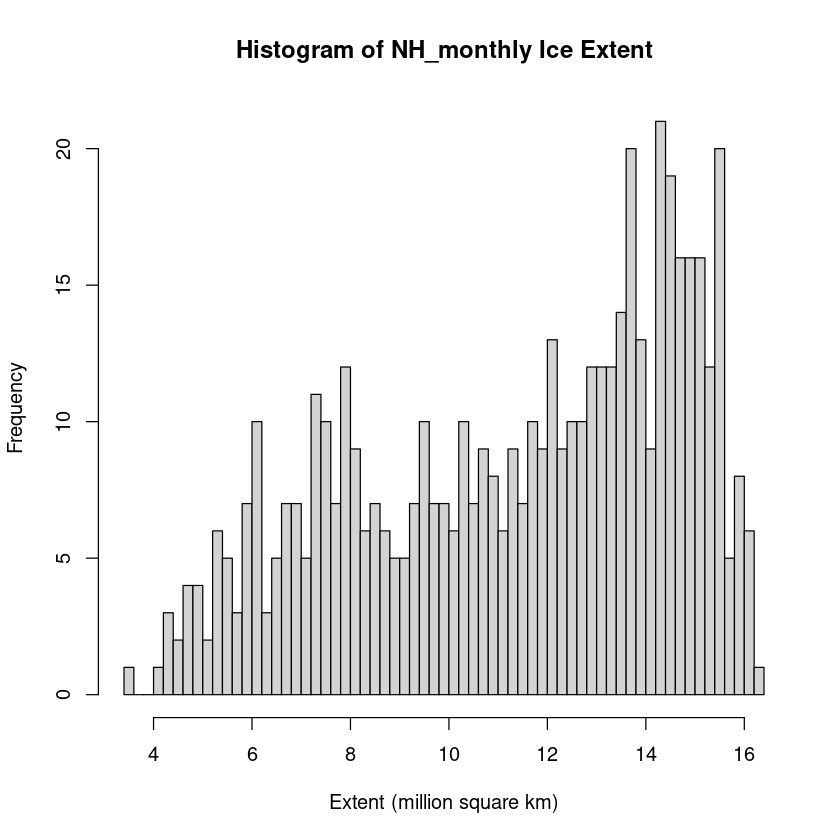

In [245]:
# Make a histogram of NH_monthly
hist(NH_monthly$extent_NH, main = "Histogram of NH_monthly Ice Extent", xlab = "Extent (million square km)", ylab = "Frequency", breaks = 80)

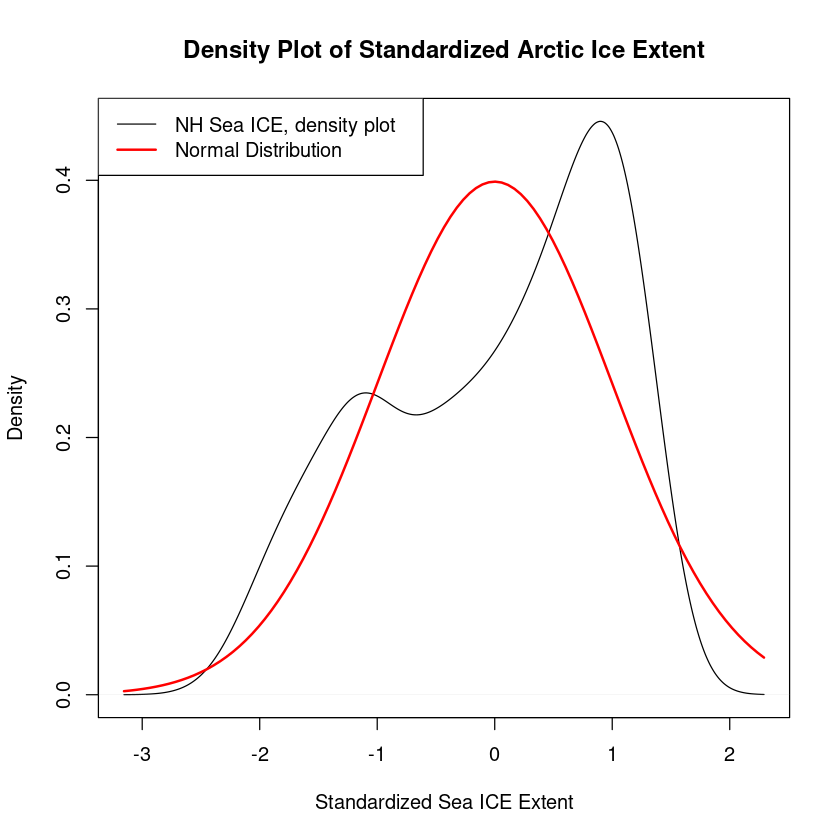

In [246]:
# Standardize the NH_monthly data
NH_monthly$z_value <- scale(NH_monthly$extent_NH)
# in the last line: The function 'scale()' standardizes the values of 'NH_monthly'
# This is done by subtracting the mean of the vector from each value and dividing the result by the standard deviation

# Create a density plot of the z values
plot(density(NH_monthly$z_value), main = "Density Plot of Standardized Arctic Ice Extent", xlab = "Standardized Sea ICE Extent", ylab = "Density")

# Overlay a normal distribution on the density plot
curve(dnorm(x, mean = mean(NH_monthly$z_value), sd = sd(NH_monthly$z_value)), add = TRUE, col = "red", lwd = 2)

# Add a legend
legend('topleft', legend = c("NH Sea ICE, density plot", "Normal Distribution"), col = c("black", "red"), lwd = c(1, 2), lty = c(1, 1))

previous visual inspection show that the North hemisphere Sea Ice (NH_monthly) data distribution is bimodal or even a multimodal and not a normal distribution. To confirm our visual inspection, we will run the Shapiro-Wilk test to check if the data is normal distribution.

In [247]:
# Run the Shapiro-Wilk test to check if the data is normally distributed
shapiro.test(NH_monthly$extent_NH)

# p-value is less than the chosen significance level (e.g., 0.05), we must reject the null hypothesis, indicating that the NH_monthly data is not normally distributed.


	Shapiro-Wilk normality test

data:  NH_monthly$extent_NH
W = 0.93632, p-value = 2.101e-14


The p-value of Shapiro-Wilk test is very low (2e-14), this confirm that the NH_monthly is **not** normally distributed

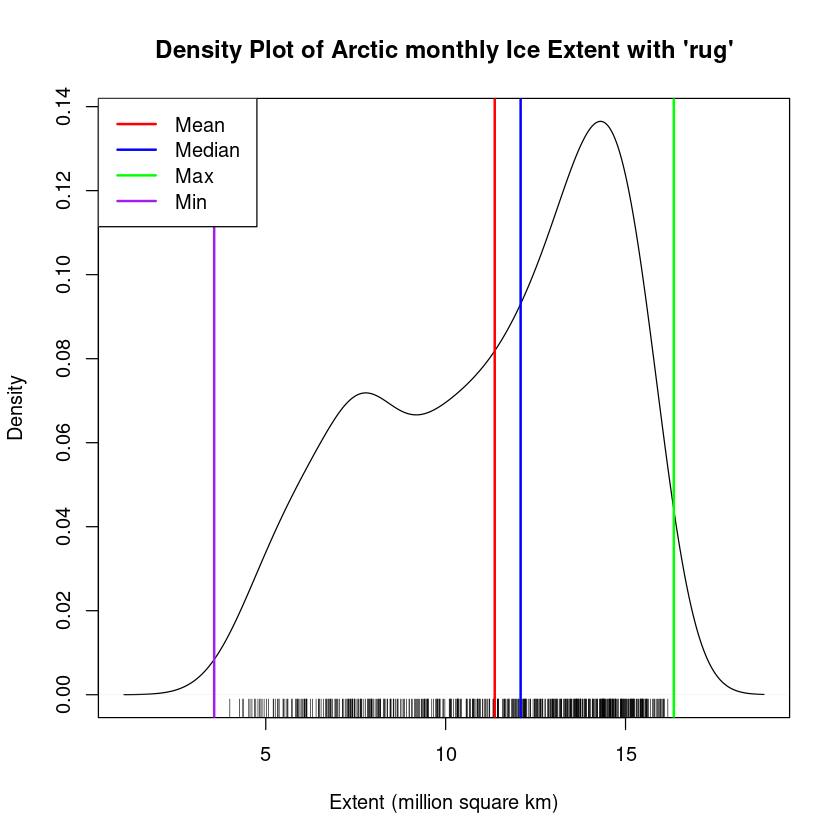

In [248]:
# Create a density plot of the z values with rug jitter
plot(density(NH_monthly$extent_NH), main = "Density Plot of Arctic monthly Ice Extent with 'rug'", xlab = "Extent (million square km)", ylab = "Density")
rug(jitter(NH_monthly$extent_NH))

# Add mean, median, max, and min as vertical lines
abline(v = mean(NH_monthly$extent_NH), col = "red", lwd = 2)
abline(v = median(NH_monthly$extent_NH), col = "blue", lwd = 2)
abline(v = max(NH_monthly$extent_NH), col = "green", lwd = 2)
abline(v = min(NH_monthly$extent_NH), col = "purple", lwd = 2)
# There is no mode value because all numeric values are unique 

# Add legend
legend("topleft", legend = c("Mean", "Median", "Max", "Min"), col = c("red", "blue", "green", "purple"), lwd = 2)

In [249]:
# Summary statistics of NH_monthly extent
summary(NH_monthly$extent_NH)

# The variance of NH_monthly extent
cat("The variance is:", round(var(NH_monthly$extent_NH), 1), "million (km to the Fourth power)", "\n")

# The standard deviation of NH_monthly extent
cat("Standard Deviation:", round(sd(NH_monthly$extent_NH), 1), "(million square km)", "\n")

# The range of NH_monthly extent
cat("The data range is:", round((range(NH_monthly$extent_NH)[2] - range(NH_monthly$extent_NH)[1]), 1), "(million square km)", "\n")


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.566   8.543  12.084  11.364  14.281  16.342 

The variance is: 10.7 million (km to the Fourth power) 
Standard Deviation: 3.3 (million square km) 
The data range is: 12.8 (million square km) 


In [250]:
# Check the asymmetry of the data by invistigating the skewness using the e1071 package
library(e1071)
cat("skewness value of:", round(skewness(NH_monthly$extent_NH), 1), "suggests that the data is slightly left-skewed", "\n")

skewness value of: -0.4 suggests that the data is slightly left-skewed 


In [251]:
# The kurtosis of NH_monthly extent
# kurtosis tells about the "tailedness" of the distribution and how data is distributed in the tails compared to a normal distribution

cat("kurtosis value of:", round(kurtosis(NH_monthly$extent_NH), 4), "indicates a platykurtic distribution", "\n")

kurtosis value of: -1.0125 indicates a platykurtic distribution 


The kurtosis value of -1.0125 indicates a platykurtic distribution; means that the tails of the distribution are lighter or have fewer extreme values compared to a normal distribution. This means that the dataset has lighter tails and is less prone to outliers or extreme values than a normal distribution. This could mean that the data is more spread out and less concentrated in the center.

Normal Distribution Comparison: A normal distribution has a kurtosis of 3, so a kurtosis value of -1.0125 suggests that the dataset has thinner tails and is less peaked in the center compared to a normal distribution.

The previous interpeation of kurtosis makes the latest event of '6.4-Sigma Event: Antarctic Sea Ice' very clear unexpected outlier from this distrbution.

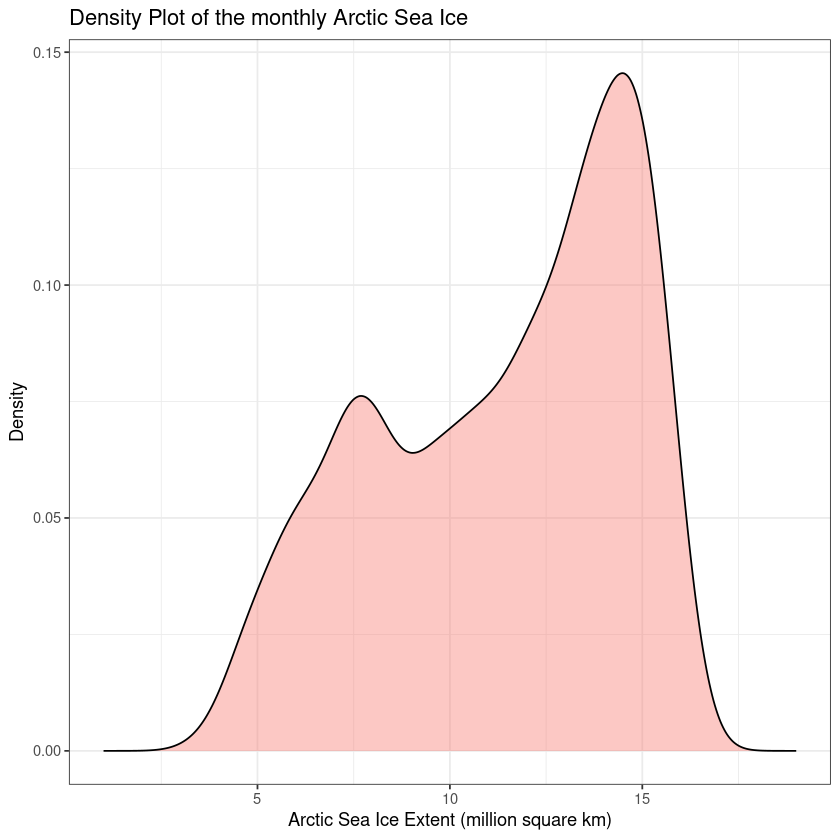

In [252]:
# Making a density plot that I will animate in the next step on annual basis
plot_to_animate <- ggplot() +
  geom_density(data = NH_monthly, aes(x = extent_NH, fill = "blue"), alpha = 0.4,bw=0.6) +
  xlab("Arctic Sea Ice Extent (million square km)") +
  ylab("Density") +
  labs(title = "Density Plot of the monthly Arctic Sea Ice") +
  xlim(1, 19) +
  theme_bw()+
  theme(legend.position = "none")

print(plot_to_animate)

In [253]:
# # We ran this part and then saved the result on GitHub. After that, it commented it to save the CPU. 
# # You could uncomment and rerun the code when the source data is updated, This way, you will get the latest SST and Sea Ice data.

# # I learned this animation in R from
# # https://www.datanovia.com/en/blog/gganimate-how-to-create-plots-with-beautiful-animation-in-r/

# theme_set(theme_bw())

# animated_plot <- plot_to_animate + transition_time(year) +
#   labs(title = "Year: {frame_time}") +
#   shadow_wake(wake_length = 0.1, alpha = FALSE)

# # Render the animation as a GIF
# animation_monthly_NH <- animate(animated_plot, renderer = gifski_renderer(), width = 800, height = 600)

# # Save the animated GIF
# anim_save("animation_monthly_NH.gif", animation_monthly_NH)

Here is the animated histogram for a year by year

![animated_plot.gif](https://raw.githubusercontent.com/alatieh/Statistics-of-the-Sea-Ice/main/figures/animation_monthly_NH.gif)


The climatological cycles are part of the Climate variability. Examples of these Oscillations are the El Niño–Southern Oscillation, the Arctic oscillation, and the Antarctic oscillation.  
The previous plot is far affected by the climatological Cycles because it was an annual density plot. We will use a 20-year plot in the following visualization to alleviate the Climatic variability effect. The choice of the 20 years fits our data range and eliminates _most_ climatic oscillations. Nevertheless, it could not eliminate low-frequency oscillations like the Antarctic oscillation or the data measurement error.

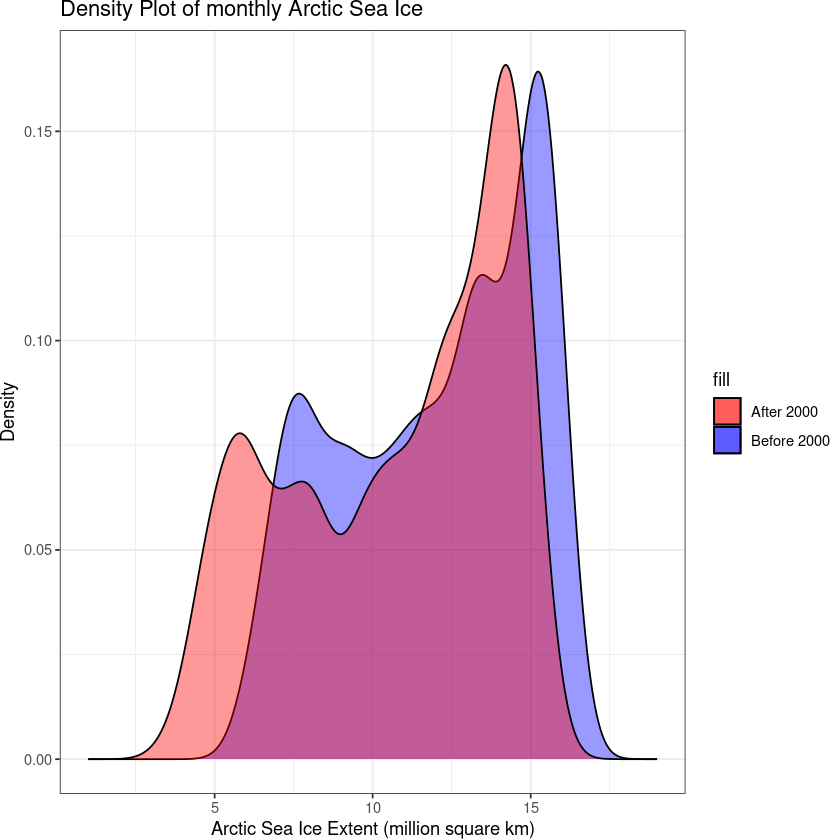

In [254]:
# Filter NH_monthly data before 2000
NH_monthly_before_2000 <- NH_monthly[NH_monthly$date < as.Date("2000-01-01"), ]

# Filter NH_monthly data after 2000
NH_monthly_after_2000 <- NH_monthly[NH_monthly$date >= as.Date("2000-01-01"), ]

# Create a new plot with both density plot, I used bandwidth parameter of 0.6
NH_density2groups <- ggplot() +
  geom_density(data = NH_monthly_before_2000, aes(x = extent_NH, fill = "Before 2000"), alpha = 0.4,bw=0.6) +
  geom_density(data = NH_monthly_after_2000, aes(x = extent_NH, fill = "After 2000"), alpha = 0.4,bw=0.6) +
  xlab("Arctic Sea Ice Extent (million square km)") +
  ylab("Density") +
  labs(title = "Density Plot of monthly Arctic Sea Ice") +
  scale_fill_manual(values = c("Before 2000" = "blue", "After 2000" = "red")) +
  xlim(1, 19) +
  theme_bw() +
  theme(plot.margin = margin(l = 0, r = 0))

ggsave("NH_density2groups.png", plot = NH_density2groups, width = 10, height = 4)
print(NH_density2groups)

# I used the bandwidth of 0.6 in the density plot.
# The bandwidth determine the plot smoothness
# The bandwidth is same as the parameter of 'bins number' in a histogram so there is no value as 'The correct one' 
# I tried till I found one that fit the need
# The code below provide an interactive interface to choose a bandwidth.

# data(NH_monthly, package = "MASS")
# source("http://homepage.divms.uiowa.edu/~luke/classes/STAT7400/examples/shinydens.R")
# shinyDens(NH_monthly$extent_NH)

# The code source
# https://homepage.divms.uiowa.edu/~luke/classes/STAT4580-2020/dists.html

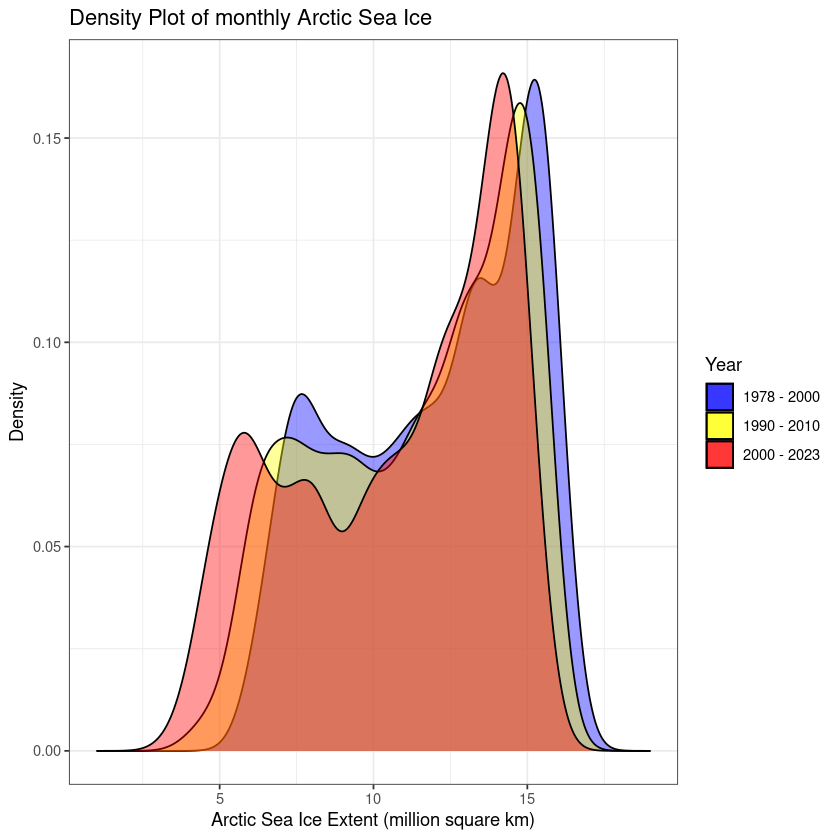

In [255]:
# Filter NH_monthly data from 1978 to 2000
NH_monthly_1978_2000 <- NH_monthly[NH_monthly$date < as.Date("2000-01-01"),]

# Filter NH_monthly data from 1990 to 2010
NH_monthly_1990_2010 <- NH_monthly[NH_monthly$date >= as.Date("1990-01-01") & NH_monthly$date < as.Date("2010-01-01"),]

# Filter NH_monthly data from 2000 to 2023
NH_monthly_2000_2023 <- NH_monthly[NH_monthly$date >= as.Date("2000-01-01"),]

# Create a new plot with three density plots
NH_density3groups <- ggplot() +
  geom_density(data = NH_monthly_1978_2000, aes(x = extent_NH, fill = "1978 - 2000"), alpha = 0.4,bw=0.6) +
  geom_density(data = NH_monthly_1990_2010, aes(x = extent_NH, fill = "1990 - 2010"), alpha = 0.4,bw=0.6) +
  geom_density(data = NH_monthly_2000_2023, aes(x = extent_NH, fill = "2000 - 2023"), alpha = 0.4,bw=0.6) +
  xlab("Arctic Sea Ice Extent (million square km)") +
  ylab("Density") +
  labs(title = "Density Plot of monthly Arctic Sea Ice") +
  scale_fill_manual(values = c("1978 - 2000" = "blue", "1990 - 2010" = "yellow", "2000 - 2023" = "red")) +
  guides(fill = guide_legend(title = "Year")) +
  xlim(1, 19) +
  theme_bw()

ggsave("NH_density3groups.png", plot = NH_density2groups, width = 10, height = 4)
print(NH_density3groups)

In [256]:
# # We ran this part and then saved the result on GitHub. After that, it commented it to save the CPU. 
# # You could uncomment and rerun the code when the source data is updated, This way, you will get the latest SST and Sea Ice data.

# # Save the three density plots as png images then combine them in one gif 

# ggsave(filename = "1978_to_2000.png", plot = ggplot() +
#   geom_density(data = NH_monthly_1978_2000, aes(x = extent_NH, fill = "1978 - 2000"), alpha = 0.4,bw=0.6) +
#   xlab("Arctic Sea Ice Extent (million square km") +
#   ylab("Density") +
#   labs(title = "Density Plot of monthly Arctic Sea Ice") +
#   scale_fill_manual(values = c("1978 - 2000" = "blue", "1990 - 2010" = "yellow", "2000 - 2023" = "red")) +
#   guides(fill = guide_legend(title = "Year")) +
#   xlim(1, 19) +
#   theme_bw())

# ggsave(filename = "1990_to_2010.png", plot = ggplot() +
#   geom_density(data = NH_monthly_1978_2000, aes(x = extent_NH, fill = "1978 - 2000"), alpha = 0.4,bw=0.6) +
#   geom_density(data = NH_monthly_1990_2010, aes(x = extent_NH, fill = "1990 - 2010"), alpha = 0.4,bw=0.6) +
#   xlab("Arctic Sea Ice Extent (million square km") +
#   ylab("Density") +
#   labs(title = "Density Plot of monthly Arctic Sea Ice") +
#   scale_fill_manual(values = c("1978 - 2000" = "blue", "1990 - 2010" = "yellow", "2000 - 2023" = "red")) +
#   guides(fill = guide_legend(title = "Year")) +
#   xlim(1, 19) +
#   theme_bw())

# ggsave(filename = "2000_to_2023.png", plot = ggplot() +
#   geom_density(data = NH_monthly_1978_2000, aes(x = extent_NH, fill = "1978 - 2000"), alpha = 0.4,bw=0.6) +
#   geom_density(data = NH_monthly_1990_2010, aes(x = extent_NH, fill = "1990 - 2010"), alpha = 0.4,bw=0.6) +
#   geom_density(data = NH_monthly_2000_2023, aes(x = extent_NH, fill = "2000 - 2023"), alpha = 0.4,bw=0.6) +
#   xlab("Arctic Sea Ice Extent (million square km") +
#   ylab("Density") +
#   labs(title = "Density Plot of monthly Arctic Sea Ice") +
#   scale_fill_manual(values = c("1978 - 2000" = "blue", "1990 - 2010" = "yellow", "2000 - 2023" = "red")) +
#   guides(fill = guide_legend(title = "Year")) +
#   xlim(1, 19) +
#   theme_bw())


# # Create a list of the three image filenames
# image_files <- c("1978_to_2000.png", "1990_to_2010.png", "2000_to_2023.png")

# # Combine the images into an animated gif
# gifski::gifski(image_files, gif_file = "NH_Monthly_gif_3_phases.gif")

Here is the animated gif for the periods 1978_to_2000, 1990_to_2010, and 2000_to_2023:

![animated gif](https://raw.githubusercontent.com/alatieh/Statistics-of-the-Sea-Ice/main/figures/NH_Monthly_gif_3_phases.gif)

**Visually**, The declining trend is evident  in the density plot above between the two time periods (1978_to_2000,and 2000_to_2023). We need to test this declining numerically. We will test in the following code the hypothesis that the means of these three series are significantly equal.

In [257]:
# Perform t-test to compare means of NH_monthly_before_2000 and NH_monthly_after_2000
t_test_result <- t.test(NH_monthly_before_2000$extent_NH, NH_monthly_after_2000$extent_NH)

# Print the result
t_test_result


	Welch Two Sample t-test

data:  NH_monthly_before_2000$extent_NH and NH_monthly_after_2000$extent_NH
t = 4.473, df = 536.95, p-value = 9.421e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.6900292 1.7707137
sample estimates:
mean of x mean of y 
 12.01451  10.78414 


From the t-test above between the two periods (before 2000 and after 2000), we conclude that:
* There is a statistically significant decline trend in the monthly Ice extent in the Arctic
* The chance that such decline is from data noise is  9.421e-06


The importance of finding the Sea Ice response to global warming is now more than evident after the last conclusion that the Arctic sea ice is declining **significantly**. To study ice-response to climatic change, we could investigate the seasonality of sea ice extent. Then, if the time helped, its relationship with the Sea Surface Temperature SST.  

![image](https://www.pnas.org/cms/10.1073/pnas.1810141115/asset/12192d48-1713-40f0-8c6c-b4bcd60ed0c9/assets/graphic/pnas.1810141115fig02.jpeg)


Photo from the famous paper of (Steffen, et al., 2018) [paper link](https://www.pnas.org/doi/pdf/10.1073/pnas.1810141115)

Sea Ice responds directly to temperature fluctuations by building or melting Ice. The critical issue in Climate Change is the stability zone range of this response mechanism and the Hysteresis between the two paths of building or melting Sea Ice. The figure above explains the stability zone. Can the system completely shut off and alter the fluctuations pattern, or is it a temporary shift inside the range of the stability zone?   
In the following code, I will explore the seasonal cycles of building and melting Sea Ice and if there is a hysteresis.

In [258]:
# Here we made a 'decimal date' column which will help us in the next calculation

# Create a new column 'decimal date' in the NH_monthly dataframe
NH_monthly$decimal_date <- as.numeric(format(NH_monthly$date, "%Y")) + as.numeric(format(NH_monthly$date, "%j")) / 365

# View the updated NH_monthly dataframe
NH_monthly

year date       extent_NH z_value      decimal_date
1   1978 1978-11-01 11.645     0.086051674 1978.836    
2   1978 1978-12-01 13.667     0.705133620 1978.918    
3   1979 1979-01-01 15.414     1.240017973 1979.003    
4   1979 1979-02-01 16.175     1.473015679 1979.088    
5   1979 1979-03-01 16.342     1.524146581 1979.164    
6   1979 1979-04-01 15.447     1.250121684 1979.249    
7   1979 1979-05-01 13.857     0.763306504 1979.332    
8   1979 1979-06-01 12.530     0.357014840 1979.416    
9   1979 1979-07-01 10.311    -0.322383201 1979.499    
10  1979 1979-08-01  8.041    -1.017396069 1979.584    
11  1979 1979-09-01  7.051    -1.320507408 1979.668    
12  1979 1979-10-01  8.748    -0.800931709 1979.751    
13  1979 1979-11-01 10.943    -0.128881821 1979.836    
14  1979 1979-12-01 13.336     0.603790334 1979.918    
15  1980 1980-01-01 14.862     1.071010438 1980.003    
16  1980 1980-02-01 15.955     1.405657603 1980.088    
17  1980 1980-03-01 16.041     1.431988487 1980.167    
18  1980 1980-04-01 15.429     1.244610569 1980.252    
19  1980 1980-05-01 13.793     0.743711427 1980.334    
20  1980 1980-06-01 12.205     0.257508593 1980.419    
21  1980 1980-07-01 10.100    -0.386985719 1980.501    
22  1980 1980-08-01  7.984    -1.034847934 1980.586    
23  1980 1980-09-01  7.667    -1.131904797 1980.671    
24  1980 1980-10-01  9.183    -0.667746423 1980.753    
25  1980 1980-11-01 11.383     0.005834329 1980.838    
26  1980 1980-12-01 13.593     0.682476813 1980.921    
27  1981 1981-01-01 14.910     1.085706746 1981.003    
28  1981 1981-02-01 15.604     1.298190856 1981.088    
29  1981 1981-03-01 15.632     1.306763702 1981.164    
30  1981 1981-04-01 15.010     1.116324053 1981.249    
⋮   ⋮    ⋮          ⋮         ⋮            ⋮           
510 2021 2021-04-01 13.792     0.7434053   2021.249    
511 2021 2021-05-01 12.682     0.4035531   2021.332    
512 2021 2021-06-01 10.765    -0.1833806   2021.416    
513 2021 2021-07-01  7.647    -1.1380283   2021.499    
514 2021 2021-08-01  5.715    -1.7295546   2021.584    
515 2021 2021-09-01  4.952    -1.9631647   2021.668    
516 2021 2021-10-01  6.816    -1.3924581   2021.751    
517 2021 2021-11-01  9.830    -0.4696524   2021.836    
518 2021 2021-12-01 12.152     0.2412814   2021.918    
519 2022 2022-01-01 13.872     0.7678991   2022.003    
520 2022 2022-02-01 14.612     0.9944672   2022.088    
521 2022 2022-03-01 14.586     0.9865067   2022.164    
522 2022 2022-04-01 13.986     0.8028028   2022.249    
523 2022 2022-05-01 12.879     0.4638692   2022.332    
524 2022 2022-06-01 10.875    -0.1497016   2022.416    
525 2022 2022-07-01  8.287    -0.9420775   2022.499    
526 2022 2022-08-01  5.950    -1.6576040   2022.584    
527 2022 2022-09-01  4.897    -1.9800042   2022.668    
528 2022 2022-10-01  6.657    -1.4411396   2022.751    
529 2022 2022-11-01  9.725    -0.5018006   2022.836    
530 2022 2022-12-01 11.892     0.1616764   2022.918    
531 2023 2023-01-01 13.346     0.6068521   2023.003    
532 2023 2023-02-01 14.176     0.8609757   2023.088    
533 2023 2023-03-01 14.440     0.9418054   2023.164    
534 2023 2023-04-01 13.992     0.8046399   2023.249    
535 2023 2023-05-01 12.835     0.4503976   2023.332    
536 2023 2023-06-01 10.963    -0.1227584   2023.416    
537 2023 2023-07-01  8.183    -0.9739195   2023.499    
538 2023 2023-08-01  5.566    -1.7751744   2023.584    
539 2023 2023-09-01  4.371    -2.1410512   2023.668

In [259]:
#       ❄️❄️❄️❄️❄️❄️❄ ❄ ❄ ❄ ❄ ❄ ❄ ❄ ❄ Investigating Arctic Sea Ice Hysteresis ❄ ❄  ❄ ❄ ❄ ❄ ❄ ❄ ❄ ❄️❄️❄️❄️❄️❄️


# method 1 that I tried but I will not use it anymore because the resultion is small
# It was by using the 'decimal date'. 
# every year is a complete cycle of both (building cycle and melting ice cycle)
# So I need to plot on the x-axis both 6-months melting and 6-months freezing above each other
# If we take the sin of (2 pi times the date) we will get identical value for every month
# The next plot I will plot the ice extent on the y axis and the sin of (2 pi times the date) on the x axis
# we will get 12 clusters for the 12 months. 

To check the Hysteresis on higher temporal resolution further, I will import the **Daily** Arctic sea ice extent 1981-2010 climatology from NSIDC and plot it. [link](https://nsidc.org/arcticseaicenews/sea-ice-tools/)

In [260]:
# Set the URL for the Daily_sea_Ice data
Daily_sea_Ice_link <- "https://masie_web.apps.nsidc.org/pub//DATASETS/NOAA/G02135/north/daily/data/N_seaice_extent_climatology_1981-2010_v3.0.csv"

# Read the data from the URL, skipping the first row and selecting only the first two columns
Daily_sea_Ice <- read_csv(Daily_sea_Ice_link, skip = 2, col_names = c("Day_of_year", "Extent"), col_types = cols(Day_of_year = col_number()))[, 1:2]

Daily_sea_Ice

Day_of_year Extent
1    1          13.778
2    2          13.842
3    3          13.891
4    4          13.930
5    5          13.978
6    6          14.028
7    7          14.091
8    8          14.132
9    9          14.170
10  10          14.196
11  11          14.245
12  12          14.275
13  13          14.328
14  14          14.369
15  15          14.405
16  16          14.448
17  17          14.489
18  18          14.527
19  19          14.581
20  20          14.619
21  21          14.640
22  22          14.677
23  23          14.719
24  24          14.748
25  25          14.781
26  26          14.813
27  27          14.852
28  28          14.899
29  29          14.920
30  30          14.953
⋮   ⋮           ⋮     
337 337         12.017
338 338         12.075
339 339         12.167
340 340         12.227
341 341         12.302
342 342         12.370
343 343         12.448
344 344         12.501
345 345         12.566
346 346         12.631
347 347         12.679
348 348         12.754
349 349         12.821
350 350         12.888
351 351         12.943
352 352         13.005
353 353         13.052
354 354         13.101
355 355         13.153
356 356         13.202
357 357         13.269
358 358         13.327
359 359         13.372
360 360         13.403
361 361         13.432
362 362         13.470
363 363         13.518
364 364         13.564
365 365         13.611
366 366         13.712

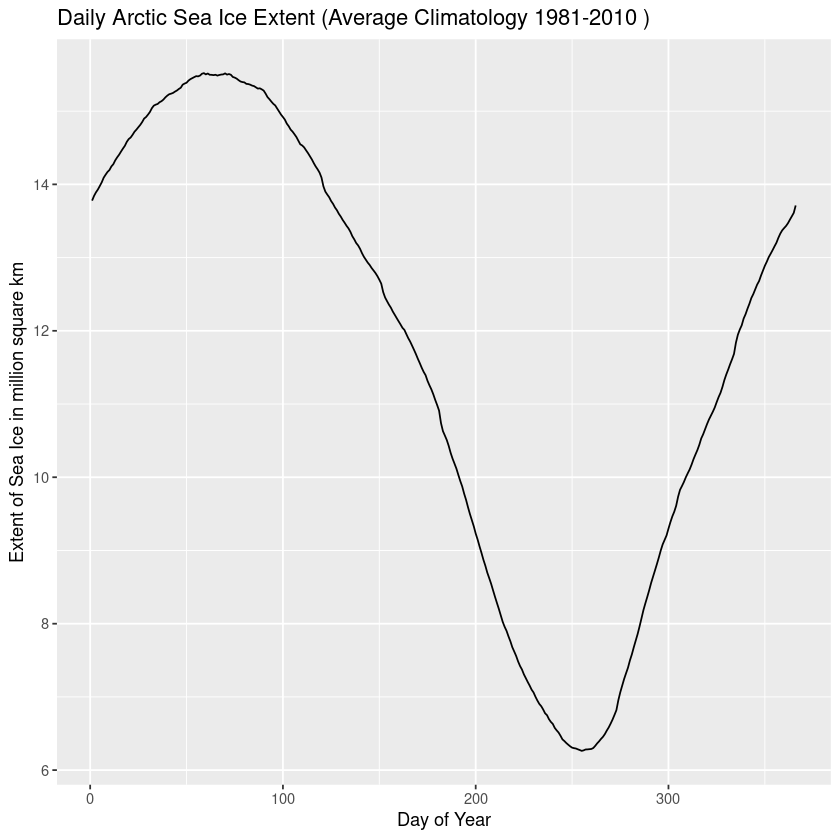

In [261]:
# Plotting the Daily_sea_Ice
NH_annual_pattern  <- ggplot(Daily_sea_Ice, aes(x = Day_of_year, y = Extent)) +
  geom_line() +
  labs(x = "Day of Year", y = "Extent of Sea Ice in million square km") +
  ggtitle("Daily Arctic Sea Ice Extent (Average Climatology 1981-2010 )")

NH_annual_pattern

In [262]:
# Find the day of the biggest extent
max_extent_day <- Daily_sea_Ice$Day_of_year[which.max(Daily_sea_Ice$Extent)]

# Find the day of the smallest extent
min_extent_day <- Daily_sea_Ice$Day_of_year[which.min(Daily_sea_Ice$Extent)]

max_extent_day
min_extent_day

[1] 59

[1] 255

In [263]:
# We will make two time series from Daily_sea_Ice; one for daily_melting_path and other for the daily_freezing_path
# Then we will plot them on the same scale of days to check the Hysteresis 

# Find the index of max_extent_day and min_extent_day
max_extent_index <- which(Daily_sea_Ice$Day_of_year == max_extent_day)
min_extent_index <- which(Daily_sea_Ice$Day_of_year == min_extent_day)

# Create the daily_melting_path from max_extent_index to min_extent_index
daily_melting_path <- Daily_sea_Ice$Extent[max_extent_index:min_extent_index]

# Create the daily_freezing_path as a combination of two lists
daily_freezing_path <- c(Daily_sea_Ice$Extent[min_extent_index:length(Daily_sea_Ice$Extent)], Daily_sea_Ice$Extent[1:max_extent_index])

# Add the 'days' column to daily_melting_path
daily_melting_path <- data.frame(days = 1:length(daily_melting_path), daily_melting_path)


# Add the 'days' column to daily_freezing_path
# The index of freezing path is shorter. we need to reverse its order to plot it on the same figure with the melting path
daily_freezing_path <- data.frame(days = (length(daily_freezing_path)):1, daily_freezing_path)
# So when will plot the daily_freezing_path, the time will go from right to left

# Print the updated daily_melting_path and daily_freezing_path
daily_melting_path
daily_freezing_path

days daily_melting_path
1    1   15.519            
2    2   15.502            
3    3   15.514            
4    4   15.497            
5    5   15.496            
6    6   15.492            
7    7   15.497            
8    8   15.486            
9    9   15.494            
10  10   15.500            
11  11   15.502            
12  12   15.516            
13  13   15.499            
14  14   15.507            
15  15   15.497            
16  16   15.467            
17  17   15.458            
18  18   15.444            
19  19   15.423            
20  20   15.405            
21  21   15.397            
22  22   15.393            
23  23   15.373            
24  24   15.370            
25  25   15.362            
26  26   15.349            
27  27   15.342            
28  28   15.325            
29  29   15.308            
30  30   15.312            
⋮   ⋮    ⋮                 
168 168  7.256             
169 169  7.203             
170 170  7.154             
171 171  7.099             
172 172  7.061             
173 173  7.002             
174 174  6.950             
175 175  6.904             
176 176  6.873             
177 177  6.828             
178 178  6.776             
179 179  6.750             
180 180  6.696             
181 181  6.658             
182 182  6.631             
183 183  6.577             
184 184  6.543             
185 185  6.513             
186 186  6.469             
187 187  6.420             
188 188  6.397             
189 189  6.370             
190 190  6.347             
191 191  6.325             
192 192  6.307             
193 193  6.300             
194 194  6.295             
195 195  6.284             
196 196  6.274             
197 197  6.263

days daily_freezing_path
1   171  6.263              
2   170  6.270              
3   169  6.282              
4   168  6.283              
5   167  6.286              
6   166  6.289              
7   165  6.302              
8   164  6.331              
9   163  6.365              
10  162  6.393              
11  161  6.426              
12  160  6.454              
13  159  6.492              
14  158  6.540              
15  157  6.583              
16  156  6.635              
17  155  6.691              
18  154  6.754              
19  153  6.820              
20  152  6.955              
21  151  7.063              
22  150  7.154              
23  149  7.245              
24  148  7.323              
25  147  7.399              
26  146  7.498              
27  145  7.580              
28  144  7.677              
29  143  7.768              
30  142  7.858              
⋮   ⋮    ⋮                  
142 30   14.953             
143 29   14.989             
144 28   15.040             
145 27   15.075             
146 26   15.089             
147 25   15.098             
148 24   15.122             
149 23   15.136             
150 22   15.158             
151 21   15.188             
152 20   15.212             
153 19   15.231             
154 18   15.239             
155 17   15.249             
156 16   15.267             
157 15   15.282             
158 14   15.303             
159 13   15.320             
160 12   15.362             
161 11   15.377             
162 10   15.388             
163  9   15.417             
164  8   15.437             
165  7   15.451             
166  6   15.465             
167  5   15.478             
168  4   15.475             
169  3   15.486             
170  2   15.511             
171  1   15.519

In [264]:
# Check the number of days in the freezing path
num_freezing_days <- nrow(daily_freezing_path)

# Check the number of days in the melting path
num_melting_days <- nrow(daily_melting_path)

# Print the number of days in the freezing and melting paths
paste("The freezing path has", num_freezing_days, "days.")
paste("The melting path has", num_melting_days, "days.")

[1] "The freezing path has 171 days."

[1] "The melting path has 197 days."

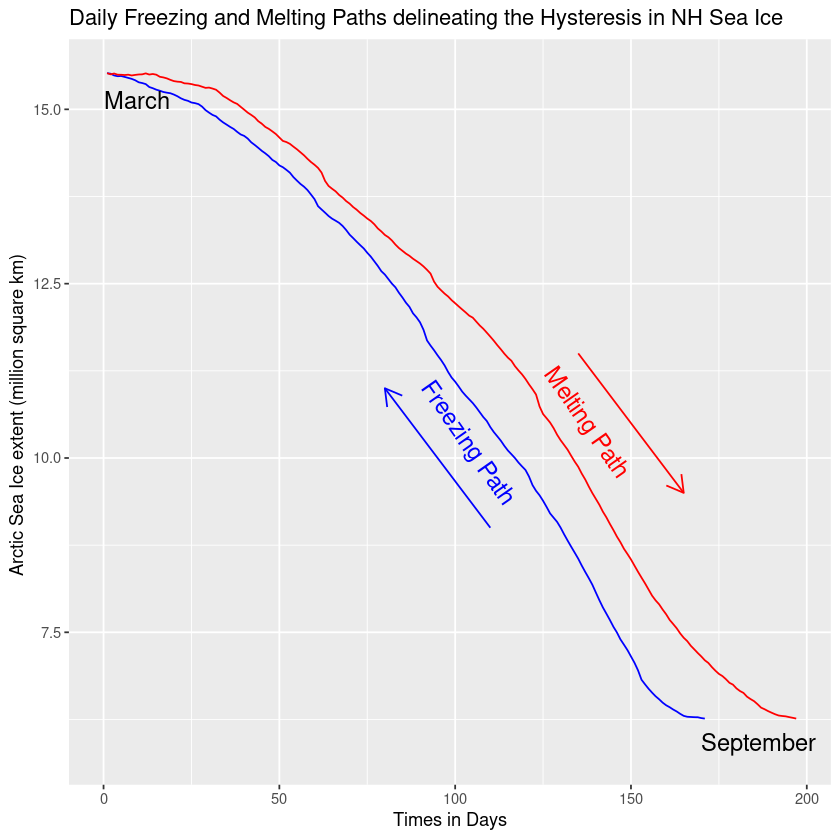

In [265]:
# Plot both daily_freezing_path and daily_melting_path on the same figure
ggplot() +
  geom_line(data = daily_freezing_path, aes(x = days, y = daily_freezing_path, color = "Freezing Path")) +
  geom_line(data = daily_melting_path, aes(x = days, y = daily_melting_path, color = "Melting Path")) +
  xlab("Times in Days") +
  ylab("Arctic Sea Ice extent (million square km) ") +
  ggtitle("Daily Freezing and Melting Paths delineating the Hysteresis in NH Sea Ice") +
  scale_color_manual(values = c("blue", "red"), labels = c("Freezing Path", "Melting Path")) +
  theme(legend.position = "topleft") +
  guides(color = guide_legend(title = "Path")) +
  annotate("text", x = 90, y = 11, label = "Freezing Path", color = "blue", angle = -55, size = 5, hjust = 0, vjust = 0) +
  annotate("segment", x = 110, xend = 80, y = 9, yend = 11, arrow = arrow(length = unit(0.4, "cm")), color = "blue") +
  annotate("text", x = 125, y = 11.2, label = "Melting Path", color = "red", angle = -55, size = 5, hjust = 0, vjust = 0) +
  annotate("segment", x = 135, xend = 165, y = 11.5, yend = 9.5, arrow = arrow(length = unit(0.4, "cm")), color = "red") +
  annotate("text", x = 0, y = 15, label = "March", color = "black", angle = 0, size = 5, hjust = 0, vjust = 0) + 
  annotate("text", x = 170, y = 5.8, label = "September", color = "black", angle = 0, size = 5, hjust = 0, vjust = 0)

The time goes clockwise in the figure above. There is a clear Hysteresis in Sea ice (formation and melting) as the figure above shows.  

Both melting and freezing begin fast then slow down due to the thermal inertia of both ice and water and the feedback effect. 

This high thermal capacity of ocean water is also the main reason for lagging the maximum ice extent till March instead of December in the Northern hemisphere.

We can check the speed of melting or freezing by taking the first derivative of the figures above 

In [266]:
# first we need revert the daily_freezing_path to let time go from left to right
daily_freezing_path$days <- 1:(length(daily_freezing_path$days))

In [267]:
# Calculate the first derivative of daily_melting_path
daily_melting_derivative <- diff(daily_melting_path$daily_melting_path)

# Create a new data frame for the first derivative of daily_melting_path
daily_melting_derivative_df <- data.frame(days = daily_melting_path$days[-1], daily_melting_derivative)

# Calculate the first derivative of daily_freezing_path
daily_freezing_derivative <- diff(daily_freezing_path$daily_freezing_path)

# Create a new data frame for the first derivative of daily_freezing_path
daily_freezing_derivative_df <- data.frame(days = daily_freezing_path$days[-1], daily_freezing_derivative)


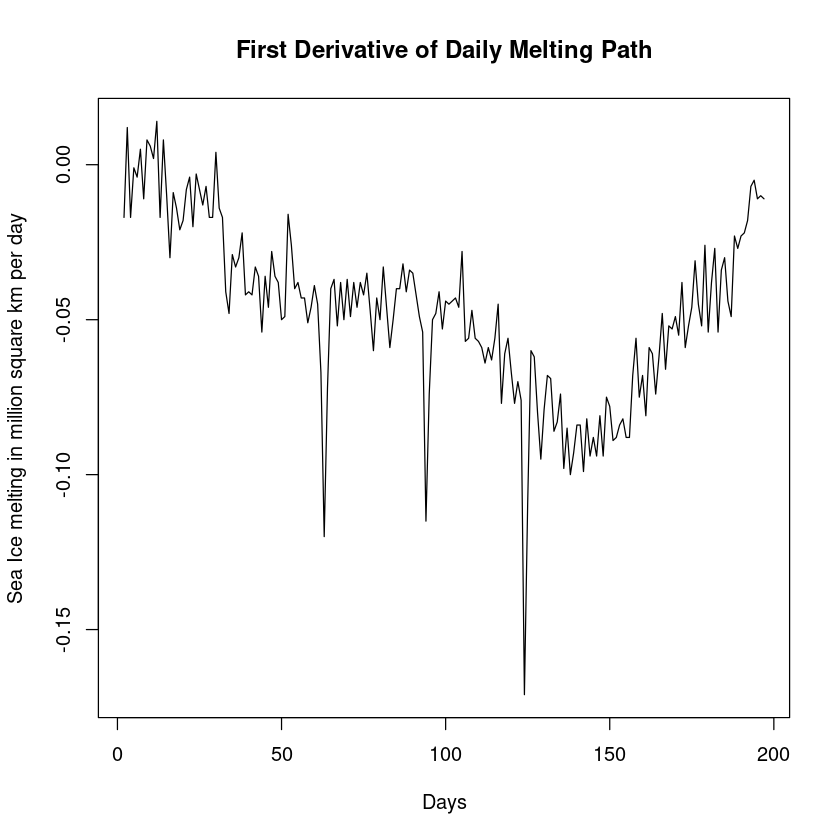

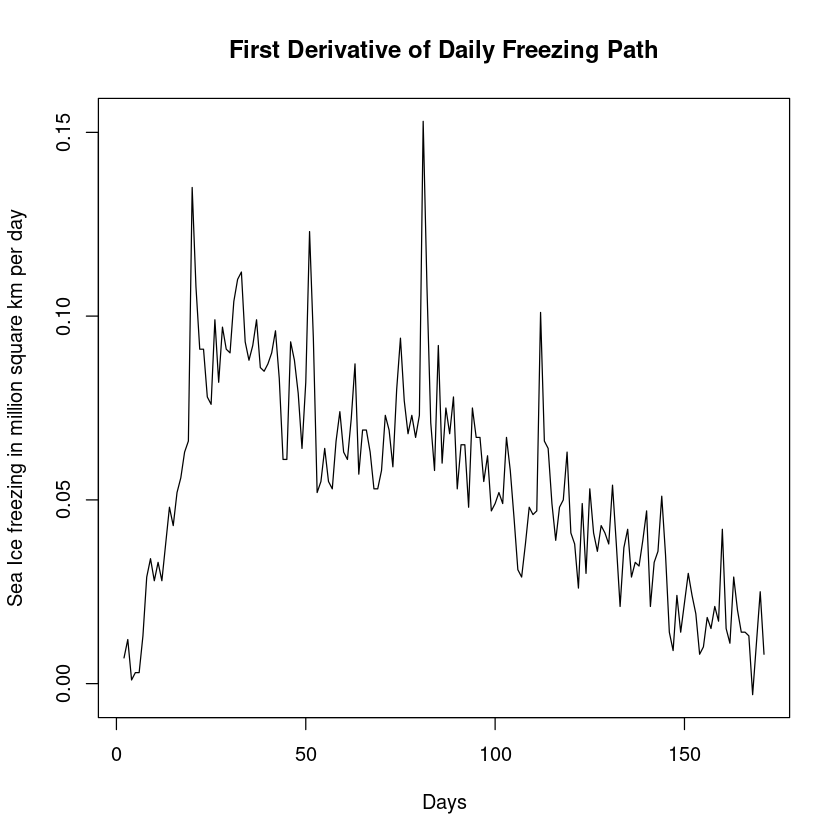

In [268]:
# plot in two different plots

# Plot the first derivative of daily_melting_path
plot(daily_melting_derivative_df$days, daily_melting_derivative_df$daily_melting_derivative, type = "l", xlab = "Days", ylab = "Sea Ice melting in million square km per day", main = "First Derivative of Daily Melting Path")

# Plot the first derivative of daily_freezing_path
plot(daily_freezing_derivative_df$days, daily_freezing_derivative_df$daily_freezing_derivative, type = "l", xlab = "Days", ylab = "Sea Ice freezing in million square km per day", main = "First Derivative of Daily Freezing Path")

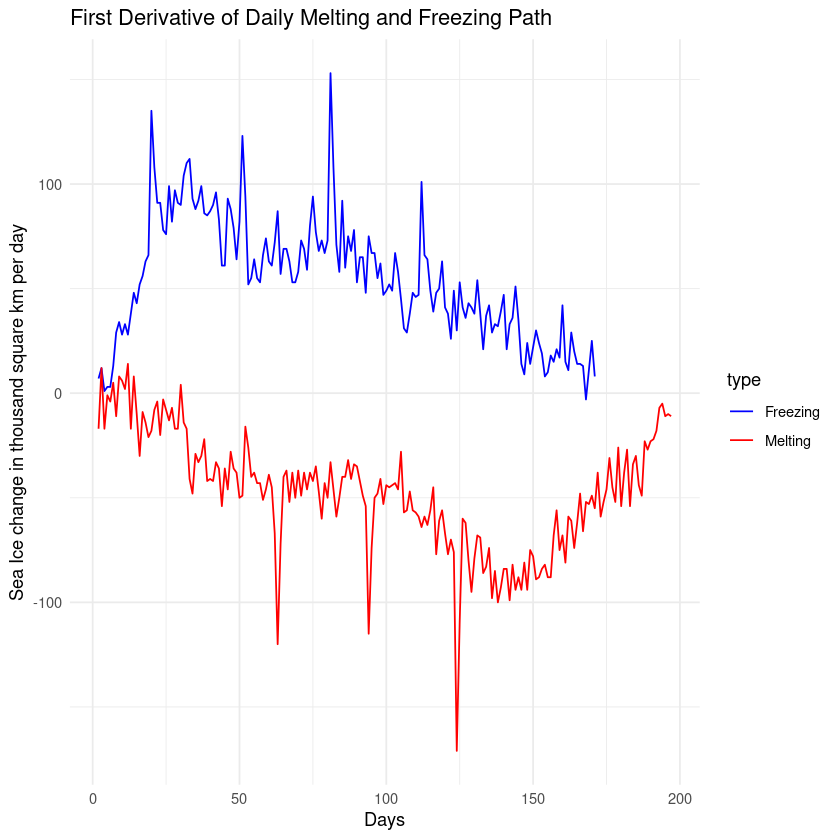

In [269]:
# ploting both on the same figure and change the unit to thousand square

# Combine the data frames for daily_melting_derivative and daily_freezing_derivative
combined_df <- data.frame(
  days = c(daily_melting_derivative_df$days, daily_freezing_derivative_df$days),
  derivative = c(daily_melting_derivative_df$daily_melting_derivative, daily_freezing_derivative_df$daily_freezing_derivative),
  type = c(rep("Melting", length(daily_melting_derivative_df$days)), rep("Freezing", length(daily_freezing_derivative_df$days)))
)

# Multiply the values on the y-axis by 1000 to convert the unit to thousand square km
combined_df$derivative <- combined_df$derivative * 1000


# Plot the combined data using ggplot with the updated y-axis unit and color mapping
ggplot(combined_df, aes(x = days, y = derivative, color = type)) +
  geom_line() +
  labs(x = "Days", y = "Sea Ice change in thousand square km per day", title = "First Derivative of Daily Melting and Freezing Path") +
  theme_minimal() +
  scale_color_manual(values = c("blue", "red"))

As we hypothesis before, Both melting and freezing begin fast then slow down due to the thermal inertia of both ice and water and the feedback effect.   

Even though this is an average of thirty years, it still has high variation. We could make a new plot with the rolling moving average to reduce the noise more and reveal the system pattern.

Warning message:
“Removed 6 rows containing missing values (`geom_line()`).”


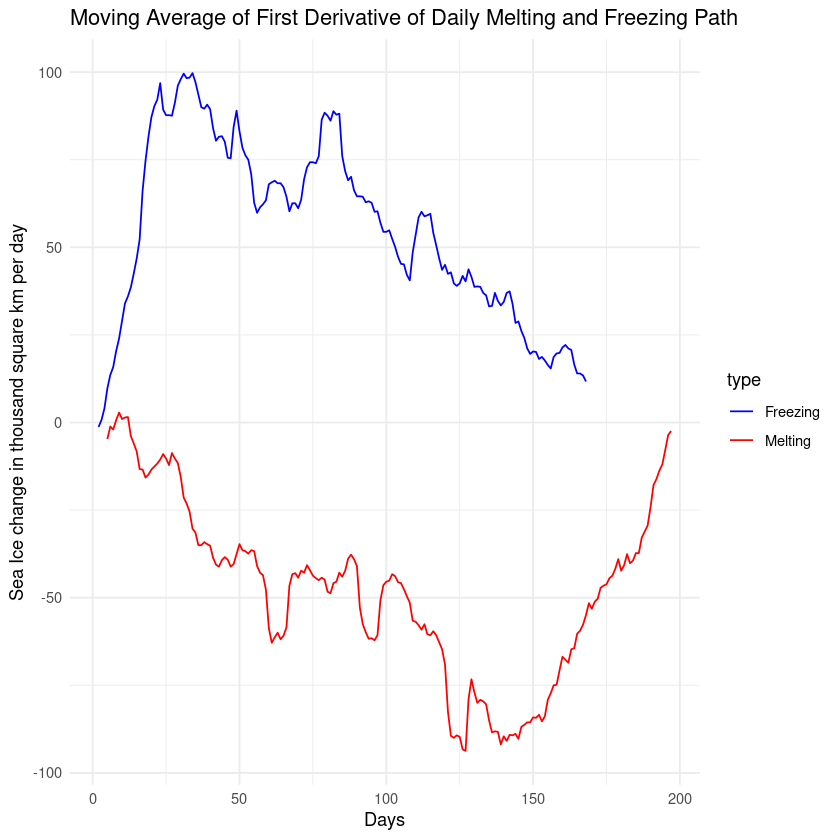

In [270]:
# Take a moving rolling average of 7 days of combined_df
combined_df$moving_average <- zoo::rollmean(combined_df$derivative, k = 7, fill = NA)

# Plot the moving average with color mapping
ggplot(combined_df, aes(x = days, y = moving_average, color = type)) +
  geom_line() +
  labs(x = "Days", y = "Sea Ice change in thousand square km per day", title = "Moving Average of First Derivative of Daily Melting and Freezing Path") +
  theme_minimal() +
  scale_color_manual(values = c("blue", "red"))

The pattern above shows an almost straight line at the end of the melting cycle and the beginning of the freezing cycle. This period in the northern hemisphere (Aug, Sep, Oct) has almost no variation.    

I think that the reason is power stabilization and less power fluctuations; Stable power balance in the system? steady decline of sun heat, steady heating from the ocean and cooling toward the open & sunless sky at the end?

We saw that the freezing path takes a shorter time on **average**. Let us investigate that more for every year and the trend. Maybe the average is not the same for annual situation.

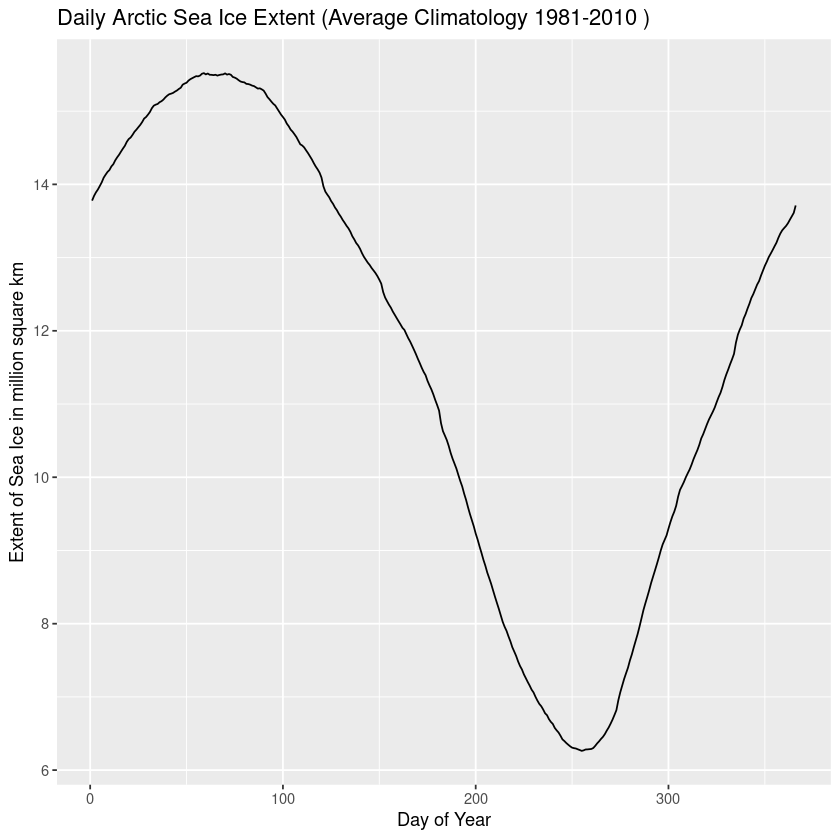

In [271]:
NH_annual_pattern

We define the melting path as the time in days between the max extent and min one. The difference in the extent between these two is the melting area.   
We define the freezing path as the time between the minimum extent and (next year's maximum extent). The difference in the extent between these two is the freezing area.   
Our previous definitions lead to new year length, which is the sum of the melting and the freezing path. We call it the Icy_Year. We define This Icy_Year begin and end with the maximum ice extent occurrence in the Northern Hemisphere. This year's length varies by the time.

Many questions will follow:  
Is the beginning (and the mid) of the Icy_Year advances; does the maximum ice extent occur earlier? What is the trend? Is it normally distributed? Same for the minmum exten occurrence date.    
Is the length of Icy_Year increase? Is it normally distributed?  
Does the length of melting_path increase? Is it normally distributed?  
Does the length of freezing_path increase? Is it normally distributed?  
Is there a correlation between the melting_path and the melted area?  
Is there a correlation between the freezing_path and the frozen area?  

In [272]:
# In this code, we will import an Ice data series with the minimum and maximum extent and dates
# our goal is to check if the melting_path time increases in days. and to answer the questions above  

# Importing the Minimum and maximum extent values and dates for each month and year, with rankings (Sea_Ice_Index_Min_Max_Rankings_G02135_v3.0.xlsx) 
# From https://nsidc.org/arcticseaicenews/sea-ice-tools/


In [273]:
# The url
MaxMin_NH_url <- "https://masie_web.apps.nsidc.org/pub//DATASETS/NOAA/G02135/seaice_analysis/Sea_Ice_Index_Min_Max_Rankings_G02135_v3.0.xlsx"

# Download the Excel file to a temporary location
temp_file <- tempfile()
download.file(MaxMin_NH_url, temp_file)

# Read the second sheet of the Excel file that contain the NH ice data
MaxMin_NH <- read_excel(temp_file, sheet = 2)

# Select only columns A, D, and G
MaxMin_NH <- MaxMin_NH[, c(1, 2, 4, 5, 7)]

# Rename the first column to 'year'
colnames(MaxMin_NH)[1] <- "year"
colnames(MaxMin_NH)[2] <- "min_extent"
colnames(MaxMin_NH)[3] <- "min_date"
colnames(MaxMin_NH)[4] <- "max_extent"
colnames(MaxMin_NH)[5] <- "max_date"

# Print the selected data
MaxMin_NH

New names:
• `` -> `...1`


year min_extent min_date   max_extent max_date  
1  1979 6.895      1979-09-21 16.635     1979-03-01
2  1980 7.533      1980-09-05 16.302     1980-03-05
3  1981 6.902      1981-09-10 15.801     1981-03-14
4  1982 7.160      1982-09-13 16.325     1982-02-27
5  1983 7.204      1983-09-08 16.412     1983-03-14
6  1984 6.396      1984-09-16 15.809     1984-03-18
7  1985 6.486      1985-09-09 16.163     1985-03-17
8  1986 7.122      1986-09-06 16.158     1986-03-10
9  1987 6.890      1987-09-02 16.293     1987-02-21
10 1988 7.048      1988-09-11 16.309     1988-03-10
11 1989 6.888      1989-09-22 15.766     1989-03-06
12 1990 6.011      1990-09-21 16.249     1990-03-12
13 1991 6.259      1991-09-16 15.647     1991-02-25
14 1992 7.159      1992-09-07 15.576     1992-03-12
15 1993 6.161      1993-09-13 16.048     1993-03-13
16 1994 6.934      1994-09-05 15.770     1994-02-21
17 1995 6.012      1995-09-04 15.384     1995-03-31
18 1996 7.147      1996-09-10 15.484     1996-02-21
19 1997 6.602      1997-09-03 15.684     1997-03-20
20 1998 6.293      1998-09-17 16.070     1998-02-25
21 1999 5.676      1999-09-12 15.627     1999-03-30
22 2000 5.943      2000-09-11 15.498     2000-03-03
23 2001 6.567      2001-09-19 15.742     2001-03-04
24 2002 5.625      2002-09-18 15.624     2002-03-09
25 2003 5.969      2003-09-17 15.629     2003-03-20
26 2004 5.770      2004-09-18 15.300     2004-03-10
27 2005 5.314      2005-09-20 14.993     2005-03-09
28 2006 5.746      2006-09-14 14.777     2006-03-11
29 2007 4.147      2007-09-14 14.842     2007-03-10
30 2008 4.548      2008-09-18 15.354     2008-02-27
31 2009 5.047      2009-09-12 15.195     2009-03-02
32 2010 4.590      2010-09-19 15.351     2010-03-31
33 2011 4.333      2011-09-08 14.704     2011-03-07
34 2012 3.340      2012-09-16 15.307     2012-03-18
35 2013 5.040      2013-09-13 15.196     2013-03-14
36 2014 4.988      2014-09-16 15.007     2014-03-20
37 2015 4.387      2015-09-08 14.554     2015-02-22
38 2016 4.145      2016-09-07 14.566     2016-03-22
39 2017 4.635      2017-09-13 14.449     2017-03-05
40 2018 4.630      2018-09-21 14.499     2018-03-14
41 2019 4.166      2019-09-18 14.896     2019-03-11
42 2020 3.793      2020-09-13 15.071     2020-03-04
43 2021 4.757      2021-09-14 14.865     2021-03-11
44 2022 4.692      2022-09-15 14.940     2022-02-21

In [274]:
# Calculate the day of the maximum extent occurrence which is 
# the beginnig of the the Icy_Year according to our definition above

# define new column for the value
MaxMin_NH$DayOfMax <- as.numeric(format(as.Date(MaxMin_NH$max_date), "%j"))

# View the updated dataframe
MaxMin_NH

year min_extent min_date   max_extent max_date   DayOfMax
1  1979 6.895      1979-09-21 16.635     1979-03-01 60      
2  1980 7.533      1980-09-05 16.302     1980-03-05 65      
3  1981 6.902      1981-09-10 15.801     1981-03-14 73      
4  1982 7.160      1982-09-13 16.325     1982-02-27 58      
5  1983 7.204      1983-09-08 16.412     1983-03-14 73      
6  1984 6.396      1984-09-16 15.809     1984-03-18 78      
7  1985 6.486      1985-09-09 16.163     1985-03-17 76      
8  1986 7.122      1986-09-06 16.158     1986-03-10 69      
9  1987 6.890      1987-09-02 16.293     1987-02-21 52      
10 1988 7.048      1988-09-11 16.309     1988-03-10 70      
11 1989 6.888      1989-09-22 15.766     1989-03-06 65      
12 1990 6.011      1990-09-21 16.249     1990-03-12 71      
13 1991 6.259      1991-09-16 15.647     1991-02-25 56      
14 1992 7.159      1992-09-07 15.576     1992-03-12 72      
15 1993 6.161      1993-09-13 16.048     1993-03-13 72      
16 1994 6.934      1994-09-05 15.770     1994-02-21 52      
17 1995 6.012      1995-09-04 15.384     1995-03-31 90      
18 1996 7.147      1996-09-10 15.484     1996-02-21 52      
19 1997 6.602      1997-09-03 15.684     1997-03-20 79      
20 1998 6.293      1998-09-17 16.070     1998-02-25 56      
21 1999 5.676      1999-09-12 15.627     1999-03-30 89      
22 2000 5.943      2000-09-11 15.498     2000-03-03 63      
23 2001 6.567      2001-09-19 15.742     2001-03-04 63      
24 2002 5.625      2002-09-18 15.624     2002-03-09 68      
25 2003 5.969      2003-09-17 15.629     2003-03-20 79      
26 2004 5.770      2004-09-18 15.300     2004-03-10 70      
27 2005 5.314      2005-09-20 14.993     2005-03-09 68      
28 2006 5.746      2006-09-14 14.777     2006-03-11 70      
29 2007 4.147      2007-09-14 14.842     2007-03-10 69      
30 2008 4.548      2008-09-18 15.354     2008-02-27 58      
31 2009 5.047      2009-09-12 15.195     2009-03-02 61      
32 2010 4.590      2010-09-19 15.351     2010-03-31 90      
33 2011 4.333      2011-09-08 14.704     2011-03-07 66      
34 2012 3.340      2012-09-16 15.307     2012-03-18 78      
35 2013 5.040      2013-09-13 15.196     2013-03-14 73      
36 2014 4.988      2014-09-16 15.007     2014-03-20 79      
37 2015 4.387      2015-09-08 14.554     2015-02-22 53      
38 2016 4.145      2016-09-07 14.566     2016-03-22 82      
39 2017 4.635      2017-09-13 14.449     2017-03-05 64      
40 2018 4.630      2018-09-21 14.499     2018-03-14 73      
41 2019 4.166      2019-09-18 14.896     2019-03-11 70      
42 2020 3.793      2020-09-13 15.071     2020-03-04 64      
43 2021 4.757      2021-09-14 14.865     2021-03-11 70      
44 2022 4.692      2022-09-15 14.940     2022-02-21 52

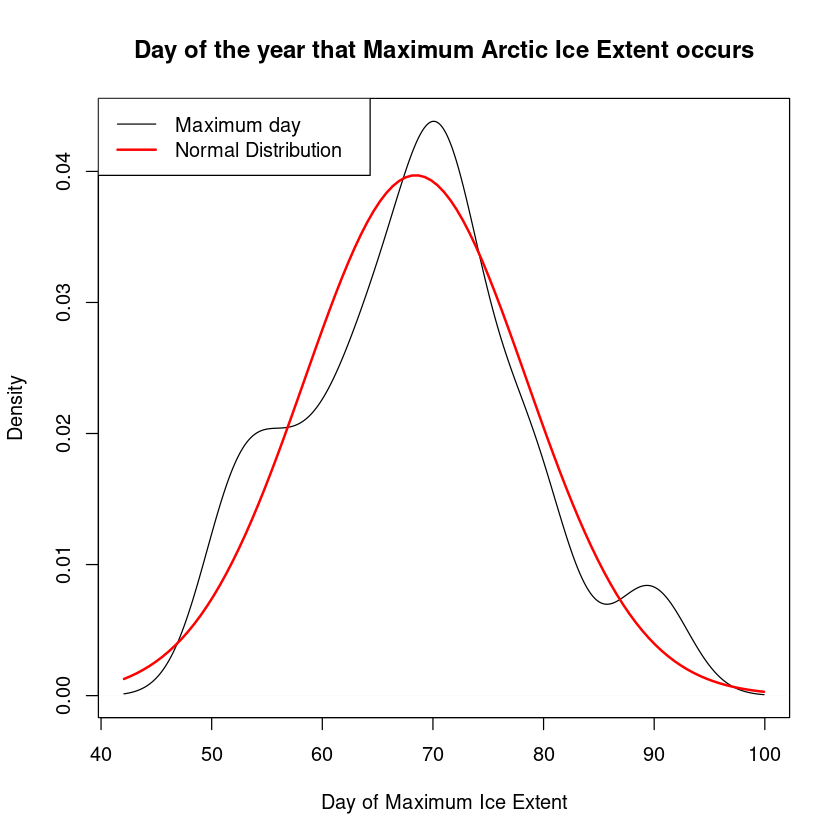

In [275]:
# Create a density plot of (Day of Max extent)
plot(density(MaxMin_NH$DayOfMax), main = "Day of the year that Maximum Arctic Ice Extent occurs", xlab = "Day of Maximum Ice Extent", ylab = "Density")

# Overlay a normal distribution on the density plot
curve(dnorm(x, mean = mean(MaxMin_NH$DayOfMax), sd = sd(MaxMin_NH$DayOfMax)), add = TRUE, col = "red", lwd = 2)

# Add a legend
legend('topleft', legend = c("Maximum day", "Normal Distribution"), col = c("black", "red"), lwd = c(1, 2), lty = c(1, 1))

In [276]:
# Shapiro-Wilk test for normality
shapiro.test(MaxMin_NH$DayOfMax)


	Shapiro-Wilk normality test

data:  MaxMin_NH$DayOfMax
W = 0.96351, p-value = 0.1759


The p-value of Shapiro-Wilk test is Higher than the usual confidence of 5%.   
P value = (0.18) ----> we can not reject the H0 hypothesis.  
The distribution of ( the Day of the year that Maximum Arctic Ice Extent occurs) is accepted as normally distributed

In [277]:
# Because the variation in the day of the maximum extent follow normal distribution
# Here we will check its statistical properties 

# Summary statistics
summary(MaxMin_NH$DayOfMax)

cat("The variance is:", round(var(MaxMin_NH$DayOfMax), 0), "days ^2", "\n")

cat("Standard Deviation:", round(sd(MaxMin_NH$DayOfMax), 1), "days", "\n")

cat("The data range is:", round((range(MaxMin_NH$DayOfMax)[2] - range(MaxMin_NH$DayOfMax)[1]), 1), "days", "\n")


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  52.00   62.50   69.50   68.43   73.00   90.00 

The variance is: 101 days ^2 
Standard Deviation: 10 days 
The data range is: 38 days 


There is no points that deviate more than three std from the mean

`geom_smooth()` using formula = 'y ~ x'


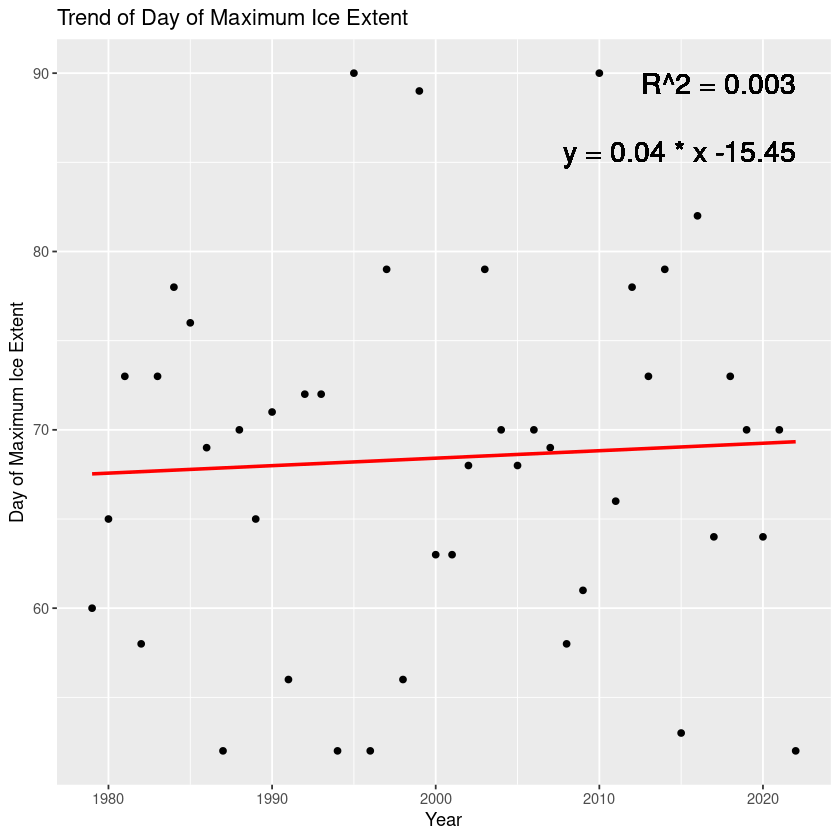

In [278]:
# Create a scatter plot using ggplot
ggplot(MaxMin_NH, aes(x = year, y = DayOfMax)) +
  geom_point() +
  labs(x = "Year", y = "Day of Maximum Ice Extent", title = "Trend of Day of Maximum Ice Extent") +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  geom_text(aes(label = paste("R^2 =", round(summary(lm(DayOfMax ~ year, data = MaxMin_NH))$r.squared, 3))), 
            x = max(MaxMin_NH$year), y = max(MaxMin_NH$DayOfMax), hjust = 1, vjust = 1, size =6) +
  geom_text(aes(label = paste("y =", round(coef(lm(DayOfMax ~ year, data = MaxMin_NH))[[2]], 2), "* x", 
                               round(coef(lm(DayOfMax ~ year, data = MaxMin_NH))[[1]], 2))), 
            x = max(MaxMin_NH$year), y = 85, hjust = 1, vjust = 0, size =6)

In [279]:
# Calculate the day of the minimum extent occurrence which is 
# the mid of the the Icy_Year according to our definition above

# define new column for the value
MaxMin_NH$DayOfMin <- as.numeric(format(as.Date(MaxMin_NH$min_date), "%j"))

# View the updated dataframe
MaxMin_NH

year min_extent min_date   max_extent max_date   DayOfMax DayOfMin
1  1979 6.895      1979-09-21 16.635     1979-03-01 60       264     
2  1980 7.533      1980-09-05 16.302     1980-03-05 65       249     
3  1981 6.902      1981-09-10 15.801     1981-03-14 73       253     
4  1982 7.160      1982-09-13 16.325     1982-02-27 58       256     
5  1983 7.204      1983-09-08 16.412     1983-03-14 73       251     
6  1984 6.396      1984-09-16 15.809     1984-03-18 78       260     
7  1985 6.486      1985-09-09 16.163     1985-03-17 76       252     
8  1986 7.122      1986-09-06 16.158     1986-03-10 69       249     
9  1987 6.890      1987-09-02 16.293     1987-02-21 52       245     
10 1988 7.048      1988-09-11 16.309     1988-03-10 70       255     
11 1989 6.888      1989-09-22 15.766     1989-03-06 65       265     
12 1990 6.011      1990-09-21 16.249     1990-03-12 71       264     
13 1991 6.259      1991-09-16 15.647     1991-02-25 56       259     
14 1992 7.159      1992-09-07 15.576     1992-03-12 72       251     
15 1993 6.161      1993-09-13 16.048     1993-03-13 72       256     
16 1994 6.934      1994-09-05 15.770     1994-02-21 52       248     
17 1995 6.012      1995-09-04 15.384     1995-03-31 90       247     
18 1996 7.147      1996-09-10 15.484     1996-02-21 52       254     
19 1997 6.602      1997-09-03 15.684     1997-03-20 79       246     
20 1998 6.293      1998-09-17 16.070     1998-02-25 56       260     
21 1999 5.676      1999-09-12 15.627     1999-03-30 89       255     
22 2000 5.943      2000-09-11 15.498     2000-03-03 63       255     
23 2001 6.567      2001-09-19 15.742     2001-03-04 63       262     
24 2002 5.625      2002-09-18 15.624     2002-03-09 68       261     
25 2003 5.969      2003-09-17 15.629     2003-03-20 79       260     
26 2004 5.770      2004-09-18 15.300     2004-03-10 70       262     
27 2005 5.314      2005-09-20 14.993     2005-03-09 68       263     
28 2006 5.746      2006-09-14 14.777     2006-03-11 70       257     
29 2007 4.147      2007-09-14 14.842     2007-03-10 69       257     
30 2008 4.548      2008-09-18 15.354     2008-02-27 58       262     
31 2009 5.047      2009-09-12 15.195     2009-03-02 61       255     
32 2010 4.590      2010-09-19 15.351     2010-03-31 90       262     
33 2011 4.333      2011-09-08 14.704     2011-03-07 66       251     
34 2012 3.340      2012-09-16 15.307     2012-03-18 78       260     
35 2013 5.040      2013-09-13 15.196     2013-03-14 73       256     
36 2014 4.988      2014-09-16 15.007     2014-03-20 79       259     
37 2015 4.387      2015-09-08 14.554     2015-02-22 53       251     
38 2016 4.145      2016-09-07 14.566     2016-03-22 82       251     
39 2017 4.635      2017-09-13 14.449     2017-03-05 64       256     
40 2018 4.630      2018-09-21 14.499     2018-03-14 73       264     
41 2019 4.166      2019-09-18 14.896     2019-03-11 70       261     
42 2020 3.793      2020-09-13 15.071     2020-03-04 64       257     
43 2021 4.757      2021-09-14 14.865     2021-03-11 70       257     
44 2022 4.692      2022-09-15 14.940     2022-02-21 52       258

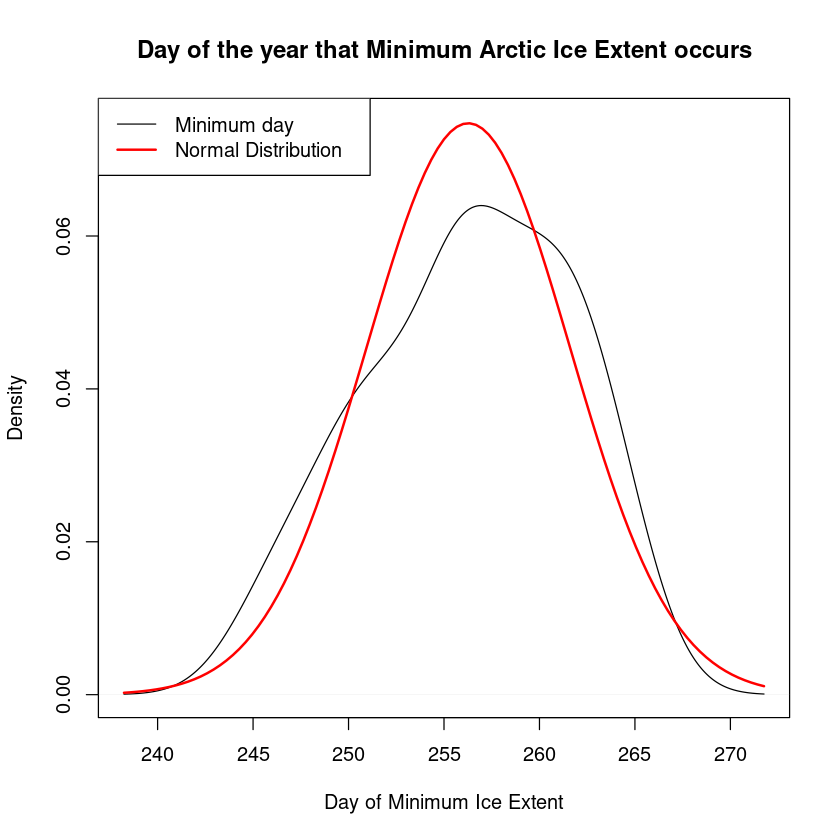

In [280]:
# Overlay a normal distribution on the density plot
plot(density(MaxMin_NH$DayOfMin), main = "Day of the year that Minimum Arctic Ice Extent occurs", xlab = "Day of Minimum Ice Extent", ylab = "Density", ylim = c(0,  0.075))
curve(dnorm(x, mean = mean(MaxMin_NH$DayOfMin), sd = sd(MaxMin_NH$DayOfMin)), add = TRUE, col = "red", lwd = 2)

# Add a legend
legend('topleft', legend = c("Minimum day", "Normal Distribution"), col = c("black", "red"), lwd = c(1, 2), lty = c(1, 1))

In [281]:
# Shapiro-Wilk test for normality
shapiro.test(MaxMin_NH$DayOfMin)


	Shapiro-Wilk normality test

data:  MaxMin_NH$DayOfMin
W = 0.96391, p-value = 0.1819


The p-value of Shapiro-Wilk test is Higher than the usual confidence of 5%.   
P value = (0.18) ----> we can not reject the H0 hypothesis.  
The distribution of ( the Day of the year that Maximum Arctic Ice Extent occurs) is accepted as normally distributed

In [282]:
# Because the variation in the day of the minimum extent follow normal distribution
# Here we will check its statistical properties 

# Summary statistics 
summary(MaxMin_NH$DayOfMin)
 
cat("The variance is:", round(var(MaxMin_NH$DayOfMin), 0), "days ^2", "\n")

cat("Standard Deviation:", round(sd(MaxMin_NH$DayOfMin), 1), "days", "\n")

cat("The data range is:", round((range(MaxMin_NH$DayOfMin)[2] - range(MaxMin_NH$DayOfMin)[1]), 1), "days", "\n")


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  245.0   251.8   256.5   256.3   260.2   265.0 

The variance is: 28 days ^2 
Standard Deviation: 5.3 days 
The data range is: 20 days 


There is no points that deviate more than three std from the mean.   



The std in the DayOfMin (5) days is smaller than the std in DayOfMax (10) days.   

This imply that the timing of the DayOfMin is more stable than the timing of the DayOfMax.  

We can say: The timing of the begin of freezing is more stable than the time of begining of melting.   

We could conclude: The timing of the begin of freezing proceess depends mainly on the sun absence. If the sun absent or the sun energy decreased to a critical minmum (at the day 256), there will be no enogh heat from the ocean water to prevent the water from freezing.    

Nevertheless, the timing of the begin of melting proceess depends on many factors;
* The sun factor which is stable
* The ocean circulation and Atmospheric circulation which have high variability
* The weather conditions which have high variability
* The Ice area that is already exists 

`geom_smooth()` using formula = 'y ~ x'


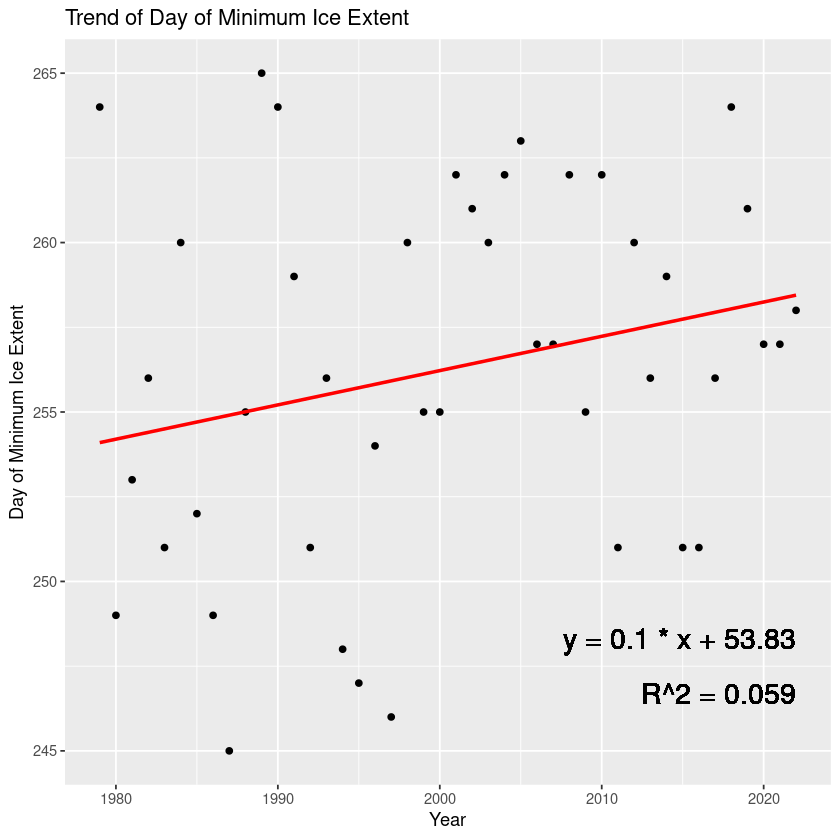

In [283]:
# Create a scatter plot using ggplot
ggplot(MaxMin_NH, aes(x = year, y = DayOfMin)) +
  geom_point() +
  labs(x = "Year", y = "Day of Minimum Ice Extent", title = "Trend of Day of Minimum Ice Extent") +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  geom_text(aes(label = paste("R^2 =", round(summary(lm(DayOfMin ~ year, data = MaxMin_NH))$r.squared, 3))), 
            x = max(MaxMin_NH$year), y = 247, hjust = 1, vjust = 1, size =6) +
  geom_text(aes(label = paste("y =", round(coef(lm(DayOfMin ~ year, data = MaxMin_NH))[[2]], 2), "* x +", 
                               round(coef(lm(DayOfMin ~ year, data = MaxMin_NH))[[1]], 2))), 
            x = max(MaxMin_NH$year), y = 248, hjust = 1, vjust = 0, size =6)

In [284]:
# Calculating the melting time in days
# The melting time is the time between (max and min) ice extent
# we will call it the melting_path

MaxMin_NH$melting_path <- as.integer(as.Date(MaxMin_NH$min_date, format = "%Y-%m-%d") - as.Date(MaxMin_NH$max_date, format = "%Y-%m-%d"))

# Calculate the area that is melted in million sq km
MaxMin_NH$melted_area<- MaxMin_NH$max_extent - MaxMin_NH$min_extent


MaxMin_NH

year min_extent min_date   max_extent max_date   DayOfMax DayOfMin
1  1979 6.895      1979-09-21 16.635     1979-03-01 60       264     
2  1980 7.533      1980-09-05 16.302     1980-03-05 65       249     
3  1981 6.902      1981-09-10 15.801     1981-03-14 73       253     
4  1982 7.160      1982-09-13 16.325     1982-02-27 58       256     
5  1983 7.204      1983-09-08 16.412     1983-03-14 73       251     
6  1984 6.396      1984-09-16 15.809     1984-03-18 78       260     
7  1985 6.486      1985-09-09 16.163     1985-03-17 76       252     
8  1986 7.122      1986-09-06 16.158     1986-03-10 69       249     
9  1987 6.890      1987-09-02 16.293     1987-02-21 52       245     
10 1988 7.048      1988-09-11 16.309     1988-03-10 70       255     
11 1989 6.888      1989-09-22 15.766     1989-03-06 65       265     
12 1990 6.011      1990-09-21 16.249     1990-03-12 71       264     
13 1991 6.259      1991-09-16 15.647     1991-02-25 56       259     
14 1992 7.159      1992-09-07 15.576     1992-03-12 72       251     
15 1993 6.161      1993-09-13 16.048     1993-03-13 72       256     
16 1994 6.934      1994-09-05 15.770     1994-02-21 52       248     
17 1995 6.012      1995-09-04 15.384     1995-03-31 90       247     
18 1996 7.147      1996-09-10 15.484     1996-02-21 52       254     
19 1997 6.602      1997-09-03 15.684     1997-03-20 79       246     
20 1998 6.293      1998-09-17 16.070     1998-02-25 56       260     
21 1999 5.676      1999-09-12 15.627     1999-03-30 89       255     
22 2000 5.943      2000-09-11 15.498     2000-03-03 63       255     
23 2001 6.567      2001-09-19 15.742     2001-03-04 63       262     
24 2002 5.625      2002-09-18 15.624     2002-03-09 68       261     
25 2003 5.969      2003-09-17 15.629     2003-03-20 79       260     
26 2004 5.770      2004-09-18 15.300     2004-03-10 70       262     
27 2005 5.314      2005-09-20 14.993     2005-03-09 68       263     
28 2006 5.746      2006-09-14 14.777     2006-03-11 70       257     
29 2007 4.147      2007-09-14 14.842     2007-03-10 69       257     
30 2008 4.548      2008-09-18 15.354     2008-02-27 58       262     
31 2009 5.047      2009-09-12 15.195     2009-03-02 61       255     
32 2010 4.590      2010-09-19 15.351     2010-03-31 90       262     
33 2011 4.333      2011-09-08 14.704     2011-03-07 66       251     
34 2012 3.340      2012-09-16 15.307     2012-03-18 78       260     
35 2013 5.040      2013-09-13 15.196     2013-03-14 73       256     
36 2014 4.988      2014-09-16 15.007     2014-03-20 79       259     
37 2015 4.387      2015-09-08 14.554     2015-02-22 53       251     
38 2016 4.145      2016-09-07 14.566     2016-03-22 82       251     
39 2017 4.635      2017-09-13 14.449     2017-03-05 64       256     
40 2018 4.630      2018-09-21 14.499     2018-03-14 73       264     
41 2019 4.166      2019-09-18 14.896     2019-03-11 70       261     
42 2020 3.793      2020-09-13 15.071     2020-03-04 64       257     
43 2021 4.757      2021-09-14 14.865     2021-03-11 70       257     
44 2022 4.692      2022-09-15 14.940     2022-02-21 52       258     
   melting_path melted_area
1  204           9.740     
2  184           8.769     
3  180           8.899     
4  198           9.165     
5  178           9.208     
6  182           9.413     
7  176           9.677     
8  180           9.036     
9  193           9.403     
10 185           9.261     
11 200           8.878     
12 193          10.238     
13 203           9.388     
14 179           8.417     
15 184           9.887     
16 196           8.836     
17 157           9.372     
18 202           8.337     
19 167           9.082     
20 204           9.777     
21 166           9.951     
22 192           9.555     
23 199           9.175     
24 193           9.999     
25 181           9.660     
26 192           9.530     
27 195           9.679     
28 187           9.031     
29 188          10.695     
30 204       

In [285]:
# Create an empty column 'freezing_path'
MaxMin_NH$freezing_path <- NA
MaxMin_NH$freezed_area <- NA

# Loop through each row of the dataframe
for (i in 1:(nrow(MaxMin_NH)-1)) {
  # Get the current year's min_date and next year's max_date
  current_min_date <- as.Date(MaxMin_NH$min_date[i], format = "%Y-%m-%d")
  next_max_date <- as.Date(MaxMin_NH$max_date[i+1], format = "%Y-%m-%d")
  
  # Calculate the freezing path in days
  freezing_path <- as.integer(next_max_date - current_min_date)
  
  # Assign the freezing path value to the corresponding row in the dataframe
  MaxMin_NH$freezing_path[i] <- freezing_path
  
  # Calculate the freezed area in million sq km
  freezed_area <- MaxMin_NH$max_extent[i+1] - MaxMin_NH$min_extent[i]
  
  # Assign the freezed area value to the corresponding row in the dataframe
  MaxMin_NH$freezed_area[i] <- freezed_area
}

# Print the updated dataframe
MaxMin_NH

year min_extent min_date   max_extent max_date   DayOfMax DayOfMin
1  1979 6.895      1979-09-21 16.635     1979-03-01 60       264     
2  1980 7.533      1980-09-05 16.302     1980-03-05 65       249     
3  1981 6.902      1981-09-10 15.801     1981-03-14 73       253     
4  1982 7.160      1982-09-13 16.325     1982-02-27 58       256     
5  1983 7.204      1983-09-08 16.412     1983-03-14 73       251     
6  1984 6.396      1984-09-16 15.809     1984-03-18 78       260     
7  1985 6.486      1985-09-09 16.163     1985-03-17 76       252     
8  1986 7.122      1986-09-06 16.158     1986-03-10 69       249     
9  1987 6.890      1987-09-02 16.293     1987-02-21 52       245     
10 1988 7.048      1988-09-11 16.309     1988-03-10 70       255     
11 1989 6.888      1989-09-22 15.766     1989-03-06 65       265     
12 1990 6.011      1990-09-21 16.249     1990-03-12 71       264     
13 1991 6.259      1991-09-16 15.647     1991-02-25 56       259     
14 1992 7.159      1992-09-07 15.576     1992-03-12 72       251     
15 1993 6.161      1993-09-13 16.048     1993-03-13 72       256     
16 1994 6.934      1994-09-05 15.770     1994-02-21 52       248     
17 1995 6.012      1995-09-04 15.384     1995-03-31 90       247     
18 1996 7.147      1996-09-10 15.484     1996-02-21 52       254     
19 1997 6.602      1997-09-03 15.684     1997-03-20 79       246     
20 1998 6.293      1998-09-17 16.070     1998-02-25 56       260     
21 1999 5.676      1999-09-12 15.627     1999-03-30 89       255     
22 2000 5.943      2000-09-11 15.498     2000-03-03 63       255     
23 2001 6.567      2001-09-19 15.742     2001-03-04 63       262     
24 2002 5.625      2002-09-18 15.624     2002-03-09 68       261     
25 2003 5.969      2003-09-17 15.629     2003-03-20 79       260     
26 2004 5.770      2004-09-18 15.300     2004-03-10 70       262     
27 2005 5.314      2005-09-20 14.993     2005-03-09 68       263     
28 2006 5.746      2006-09-14 14.777     2006-03-11 70       257     
29 2007 4.147      2007-09-14 14.842     2007-03-10 69       257     
30 2008 4.548      2008-09-18 15.354     2008-02-27 58       262     
31 2009 5.047      2009-09-12 15.195     2009-03-02 61       255     
32 2010 4.590      2010-09-19 15.351     2010-03-31 90       262     
33 2011 4.333      2011-09-08 14.704     2011-03-07 66       251     
34 2012 3.340      2012-09-16 15.307     2012-03-18 78       260     
35 2013 5.040      2013-09-13 15.196     2013-03-14 73       256     
36 2014 4.988      2014-09-16 15.007     2014-03-20 79       259     
37 2015 4.387      2015-09-08 14.554     2015-02-22 53       251     
38 2016 4.145      2016-09-07 14.566     2016-03-22 82       251     
39 2017 4.635      2017-09-13 14.449     2017-03-05 64       256     
40 2018 4.630      2018-09-21 14.499     2018-03-14 73       264     
41 2019 4.166      2019-09-18 14.896     2019-03-11 70       261     
42 2020 3.793      2020-09-13 15.071     2020-03-04 64       257     
43 2021 4.757      2021-09-14 14.865     2021-03-11 70       257     
44 2022 4.692      2022-09-15 14.940     2022-02-21 52       258     
   melting_path melted_area freezing_path freezed_area
1  204           9.740      166            9.407      
2  184           8.769      190            8.268      
3  180           8.899      170            9.423      
4  198           9.165      182            9.252      
5  178           9.208      192            8.605      
6  182           9.413      182            9.767      
7  176           9.677      182            9.672      
8  180           9.036      168            9.171      
9  193           9.403      190            9.419      
10 185           9.261      176            8.718      
11 200           8.878      171            9.361      
12 193          10.238      157            9.636      
13 203           9.388      178            9.317      
14 179           8.417      187            8.889      
15 184           9.887      

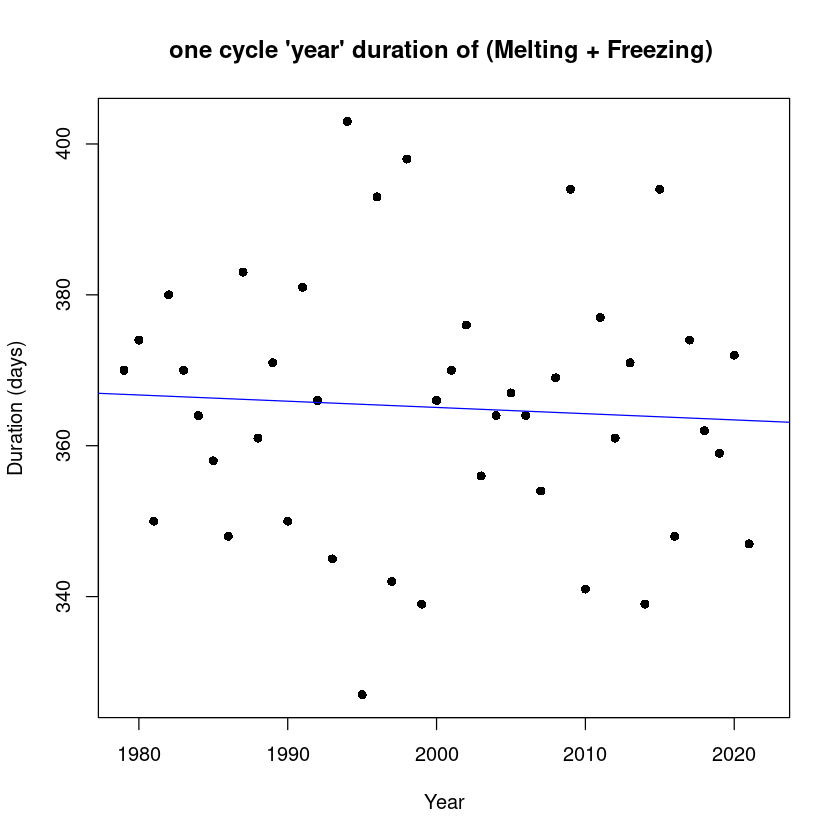

In [286]:
# Calculate the sum of melting_path and freezing_path
MaxMin_NH$sum_path <- MaxMin_NH$melting_path + MaxMin_NH$freezing_path

# Plotting the sum of melting_path and freezing_path with linear trend line
plot(MaxMin_NH$year, MaxMin_NH$sum_path, type = "p", col = "black", pch = 16, xlab = "Year", ylab = "Duration (days)", main = "one cycle 'year' duration of (Melting + Freezing) ")

# Add linear trend line
trend_line <- lm(MaxMin_NH$sum_path ~ MaxMin_NH$year)
abline(trend_line, col = "blue")

In [287]:
trend_line


Call:
lm(formula = MaxMin_NH$sum_path ~ MaxMin_NH$year)

Coefficients:
   (Intercept)  MaxMin_NH$year  
      530.2767         -0.0826  


In [288]:
# Get the R value of the trend_line
r_value <- summary(trend_line)$r.squared

r_value

[1] 0.003634267

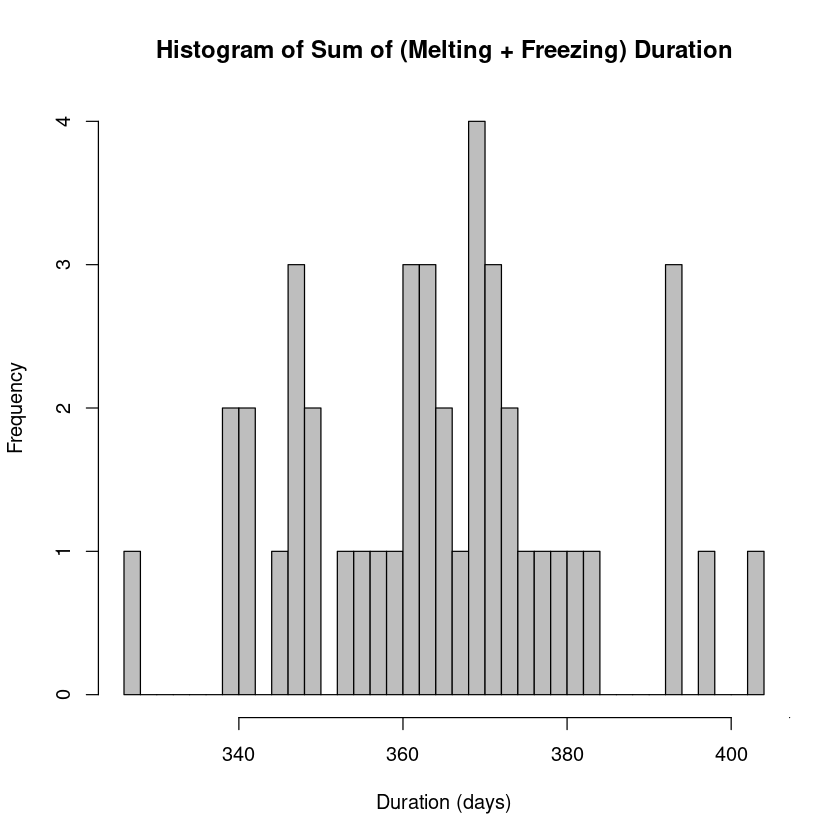

In [289]:
# Create a histogram of the sum_path variable with year labels
hist(MaxMin_NH$sum_path, main = "Histogram of Sum of (Melting + Freezing) Duration", xlab = "Duration (days)", col = "gray", breaks = 44)# I used 44 because there was 44 points
axis(side = 1, at = MaxMin_NH$year, labels = MaxMin_NH$year)

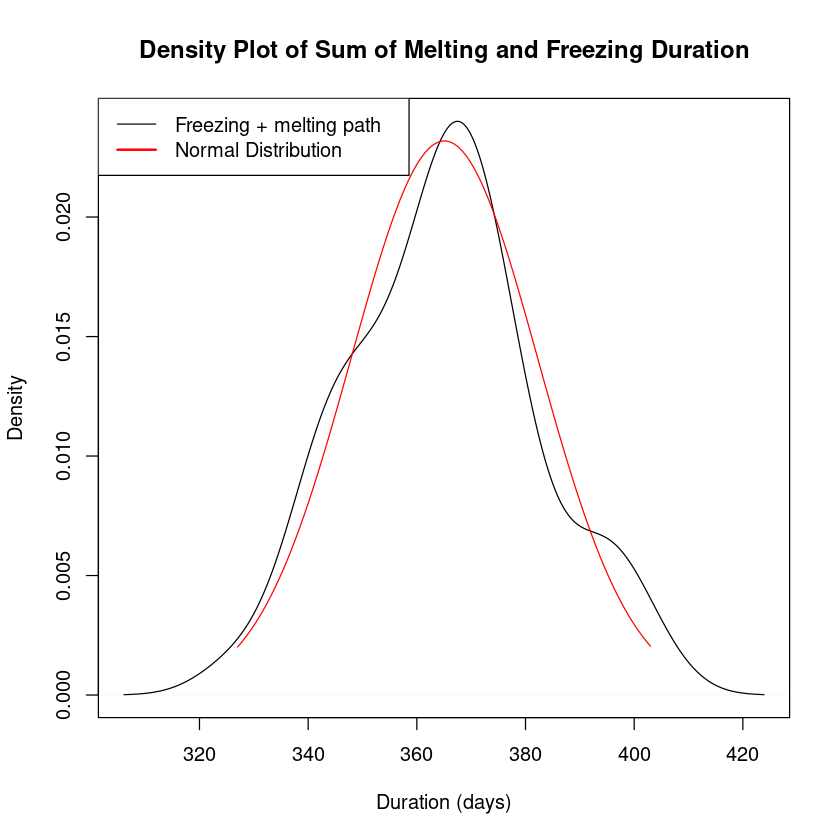

In [290]:
# Remove missing values from the sum_path variable
sum_path <- na.omit(MaxMin_NH$sum_path)

# Create a density plot of the sum_path variable with year labels
plot(density(sum_path), main = "Density Plot of Sum of Melting and Freezing Duration", xlab = "Duration (days)", col = "black")
axis(side = 1, at = MaxMin_NH$year, labels = MaxMin_NH$year)

# Add normal distribution overlay
x <- seq(min(sum_path), max(sum_path), length.out = 100)
y <- dnorm(x, mean = mean(sum_path), sd = sd(sum_path))
lines(x, y, col = "red")


# Add a legend
legend('topleft', legend = c("Freezing + melting path", "Normal Distribution"), col = c("black", "red"), lwd = c(1, 2), lty = c(1, 1))

In [291]:
# Check if the sum_path variable follows a normal distribution
shapiro.test(MaxMin_NH$sum_path)


	Shapiro-Wilk normality test

data:  MaxMin_NH$sum_path
W = 0.98312, p-value = 0.7694


The p-value of Shapiro-Wilk test is High (0.7), we can not reject the H0 hypothesis  
The year length (Icy_Year length) variation (sum_path) is accepted as normally distributed

In [292]:
# Save the MaxMin_NH$sum_path in a new vector
sum_path_vector <- MaxMin_NH$sum_path

# Drop the NA values from the vector
sum_path_vector <- sum_path_vector[!is.na(sum_path_vector)]

# Calculate the average of the non-NA values
average_sum_path <- mean(sum_path_vector)

# The average of the non-NA values of MaxMin_NH$sum_path
average_sum_path

[1] 365.0698

In [293]:
# Because the data follow normal distribution
# Here we will check its statistical properties 

# Summary statistics 
summary(sum_path_vector)
 
cat("The variance is:", round(var(sum_path_vector), 0), "days ^2", "\n")

cat("Standard Deviation:", round(sd(sum_path_vector), 0), "days", "\n")

cat("The data range is:", round((range(sum_path_vector)[2] - range(sum_path_vector)[1]), 1), "days", "\n")


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  327.0   352.0   366.0   365.1   374.0   403.0 

The variance is: 296 days ^2 
Standard Deviation: 17 days 
The data range is: 76 days 


There is no points that deviate more than three std from the mean.   


The std have high value which means that the length of complete cycle of melting and freezing can vary a lot. The maximum value in the data is 38 days longer than a year, wheras the minmum length of the cycle is 39 days less than a year.

Equation: Melting Path = 69.28 + 0.06 * Year 
R-squared: 0.0045 


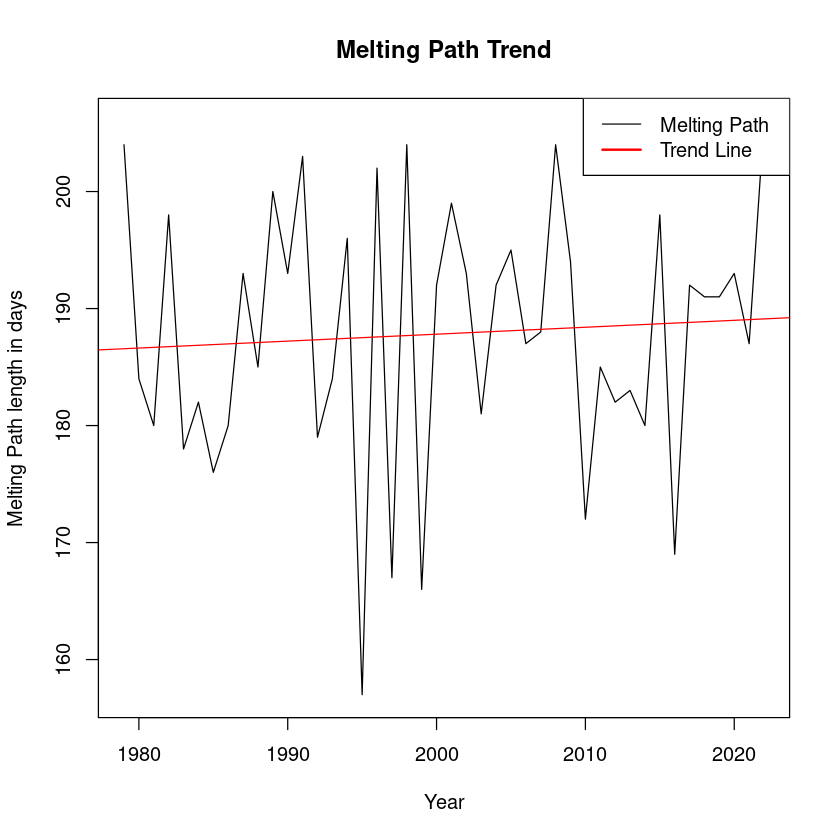

In [294]:
# Plot the melting path
plot(MaxMin_NH$year, MaxMin_NH$melting_path, type = "l", 
     main = "Melting Path Trend", xlab = "Year", ylab = "Melting Path length in days")

# Add a trend line
trend_line <- lm(melting_path ~ year, data = MaxMin_NH)
abline(trend_line, col = "red")

# Add a legend
legend('topright', legend = c("Melting Path", "Trend Line"), col = c("black", "red"), lwd = c(1, 2), lty = c(1, 1))

# Print the equation and R-squared value of the trend line
equation <- paste("Melting Path =", round(trend_line$coefficients[1], 2), "+", round(trend_line$coefficients[2], 2), "* Year")
r_squared <- round(summary(trend_line)$r.squared, 4)
cat("Equation:", equation, "\n")
cat("R-squared:", r_squared, "\n")

previous R value is very small.   
Next, we will check the normality

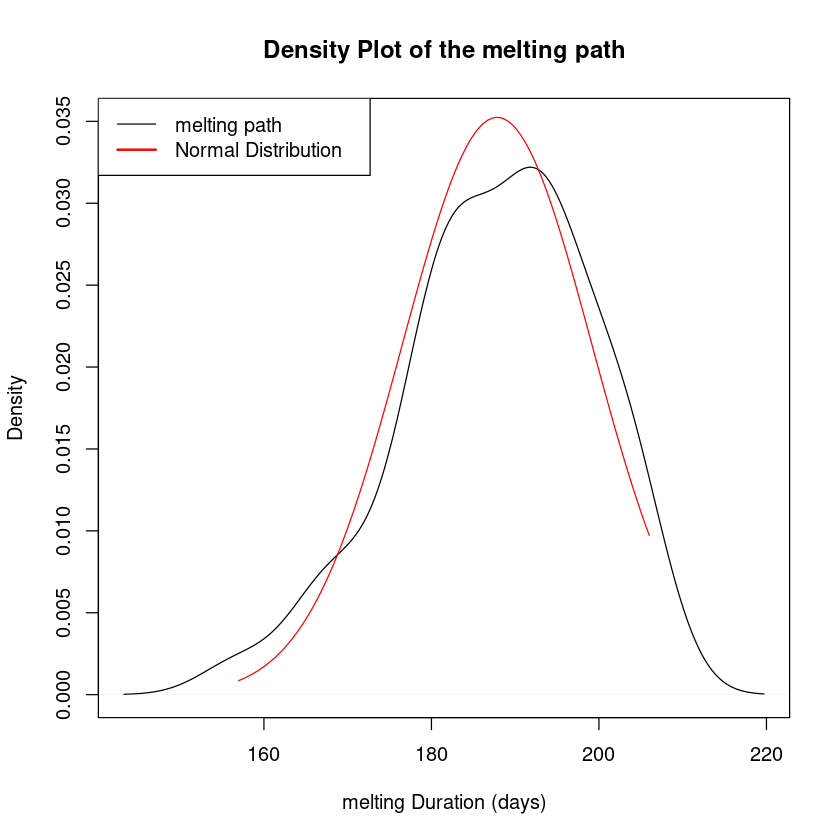

In [295]:
# Create a density plot of the sum_path variable with year labels
plot(density(MaxMin_NH$melting_path), main = "Density Plot of the melting path", xlab = "melting Duration (days)", col = "black", ylim = c(0, 0.035))


# Add normal distribution overlay
x <- seq(min(MaxMin_NH$melting_path), max(MaxMin_NH$melting_path), length.out = 100)
y <- dnorm(x, mean = mean(MaxMin_NH$melting_path), sd = sd(MaxMin_NH$melting_path))
lines(x, y, col = "red")

# Add a legend
legend('topleft', legend = c("melting path", "Normal Distribution"), col = c("black", "red"), lwd = c(1, 2), lty = c(1, 1))


In [296]:
# Check if MaxMin_NH$melting_path is normally distributed
shapiro.test(MaxMin_NH$melting_path)


	Shapiro-Wilk normality test

data:  MaxMin_NH$melting_path
W = 0.96604, p-value = 0.2179


The p-value of Shapiro-Wilk test is High (0.2), we can not reject the H0 hypothesis  
The melting_path variation is accepted as normally distributed

In [297]:
# Because the data follow normal distribution
# Here we will check its statistical properties 

# Summary statistics 
summary(MaxMin_NH$melting_path)
 
cat("The variance is:", round(var(MaxMin_NH$melting_path), 0), "days ^2", "\n")

cat("Standard Deviation:", round(sd(MaxMin_NH$melting_path), 0), "days", "\n")

cat("The data range is:", round((range(MaxMin_NH$melting_path)[2] - range(MaxMin_NH$melting_path)[1]), 1), "days", "\n")


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  157.0   180.8   189.5   187.8   195.2   206.0 

The variance is: 128 days ^2 
Standard Deviation: 11 days 
The data range is: 49 days 


In [298]:
# Calculate the average of the melting_path, dropping NA values
average_melting_path <- mean(na.omit(MaxMin_NH$melting_path))

# Display the average
average_melting_path


[1] 187.8409

There are no points that deviate more than three std from the mean.   


Equation: Freezing Path = 349.2 + -0.09 * Year 
R-squared: 0.0087 


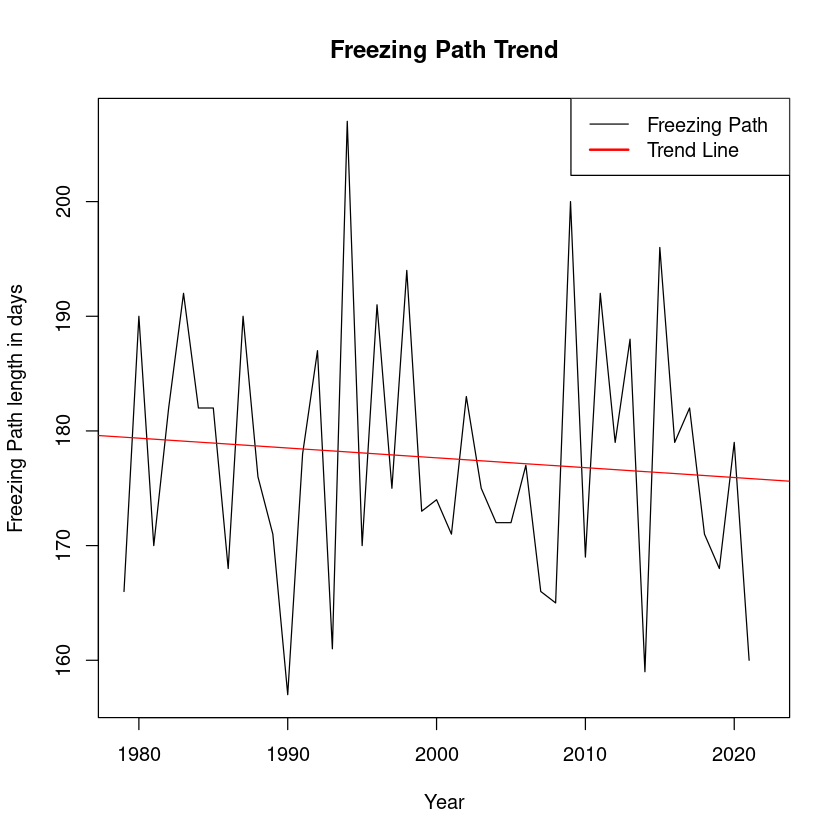

In [299]:
# Plot the freezing path
plot(MaxMin_NH$year, MaxMin_NH$freezing_path, type = "l", 
     main = "Freezing Path Trend", xlab = "Year", ylab = "Freezing Path length in days")

# Add a trend line
trend_line <- lm(freezing_path ~ year, data = MaxMin_NH)
abline(trend_line, col = "red")

# Add a legend
legend('topright', legend = c("Freezing Path", "Trend Line"), col = c("black", "red"), lwd = c(1, 2), lty = c(1, 1))

# Print the equation and R-squared value of the trend line
equation <- paste("Freezing Path =", round(trend_line$coefficients[1], 2), "+", round(trend_line$coefficients[2], 2), "* Year")
r_squared <- round(summary(trend_line)$r.squared, 4)
cat("Equation:", equation, "\n")
cat("R-squared:", r_squared, "\n")

previous R value is very small.   
Next, we will check the normality

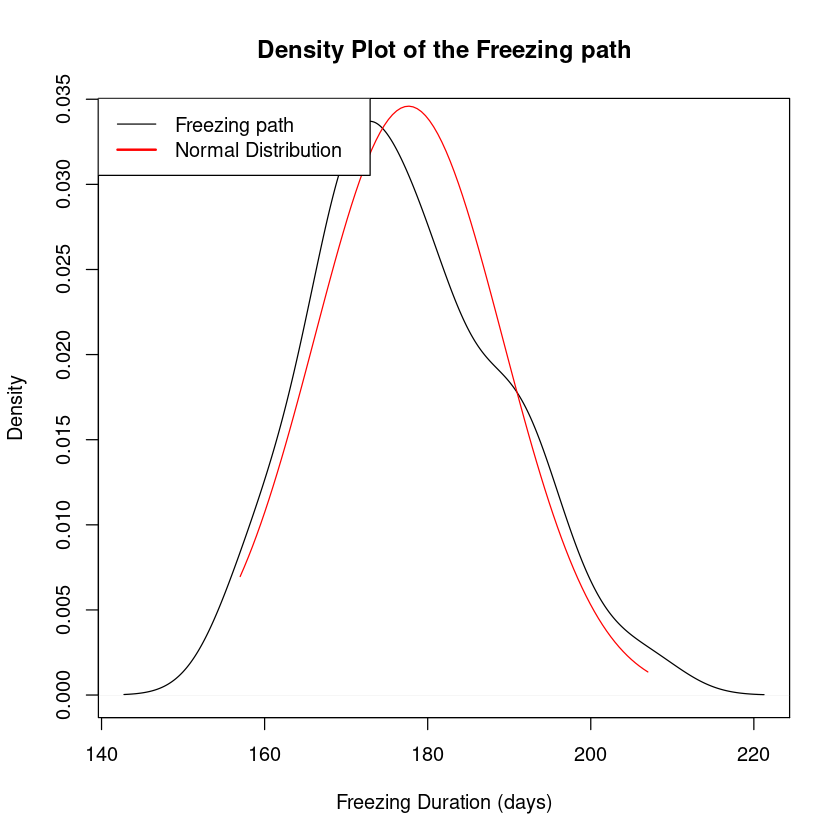

In [300]:
# Create a density plot of the sum_path variable with year labels
plot(density(na.omit(MaxMin_NH$freezing_path)), main = "Density Plot of the Freezing path", xlab = "Freezing Duration (days)", col = "black")
axis(side = 1, at = MaxMin_NH$year, labels = MaxMin_NH$year)

# Add normal distribution overlay
x <- seq(min(na.omit(MaxMin_NH$freezing_path)), max(na.omit(MaxMin_NH$freezing_path)), length.out = 100)
y <- dnorm(x, mean = mean(na.omit(MaxMin_NH$freezing_path)), sd = sd(na.omit(MaxMin_NH$freezing_path)))
lines(x, y, col = "red")

# Add a legend
legend('topleft', legend = c("Freezing path", "Normal Distribution"), col = c("black", "red"), lwd = c(1, 2), lty = c(1, 1))

In [301]:
# Check if MaxMin_NH$freezing_path is normally distributed
shapiro.test(MaxMin_NH$freezing_path)


	Shapiro-Wilk normality test

data:  MaxMin_NH$freezing_path
W = 0.97694, p-value = 0.5311


The p-value of Shapiro-Wilk test is High (0.53), we can not reject the H0 hypothesis  
The freezing_path variation is accepted as normally distributed

In [302]:
# Because the data follow normal distribution
# Here we will check its statistical properties 

# Our data have NA so we need to remove it first
freezing_path <- na.omit(MaxMin_NH$freezing_path)

# Summary statistics 
summary(freezing_path)
 
cat("The variance is:", round(var(freezing_path), 0), "days ^2", "\n")

cat("Standard Deviation:", round(sd(freezing_path), 0), "days", "\n")

cat("The data range is:", round((range(freezing_path)[2] - range(freezing_path)[1]), 1), "days", "\n")


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  157.0   170.0   176.0   177.7   185.0   207.0 

The variance is: 133 days ^2 
Standard Deviation: 12 days 
The data range is: 50 days 


In [303]:
# Calculate the average of the freezing_path, dropping NA values
average_freezing_path <- mean(na.omit(MaxMin_NH$freezing_path))

# Display the average
average_freezing_path

[1] 177.6512

In [304]:
print('according to data with daily resolution')
print(paste('The average of melting path is:', round(average_melting_path,0), 'days'))
print(paste('and The average of freezing path is:', round(average_freezing_path,0), 'days'))


# Print the old result which was According the data which take a 30 years average
paste("According the data which take a 30 years average")
paste("The melting path has", num_melting_days, "days.")
paste("The freezing path has", num_freezing_days, "days.")

[1] "according to data with daily resolution"
[1] "The average of melting path is: 188 days"
[1] "and The average of freezing path is: 178 days"


[1] "According the data which take a 30 years average"

[1] "The melting path has 197 days."

[1] "The freezing path has 171 days."

In both datasets we calculated that the freezing path is shorter.  
In the dataset (average 30 years) the gap was almost a month!   
But using the daily resolution dataset reveals smaller gap of only extra ten days in time for melting   

I Think that using the daily resolution is more valid than the average dataset for the pth calculations.    
The higher gap value in average dataset is the result of averging the average.    

In the next code lines we will visualizes and invistigate that for every year the extra days in melting or in freezing   


We concluded that the melting path is 188 days in average, whereas the freezing one is 178. Both std is 11 days.

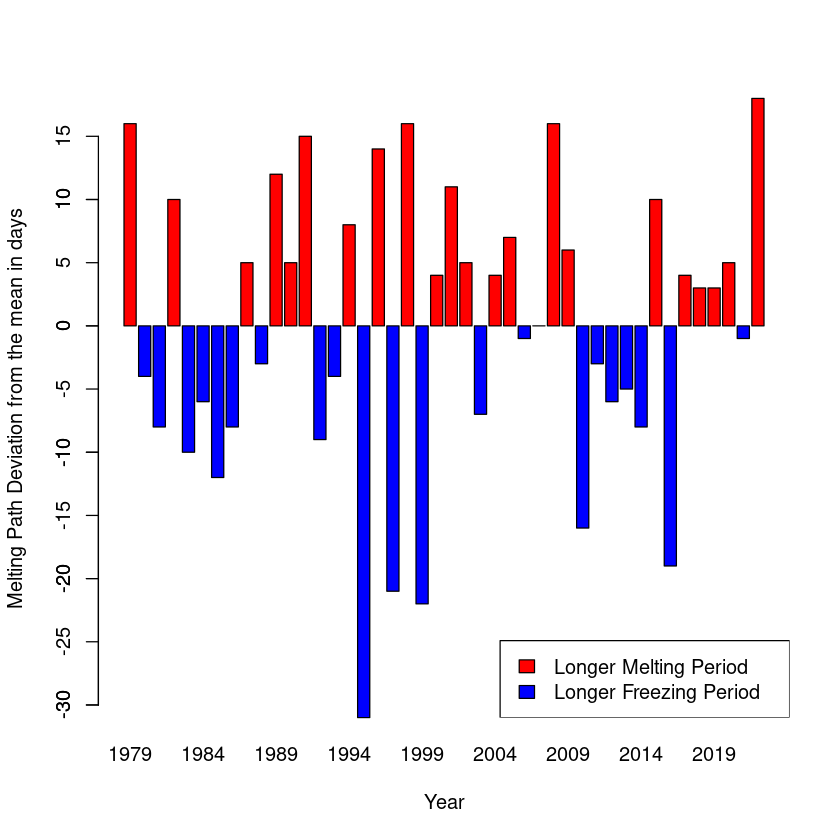

In [305]:
# Creating a new column called "melting_path_deviation"
# Its value will be calculated as the deviation of the melting path from the mean (188) days
# melting_path_deviation = melting_pat  - 188
# when its value is positive that will means longer melting period and I will plot it in red
# When the value is negative that will mean longer freezing period and I will plot it in blue

# Calculate the melting path deviation
MaxMin_NH$melting_path_deviation <- (MaxMin_NH$melting_path) - 188

color_list = ifelse((MaxMin_NH$melting_path_deviation) > 0, "red", "blue")

barplot(MaxMin_NH$melting_path_deviation, names.arg = MaxMin_NH$year, xlab = "Year", ylab = "Melting Path Deviation from the mean in days", col = color_list)

# Add legend
legend("bottomright", legend = c("Longer Melting Period", "Longer Freezing Period"), fill = c("red", "blue"))

# improve y scale
y_max <- max(MaxMin_NH$melting_path_deviation)
y_min <- min(MaxMin_NH$melting_path_deviation)
axis(2, at = seq(y_min+1, y_max, by = 5), labels = seq(y_min+1, y_max, by = 5))

In [306]:
print(paste("Although the La Nina conditions in the last years, The melting path in the last year of 2022 is", MaxMin_NH$melting_path_deviation[44], "days longer than the mean"))

[1] "Although the La Nina conditions in the last years, The melting path in the last year of 2022 is 18 days longer than the mean"


From the code above, we observed that the Arctic Sea Ice has recently relatively longer melting period than the mean. We need to check if longer melting period will result in melting more Sea Ice. In the next code we will check the correlation between the melting_path and the melting_area. Same will be done for the freezing path and area.

In [307]:
# In the next code we aill invistigate the relation between Melting path and the Melted area
# 								   				Also the Freezing path and the Freezen area

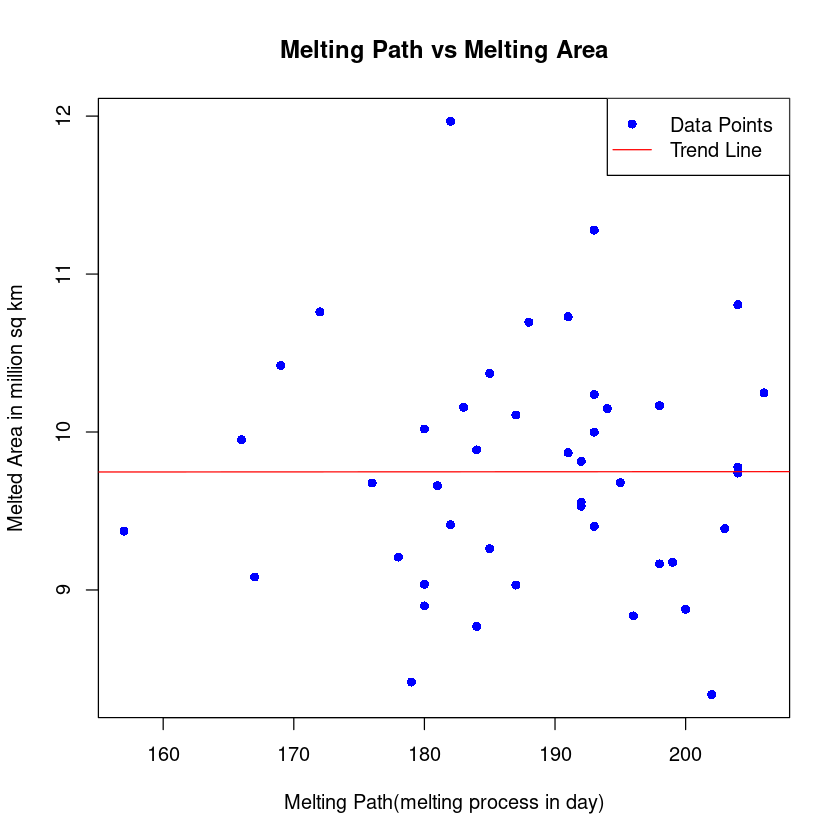

In [308]:
# Create a scatter plot of the melting path and melting area
plot(MaxMin_NH$melting_path, MaxMin_NH$melted_area, 
     main = "Melting Path vs Melting Area",
     xlab = "Melting Path(melting process in day)",
     ylab = "Melted Area in million sq km",
     pch = 16,
     col = "blue")

# Add a trend line
lm_model <- lm(melted_area ~ melting_path, data = MaxMin_NH)
abline(lm_model, col = "red")

# Add a legend
legend('topright', legend = c("Data Points", "Trend Line"), col = c("blue", "red"), pch = c(16, NA), lwd = c(NA, 1))

Visually, I can not recognize any clustering or trend

In [309]:
summary(lm_model)


Call:
lm(formula = melted_area ~ melting_path, data = MaxMin_NH)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.41177 -0.54827 -0.03917  0.41059  2.21903 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.741e+00  1.906e+00   5.110 7.45e-06 ***
melting_path 4.019e-05  1.013e-02   0.004    0.997    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7519 on 42 degrees of freedom
Multiple R-squared:  3.747e-07,	Adjusted R-squared:  -0.02381 
F-statistic: 1.574e-05 on 1 and 42 DF,  p-value: 0.9969


The R value id very small (-0.02). I conclude no correlation

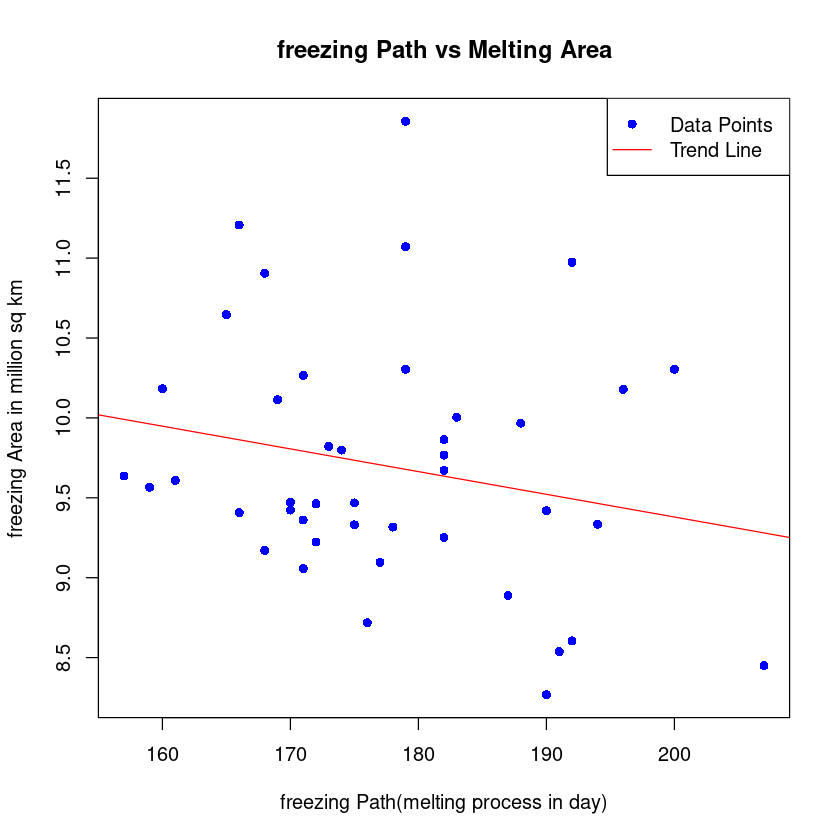

In [310]:
# Create a scatter plot of the melting path and melting area
plot(MaxMin_NH$freezing_path, MaxMin_NH$freezed_area, 
     main = "freezing Path vs Melting Area",
     xlab = "freezing Path(melting process in day)",
     ylab = "freezing Area in million sq km",
     pch = 16,
     col = "blue")

# Add a trend line
lm_model <- lm(freezed_area ~ freezing_path, data = MaxMin_NH)
abline(lm_model, col = "red")

# Add a legend
legend('topright', legend = c("Data Points", "Trend Line"), col = c("blue", "red"), pch = c(16, NA), lwd = c(NA, 1))

Visually, I can not recognize any clustering or trend

In [311]:
summary(lm_model)


Call:
lm(formula = freezed_area ~ freezing_path, data = MaxMin_NH)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2537 -0.4432 -0.2668  0.3999  2.1780 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   12.22196    1.81430   6.736 3.89e-08 ***
freezing_path -0.01421    0.01019  -1.394    0.171    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7617 on 41 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.04528,	Adjusted R-squared:  0.02199 
F-statistic: 1.945 on 1 and 41 DF,  p-value: 0.1707


The R value id very small (-0.02). I conclude no correlation

In [312]:
#  ❄️❄️❄️❄️❄️❄️             Comparing every month separately             ❄️❄️❄️❄️❄️❄️

Because of the high seasonality, we could compare every month separately in the time series to find the long trend. So, we will split our time series into 12 series and check the trend of every month's series in terms of average change (total ice loss). Comparing the long trend of only one month will also help us to lessen the Climatological Cycle variation.

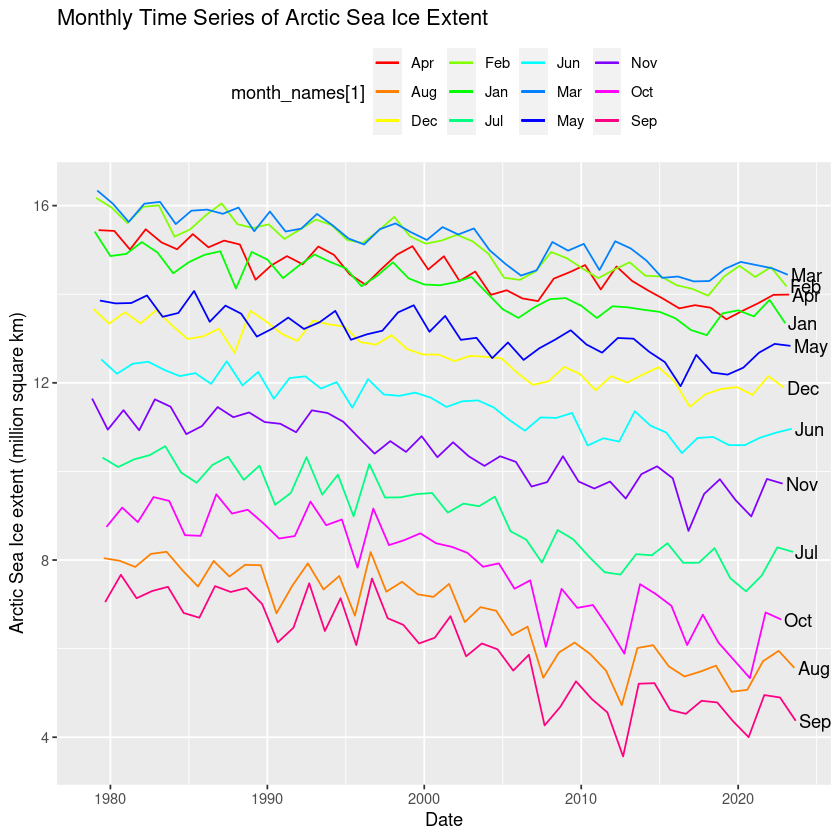

In [313]:
# Split the NH_monthly data into 12 series based on month
monthly_series <- split(NH_monthly, format(NH_monthly$date, "%b"))

# Create a vector of month names
month_names <- names(monthly_series)#  Beware, the list ordered alphabetically. it is not month order
# If you print it out you will see the alphabetical order
# 'Apr''Aug''Dec''Feb''Jan''Jul''Jun''Mar''May''Nov''Oct''Sep'
# So the monthly_series[[1]]  is April


# Plot the 12 time series on the same figure
ggplot() +
  geom_line(data = monthly_series[[1]], aes(x = date, y = extent_NH, color = month_names[1])) +
  geom_line(data = monthly_series[[2]], aes(x = date, y = extent_NH, color = month_names[2])) +
  geom_line(data = monthly_series[[3]], aes(x = date, y = extent_NH, color = month_names[3])) +
  geom_line(data = monthly_series[[4]], aes(x = date, y = extent_NH, color = month_names[4])) +
  geom_line(data = monthly_series[[5]], aes(x = date, y = extent_NH, color = month_names[5])) +
  geom_line(data = monthly_series[[6]], aes(x = date, y = extent_NH, color = month_names[6])) +
  geom_line(data = monthly_series[[7]], aes(x = date, y = extent_NH, color = month_names[7])) +
  geom_line(data = monthly_series[[8]], aes(x = date, y = extent_NH, color = month_names[8])) +
  geom_line(data = monthly_series[[9]], aes(x = date, y = extent_NH, color = month_names[9])) +
  geom_line(data = monthly_series[[10]], aes(x = date, y = extent_NH, color = month_names[10])) +
  geom_line(data = monthly_series[[11]], aes(x = date, y = extent_NH, color = month_names[11])) +
  geom_line(data = monthly_series[[12]], aes(x = date, y = extent_NH, color = month_names[12])) +
  geom_text(data = monthly_series[[1]][nrow(monthly_series[[1]]) , ], aes(x = date, y = extent_NH, label = month_names[1]), hjust = -0.1, vjust = 0.5, color = "black") +
  geom_text(data = monthly_series[[2]][nrow(monthly_series[[2]]) , ], aes(x = date, y = extent_NH, label = month_names[2]), hjust = -0.1, vjust = 0.5, color = "black") +
  geom_text(data = monthly_series[[3]][nrow(monthly_series[[3]]) , ], aes(x = date, y = extent_NH, label = month_names[3]), hjust = -0.1, vjust = 0.5, color = "black") +
  geom_text(data = monthly_series[[4]][nrow(monthly_series[[4]]) , ], aes(x = date, y = extent_NH, label = month_names[4]), hjust = -0.1, vjust = 0.5, color = "black") +
  geom_text(data = monthly_series[[5]][nrow(monthly_series[[5]]) , ], aes(x = date, y = extent_NH, label = month_names[5]), hjust = -0.1, vjust = 0.5, color = "black") +
  geom_text(data = monthly_series[[6]][nrow(monthly_series[[6]]) , ], aes(x = date, y = extent_NH, label = month_names[6]), hjust = -0.1, vjust = 0.5, color = "black") +
  geom_text(data = monthly_series[[7]][nrow(monthly_series[[7]]) , ], aes(x = date, y = extent_NH, label = month_names[7]), hjust = -0.1, vjust = 0.5, color = "black") +
  geom_text(data = monthly_series[[8]][nrow(monthly_series[[8]]) , ], aes(x = date, y = extent_NH, label = month_names[8]), hjust = -0.1, vjust = 0.5, color = "black") +
  geom_text(data = monthly_series[[9]][nrow(monthly_series[[9]]) , ], aes(x = date, y = extent_NH, label = month_names[9]), hjust = -0.1, vjust = 0.5, color = "black") +
  geom_text(data = monthly_series[[10]][nrow(monthly_series[[10]]) , ], aes(x = date, y = extent_NH, label = month_names[10]), hjust = -0.1, vjust = 0.5, color = "black") +
  geom_text(data = monthly_series[[11]][nrow(monthly_series[[11]]) , ], aes(x = date, y = extent_NH, label = month_names[11]), hjust = -0.1, vjust = 0.5, color = "black") +
  geom_text(data = monthly_series[[12]][nrow(monthly_series[[12]]) , ], aes(x = date, y = extent_NH, label = month_names[12]), hjust = -0.1, vjust = 0.5, color = "black") +
  xlab("Date") +
  ylab("Arctic Sea Ice extent (million square km)") +
  ggtitle("Monthly Time Series of Arctic Sea Ice Extent") +
  scale_color_manual(values = rainbow(12), labels = month_names) +
  theme(legend.position = "top")


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


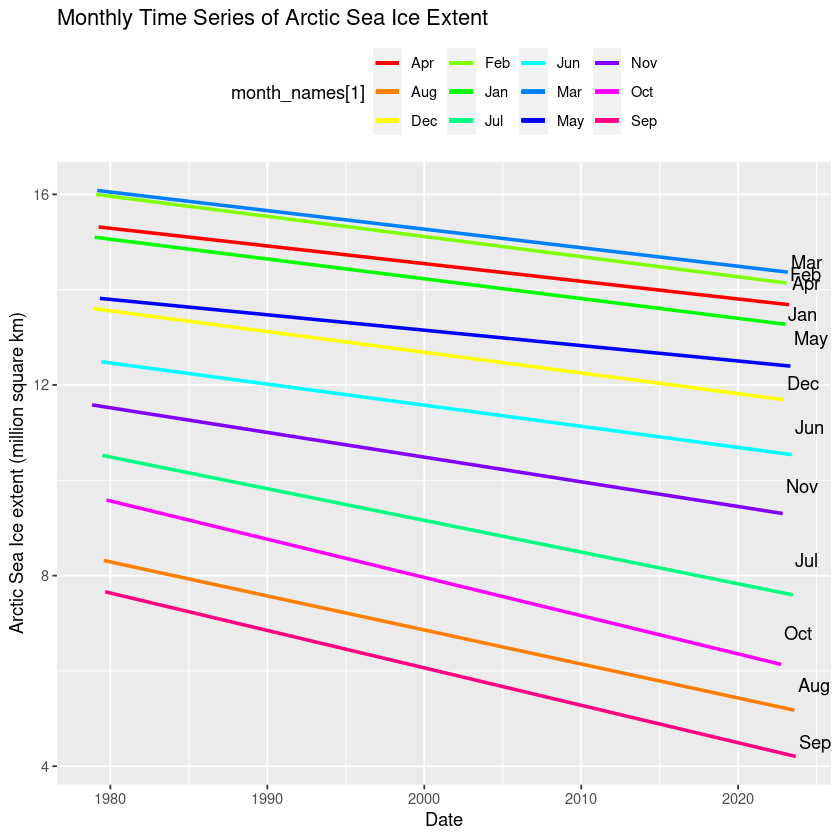

In [314]:
# Split the NH_monthly data into 12 series based on month
monthly_series <- split(NH_monthly, format(NH_monthly$date, "%b"))

# Create a vector of month names
month_names <- names(monthly_series)

# Plot the linear trend line for each month
ggplot() +
  geom_smooth(data = monthly_series[[1]], aes(x = date, y = extent_NH, color = month_names[1]), method = "lm", se = FALSE) +
  geom_smooth(data = monthly_series[[2]], aes(x = date, y = extent_NH, color = month_names[2]), method = "lm", se = FALSE) +
  geom_smooth(data = monthly_series[[3]], aes(x = date, y = extent_NH, color = month_names[3]), method = "lm", se = FALSE) +
  geom_smooth(data = monthly_series[[4]], aes(x = date, y = extent_NH, color = month_names[4]), method = "lm", se = FALSE) +
  geom_smooth(data = monthly_series[[5]], aes(x = date, y = extent_NH, color = month_names[5]), method = "lm", se = FALSE) +
  geom_smooth(data = monthly_series[[6]], aes(x = date, y = extent_NH, color = month_names[6]), method = "lm", se = FALSE) +
  geom_smooth(data = monthly_series[[7]], aes(x = date, y = extent_NH, color = month_names[7]), method = "lm", se = FALSE) +
  geom_smooth(data = monthly_series[[8]], aes(x = date, y = extent_NH, color = month_names[8]), method = "lm", se = FALSE) +
  geom_smooth(data = monthly_series[[9]], aes(x = date, y = extent_NH, color = month_names[9]), method = "lm", se = FALSE) +
  geom_smooth(data = monthly_series[[10]], aes(x = date, y = extent_NH, color = month_names[10]), method = "lm", se = FALSE) +
  geom_smooth(data = monthly_series[[11]], aes(x = date, y = extent_NH, color = month_names[11]), method = "lm", se = FALSE) +
  geom_smooth(data = monthly_series[[12]], aes(x = date, y = extent_NH, color = month_names[12]), method = "lm", se = FALSE) +
  geom_text(data = monthly_series[[1]][nrow(monthly_series[[1]]) , ], aes(x = date, y = extent_NH, label = month_names[1]), hjust = -0.1, vjust = 0, color = "black") +
  geom_text(data = monthly_series[[2]][nrow(monthly_series[[2]]) , ], aes(x = date, y = extent_NH, label = month_names[2]), hjust = -0.1, vjust = 0, color = "black") +
  geom_text(data = monthly_series[[3]][nrow(monthly_series[[3]]) , ], aes(x = date, y = extent_NH, label = month_names[3]), hjust = -0.1, vjust = 0, color = "black") +
  geom_text(data = monthly_series[[4]][nrow(monthly_series[[4]]) , ], aes(x = date, y = extent_NH, label = month_names[4]), hjust = -0.1, vjust = 0, color = "black") +
  geom_text(data = monthly_series[[5]][nrow(monthly_series[[5]]) , ], aes(x = date, y = extent_NH, label = month_names[5]), hjust = -0.1, vjust = 0, color = "black") +
  geom_text(data = monthly_series[[6]][nrow(monthly_series[[6]]) , ], aes(x = date, y = extent_NH, label = month_names[6]), hjust = -0.1, vjust = 0, color = "black") +
  geom_text(data = monthly_series[[7]][nrow(monthly_series[[7]]) , ], aes(x = date, y = extent_NH, label = month_names[7]), hjust = -0.1, vjust = 0, color = "black") +
  geom_text(data = monthly_series[[8]][nrow(monthly_series[[8]]) , ], aes(x = date, y = extent_NH, label = month_names[8]), hjust = -0.1, vjust = 0, color = "black") +
  geom_text(data = monthly_series[[9]][nrow(monthly_series[[9]]) , ], aes(x = date, y = extent_NH, label = month_names[9]), hjust = -0.1, vjust = 0, color = "black") +
  geom_text(data = monthly_series[[10]][nrow(monthly_series[[10]]) , ], aes(x = date, y = extent_NH, label = month_names[10]), hjust = -0.1, vjust = 0, color = "black") +
  geom_text(data = monthly_series[[11]][nrow(monthly_series[[11]]) , ], aes(x = date, y = extent_NH, label = month_names[11]), hjust = -0.1, vjust = 0, color = "black") +
  geom_text(data = monthly_series[[12]][nrow(monthly_series[[12]]) , ], aes(x = date, y = extent_NH, label = month_names[12]), hjust = -0.1, vjust = 0, color = "black") +
  xlab("Date") +
  ylab("Arctic Sea Ice extent (million square km)") +
  ggtitle("Monthly Time Series of Arctic Sea Ice Extent") +
  scale_color_manual(values = rainbow(12), labels = month_names) +
  theme(legend.position = "top")


In [315]:
# Calculate and store the slope of each trend line
# print out R value of the linear regression
slope_values <- numeric(12)
for (i in 1:12) {
  trend_line <- lm(extent_NH ~ year, data = monthly_series[[i]])
  slope_values[i] <- coef(trend_line)[2]
  cat(paste("R-squared value for", month_names[i], "is", round(summary(trend_line)$r.squared,2), "\n"))
}

# Calculate the decreasing trend in million square km per decade from the slope value
# Then print out the calculation
NH_decreasing <- (slope_values * 10)
for (i in 1:12) {
  trend_line <- lm(extent_NH ~ year, data = monthly_series[[i]])
  print(paste("The decreasing trend of Arctic Sea ICE Extent in", month_names[i], "is", round(NH_decreasing[i],3), "million square km per decade."))
  cat(paste("At this trend , there will be no ice in the year", round(-coef(trend_line)[1] / coef(trend_line)[2]), "for the month", month_names[i], "\n", "\n"))
  
}

R-squared value for Apr is 0.75 
R-squared value for Aug is 0.82 
R-squared value for Dec is 0.85 
R-squared value for Feb is 0.83 
R-squared value for Jan is 0.83 
R-squared value for Jul is 0.85 
R-squared value for Jun is 0.87 
R-squared value for Mar is 0.81 
R-squared value for May is 0.69 
R-squared value for Nov is 0.81 
R-squared value for Oct is 0.79 
R-squared value for Sep is 0.8 
[1] "The decreasing trend of Arctic Sea ICE Extent in Apr is -0.371 million square km per decade."
At this trend , there will be no ice in the year 2392 for the month Apr 
 
[1] "The decreasing trend of Arctic Sea ICE Extent in Aug is -0.714 million square km per decade."
At this trend , there will be no ice in the year 2096 for the month Aug 
 
[1] "The decreasing trend of Arctic Sea ICE Extent in Dec is -0.434 million square km per decade."
At this trend , there will be no ice in the year 2291 for the month Dec 
 
[1] "The decreasing trend of Arctic Sea ICE Extent in Feb is -0.423 million square 

September is the month with lowest sea ice extent and if the trend continues there will be no sea ice in 2077.   
We must realize that 2077 is very optimistic because:
* The Earth System is nonlinear; The Heaviside function triggers most events
* The warming is tackled by system inertia
* Our GHG is not zero or even expected to decline
So the expected ice-free event is expected earlier than 2077.

Our linear model is in the same order of the climatic models like CMIP6.  

"_The predicted year of disappearance of September sea ice under high-emissions scenarios is 2086 for HadCM3 (CMIP3/5), 2048 for HadGEM2-ES (CMIP5) and 2035 for HadGEM3 (CMIP6)_" according to [Guarino](https://www.nature.com/articles/s41558-020-0865-2) et al, (2020)

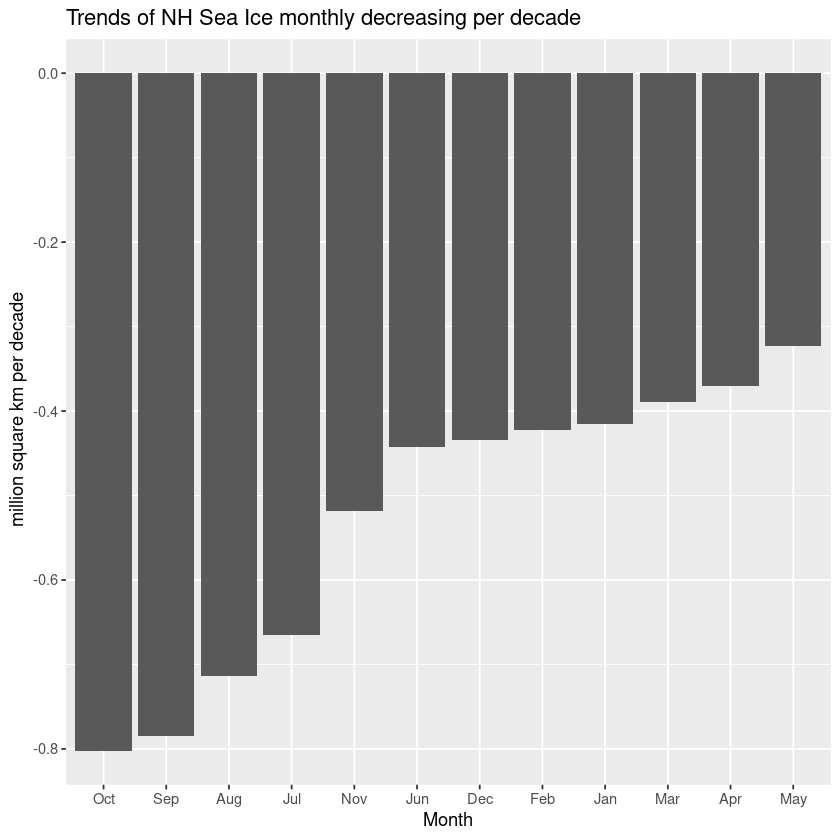

In [316]:
# Create a dataframe for the Trends of NH Sea Ice monthly decreasing per decade
# This dataframe contain month_names and NH_decreasing from the code above
NH_Monthly_trend <- data.frame(month_names = month_names, NH_decreasing = NH_decreasing)

# Order the df dataframe in ascending order based on NH_decreasing
NH_Monthly_trend <- NH_Monthly_trend[order(NH_Monthly_trend$NH_decreasing), ]

# Create a factor variable for month_names in the desired order
NH_Monthly_trend$month_names <- factor(NH_Monthly_trend$month_names, levels = NH_Monthly_trend$month_names)

ggplot(NH_Monthly_trend, aes(x = month_names, y = NH_decreasing)) +
  geom_col() +
  labs(x = "Month", y =" million square km per decade") +
  ggtitle("Trends of NH Sea Ice monthly decreasing per decade")

From the figure above, we can observe a trend of losing Sea Ice in all months. Nevertheless, the months after the northern hemisphere summer (Oct, Sep, and Aug) lost ice at a rate almost two times more than the months after the Northern hemisphere winter (May, Apr, Mar).  
The winters temperature are in general, far lower than freezing. The critical time for ice melting is in summer. This makes the summer Sea Ice more sensitive to global warming and could explain the faster melting trend in these months after summer.  



From our conclusion above, We hypothesize that the seasonal Sea Ice fluctuation trend is increasing, which can impact the climate and increase the inertia in the system; in the following code, we will try to quantify this cyclicity increase. We will investigate the total amount that freezes or melts per year and investigate if this amount is increasing as we hypothesize above or not.

In [317]:
# Calculate the annual maximum value of NH_monthly$extent_NH
NH_annual_max <- aggregate(NH_monthly$extent_NH, by = list(year = format(NH_monthly$date, "%Y")), FUN = max)

# Calculate the annual minimum value of NH_monthly$extent_NH
NH_annual_min <- aggregate(NH_monthly$extent_NH, by = list(year = format(NH_monthly$date, "%Y")), FUN = min)

# Calculate the total seasonal fluctuation in a year
NH_annual_fluctuation <- NH_annual_max$x - NH_annual_min$x

# Convert annual_fluctuation to an array
NH_annual_fluctuation <- as.array(NH_annual_fluctuation)

# Remove the first and last value from annual_fluctuation because there is no enough maesurments in these years
NH_annual_fluctuation <- NH_annual_fluctuation[-c(1, length(NH_annual_fluctuation))]

# Create a data frame with 'year' column from 1979 to 2022
NH_annual_fluctuation <- data.frame(year = 1979:2022, fluctuation = NH_annual_fluctuation)

There is a trend of increasing the annual area of sea that melt and freez by 0.4 million square km per decade 
R value: 0.44 

 
 
Total trend of the annual increasing area of sea that melt and freeze by 1.7 million square km in the time between 1979 and 2022. 
This is an area 41 times bigger than the Netherlands of extra ice added to the system in NH that melt and freeze every year. 
Means extra of both heating and cooling in the system because with Ice melting we will cool the system and with freezing we will heat the system. 
Suppose that the ice is just one meter thick. 
That will means 519099 millions joules extra added AND removed from the system every year. 
Extra energy added and removed to the system annually in Hiroshima bomb equivalents 35 Hiroshima bombs 


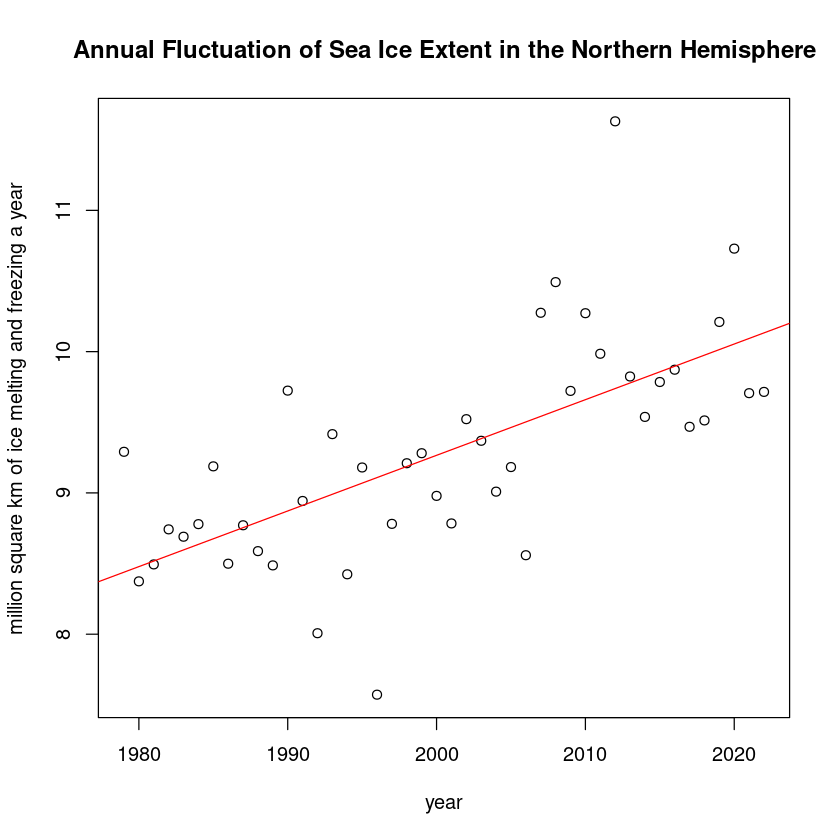

In [318]:
# plot NH_annual_fluctuation
plot(NH_annual_fluctuation, main = "Annual Fluctuation of Sea Ice Extent in the Northern Hemisphere",
     ylab = "million square km of ice melting and freezing a year")

# Add a trend line
trend_line <- lm(fluctuation ~ year, data = NH_annual_fluctuation)
abline(trend_line, col = "red")

# Plot the equation on the plot
equation <- paste0("y = ", round(trend_line$coefficients[1], 2), " + ", round(trend_line$coefficients[2], 2), "x")
text(1980, 2, equation, pos = 4)

# Print the slope of the line
# Which is the annual increase in Sea Ice melting and freezing a year
# let us considerthe trend for a decade
slope <- round(trend_line$coefficients[2], 2)
cat("There is a trend of increasing the annual area of sea that melt and freez by", slope*10,"million square km per decade", "\n")

# Print the R value
r_value <- round(summary(trend_line)$r.squared, 2)
cat("R value:", r_value, "\n")


cat("\n", "\n", "\n")

# Finiding the total increase in the annual Sea Ice Fluctuation

# Finding the value of the year 1979 and 2022 in the regression model of trend_line
value_1979 <- trend_line$coefficients[1] + trend_line$coefficients[2] * 1979
value_2022 <- trend_line$coefficients[1] + trend_line$coefficients[2] * 2022
Total_NH_fluctuation_increase  <-  value_2022 - value_1979
cat("Total trend of the annual increasing area of sea that melt and freeze by", round(Total_NH_fluctuation_increase,1),"million square km in the time between 1979 and 2022.", "\n")
cat("This is an area",round(Total_NH_fluctuation_increase/0.041),"times bigger than the Netherlands of extra ice added to the system in NH that melt and freeze every year.", "\n")
cat("Means extra of both heating and cooling in the system because with Ice melting we will cool the system and with freezing we will heat the system.", "\n")
cat("Suppose that the ice is just one meter thick.", "\n")
cat("That will means",round(306478 * Total_NH_fluctuation_increase),"millions joules extra added AND removed from the system every year.", "\n")
# Energy of Hiroshima bomb ≈ 
cat("Extra energy added and removed to the system annually in Hiroshima bomb equivalents", round((306478 * Total_NH_fluctuation_increase)/15000,0),"Hiroshima bombs", "\n")


The R value of the regression model is 0.44. We need to consider testing if this fit is the best fit or not. Let us try an exponential fit

R value: 0.45 

 
 
Total trend of the annual increasing area of sea that melt and freeze by 1.7 million square km in the time between 1979 and 2022. 
This is an area 41 times bigger than the Netherlands of extra ice added to the system in NH that melt and freeze every year. 
Means extra of both heating and cooling in the system because with Ice melting we will cool the system and with freezing we will heat the system. 
Suppose that the ice is just one meter thick. 
That will means 519099 millions joules extra added AND removed from the system every year. 
Extra energy added and removed to the system annually in Hiroshima bomb equivalents 35 Hiroshima bombs 


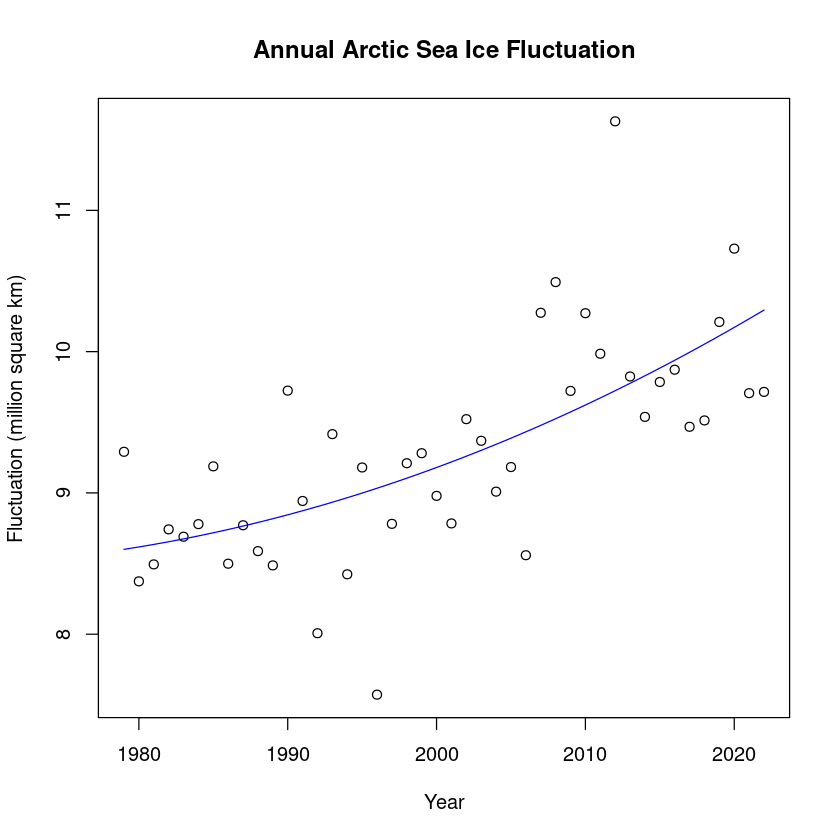

In [319]:
# Fit an exponential regression model
exp_model <- lm(fluctuation ~ year + I(year^2), data = NH_annual_fluctuation)
plot(NH_annual_fluctuation$year, NH_annual_fluctuation$fluctuation, xlab = "Year", ylab = "Fluctuation (million square km)", main = "Annual Arctic Sea Ice Fluctuation")
lines(NH_annual_fluctuation$year, predict(exp_model), col = "blue")

# Plot the equation on the plot
equation <- paste0("y = ", round(exp_model$coefficients[1], 2), " + ", round(exp_model$coefficients[2], 2), "x + ", round(exp_model$coefficients[3], 2), "x^2")
text(1980, 2, equation, pos = 4)

# Print the R value
r_value <- round(summary(exp_model)$r.squared, 2)
cat("R value:", r_value, "\n")

cat("\n", "\n", "\n")

# Finding the total increase in the annual Sea Ice Fluctuation

# Finding the value of the year 1979 and 2022 in the exponential regression model
value_1979 <- predict(exp_model)[1]
value_2022 <- predict(exp_model)[44]
Total_NH_fluctuation_increase <- value_2022 - value_1979
cat("Total trend of the annual increasing area of sea that melt and freeze by", round(Total_NH_fluctuation_increase, 1), "million square km in the time between 1979 and 2022.", "\n")
cat("This is an area", round(Total_NH_fluctuation_increase / 0.041), "times bigger than the Netherlands of extra ice added to the system in NH that melt and freeze every year.", "\n")
cat("Means extra of both heating and cooling in the system because with Ice melting we will cool the system and with freezing we will heat the system.", "\n")
cat("Suppose that the ice is just one meter thick.", "\n")
cat("That will means", round(306478 * Total_NH_fluctuation_increase), "millions joules extra added AND removed from the system every year.", "\n")
# Energy of Hiroshima bomb ≈ 15000 millions joules
cat("Extra energy added and removed to the system annually in Hiroshima bomb equivalents", round((306478 * Total_NH_fluctuation_increase) / 15000, 0), "Hiroshima bombs", "\n")

In [320]:
exp_model


Call:
lm(formula = fluctuation ~ year + I(year^2), data = NH_annual_fluctuation)

Coefficients:
(Intercept)         year    I(year^2)  
  2.077e+03   -2.107e+00    5.364e-04  


The difference between the linear and the exponential regression model in R-value was slightly small but visually looks better. We could investigate that statistically

The total energy change in the system due to the extra area of freezing and melting is significant. Still, the energy balance change due to the albedo change is even bigger. [Kashiwase](https://www.nature.com/articles/s41598-017-08467-z) et al, 2017 concluded that the Albedo effect positive feedback could explain the drastic ice reduction in the Arctic Ocean.    
 
We conclude that we as human changed the Earth system successfully


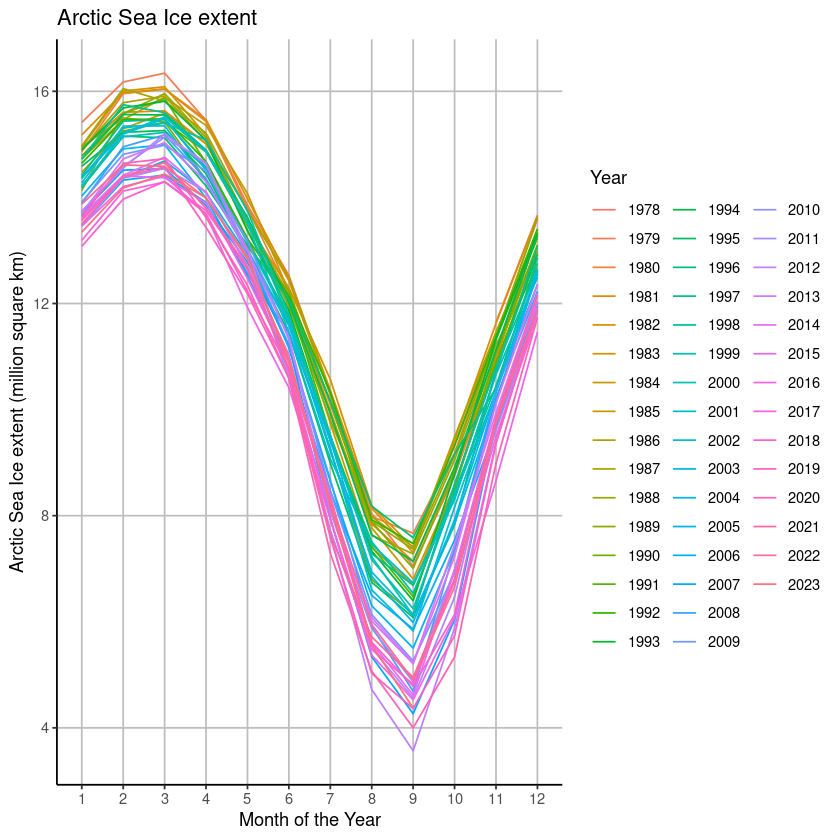

In [321]:
# Create a plot for the ice extent
plot <- ggplot(NH_monthly, aes(x = factor(month(date)), y = extent_NH, group = year)) +
  geom_line(aes(color = factor(year))) +
  labs(x = "Month of the Year", y = "Arctic Sea Ice extent (million square km)", title = "Arctic Sea Ice extent") +
  scale_color_discrete(name = "Year") +
  theme_classic() +
  theme(panel.grid.major = element_line(color = "gray"))

# Display the plot
print(plot)


It is also readable from the figure above that the loss in (after summer) sea ice is bigger than the loss in (after winter) sea ice.  
The lag between the coldest days and maximal Ice extent is clear. The same lag applied between the hottest day and the lowest extent.

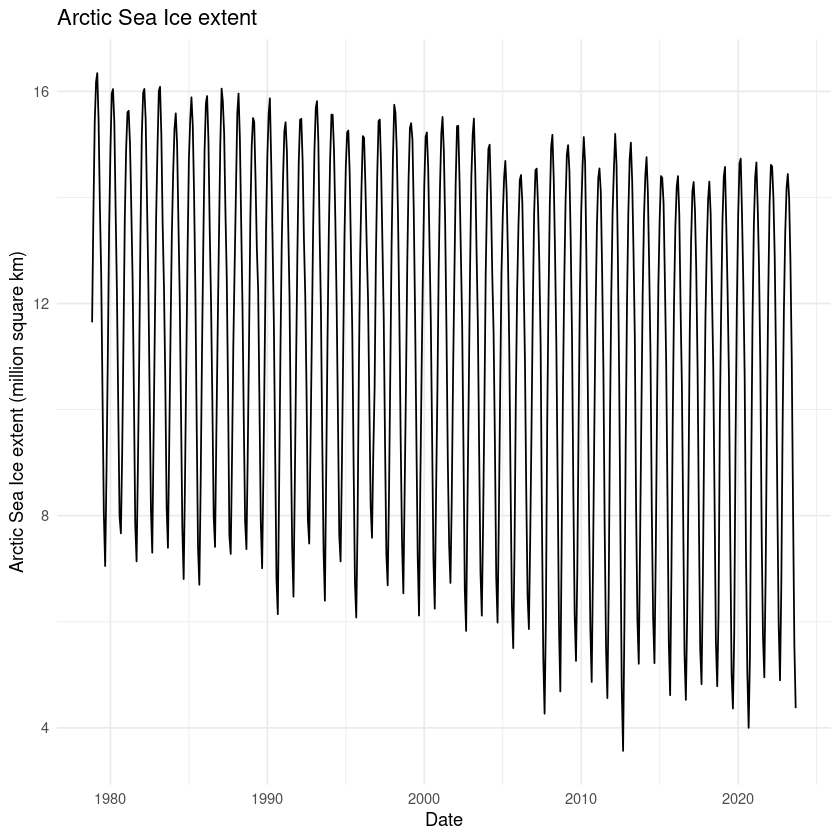

In [322]:
# Create a plot for the ice extent
ggplot(NH_monthly, aes(x = date, y = extent_NH)) +
  geom_line() +
  labs(x = "Date", y = "Arctic Sea Ice extent (million square km)", title = "Arctic Sea Ice extent") + 
  theme_minimal()


### Annual North Hemisphere sea ice ``NH_annual``

In [323]:
# Calculate the annual average value based on NH_monthly
NH_annual <- aggregate(extent_NH ~ year, data = NH_monthly, FUN = mean)

# Convert the year column to date format
NH_annual$date <- as.Date(paste0(NH_annual$year, "-07-1"))

# Remove the first and last year from NH_annual because there are no enough measurments in 1978, and 2023 yet
NH_annual <- NH_annual[-c(1, nrow(NH_annual)), ]

NH_annual

year extent_NH date      
2  1979 12.34958  1979-07-01
3  1980 12.34958  1980-07-01
4  1981 12.14725  1981-07-01
5  1982 12.46733  1982-07-01
6  1983 12.35308  1983-07-01
7  1984 11.92042  1984-07-01
8  1985 12.01592  1985-07-01
9  1986 12.22450  1986-07-01
10 1987 12.20550  1987-07-01
11 1988 12.12158  1988-07-01
12 1989 11.98675  1989-07-01
13 1990 11.71650  1990-07-01
14 1991 11.77025  1991-07-01
15 1992 12.12108  1992-07-01
16 1993 11.94525  1993-07-01
17 1994 12.03217  1994-07-01
18 1995 11.43792  1995-07-01
19 1996 11.85033  1996-07-01
20 1997 11.68983  1997-07-01
21 1998 11.78042  1998-07-01
22 1999 11.71258  1999-07-01
23 2000 11.51883  2000-07-01
24 2001 11.62192  2001-07-01
25 2002 11.38575  2002-07-01
26 2003 11.41908  2003-07-01
27 2004 11.25142  2004-07-01
28 2005 10.92783  2005-07-01
29 2006 10.79400  2006-07-01
30 2007 10.49908  2007-07-01
31 2008 10.99025  2008-07-01
32 2009 10.95567  2009-07-01
33 2010 10.73425  2010-07-01
34 2011 10.50750  2011-07-01
35 2012 10.41925  2012-07-01
36 2013 10.92050  2013-07-01
37 2014 10.81267  2014-07-01
38 2015 10.58858  2015-07-01
39 2016 10.17617  2016-07-01
40 2017 10.41542  2017-07-01
41 2018 10.37792  2018-07-01
42 2019 10.22658  2019-07-01
43 2020 10.16483  2020-07-01
44 2021 10.57500  2021-07-01
45 2022 10.68483  2022-07-01

`geom_smooth()` using formula = 'y ~ x'


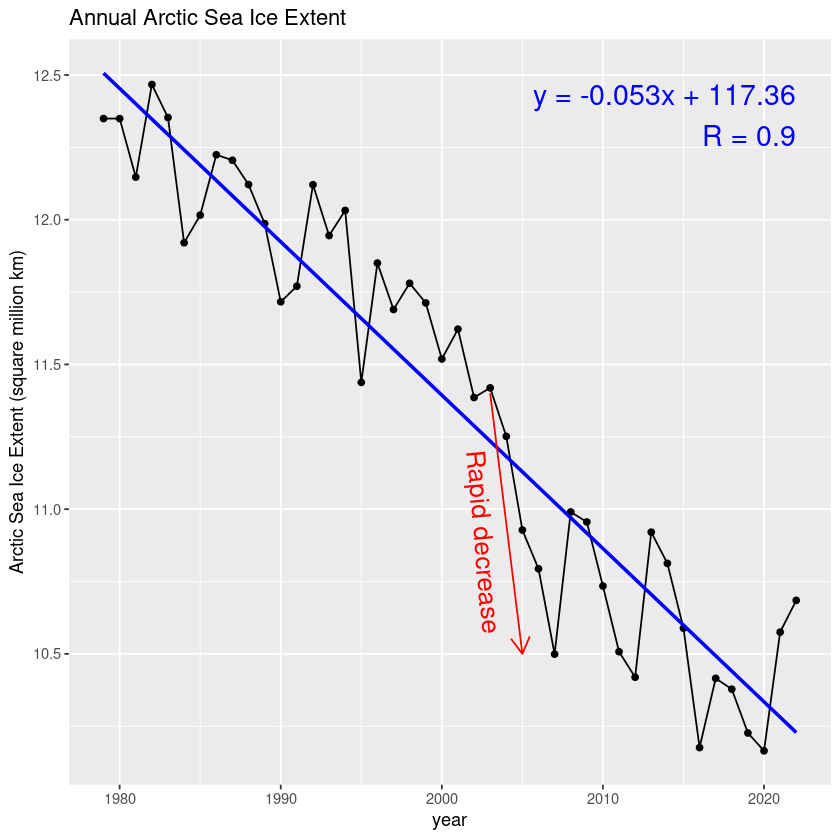

In [324]:
# The linear trend line of Arctic Sea Ice
plot <- ggplot(NH_annual, aes(x = year, y = extent_NH)) +
  geom_line() +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(y = "Arctic Sea Ice Extent (square million km)", title = "Annual Arctic Sea Ice Extent")+
  annotate("segment", x = 2003, xend = 2005, y = 11.4, yend = 10.5, arrow = arrow(length = unit(0.4, "cm")), color = "red") +
  annotate("text", x = 2001.5, y = 11.2, label = "Rapid decrease", hjust = 0, vjust = 0, size = 5.5, color = "red", angle = -85,)

# Calculate linear regression
linear_model <- lm(extent_NH ~ year, data = NH_annual)
r_value <- round(summary(linear_model)$r.squared, 2)

# Add equation and R value to the plot
NH_annual_trend <- plot + annotate("text", x = max(NH_annual$year), y = max(NH_annual$extent_NH),
                        label = paste0("y = ", round(coef(linear_model)[2], 3), "x + ", round(coef(linear_model)[1], 2),
                                       "\nR = ", r_value), hjust = 1, vjust = 1, size=6, color = "blue")


NH_annual_trend

In [325]:
print(paste("The annual trend in Arctic sea ice decrease is", round(1000*coef(linear_model)[2],1), 'thousands square km'))

[1] "The annual trend in Arctic sea ice decrease is -53 thousands square km"


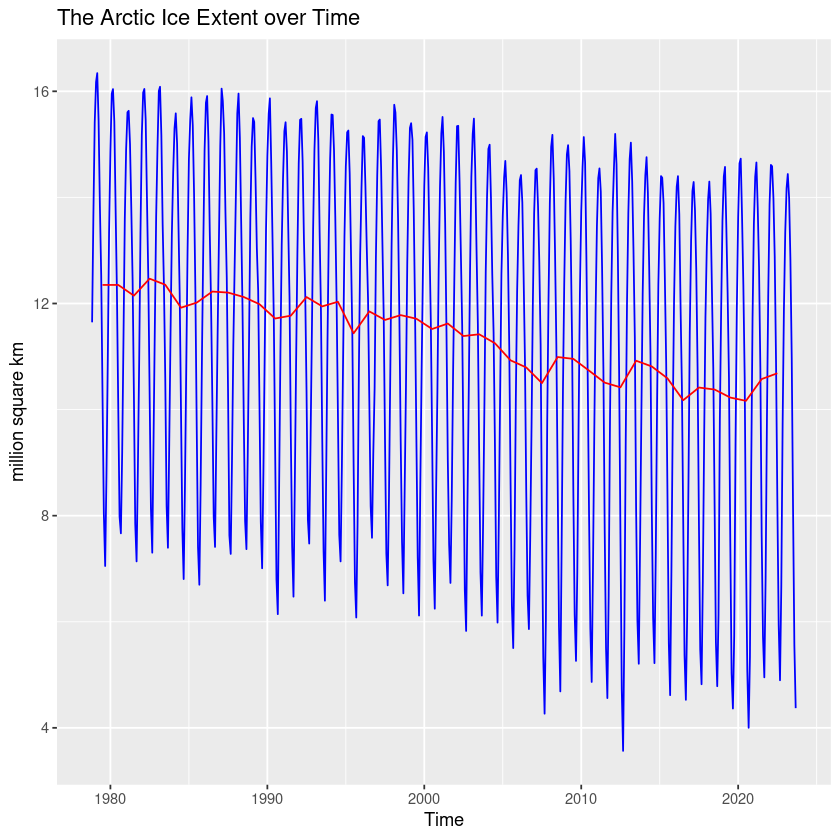

In [326]:
ggplot() +
  geom_line(data = NH_monthly, aes(x = date, y = extent_NH), color = "blue") +
  geom_line(data = NH_annual, aes(x = date, y = extent_NH), color = "red") +
  xlab("Time") +
  ylab("million square km") +
  labs(title = "The Arctic Ice Extent over Time")


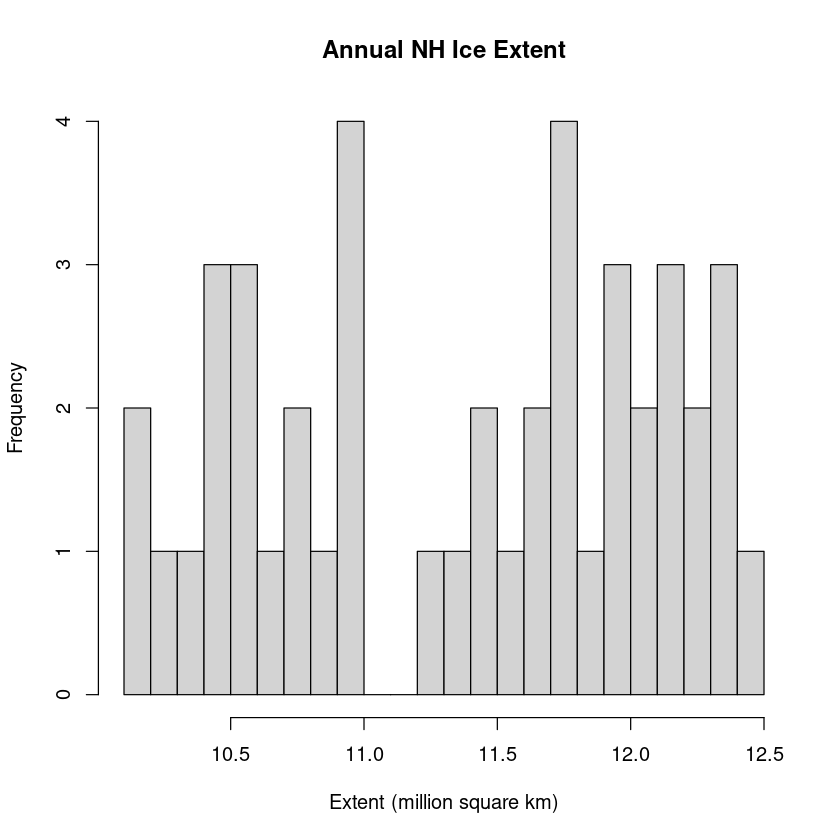

In [328]:
# Make a histogram of the data in NH annual
hist(NH_annual$extent_NH, main = "Annual NH Ice Extent", xlab = "Extent (million square km)", ylab = "Frequency", breaks = 20)

The bimodality is more pronounced in the Annual dataset. But why?   

_Is there is a shift in the system after the 2005?_  Let us invistigate 

In [329]:
summary(NH_annual$extent_NH)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.16   10.72   11.48   11.37   11.99   12.47 

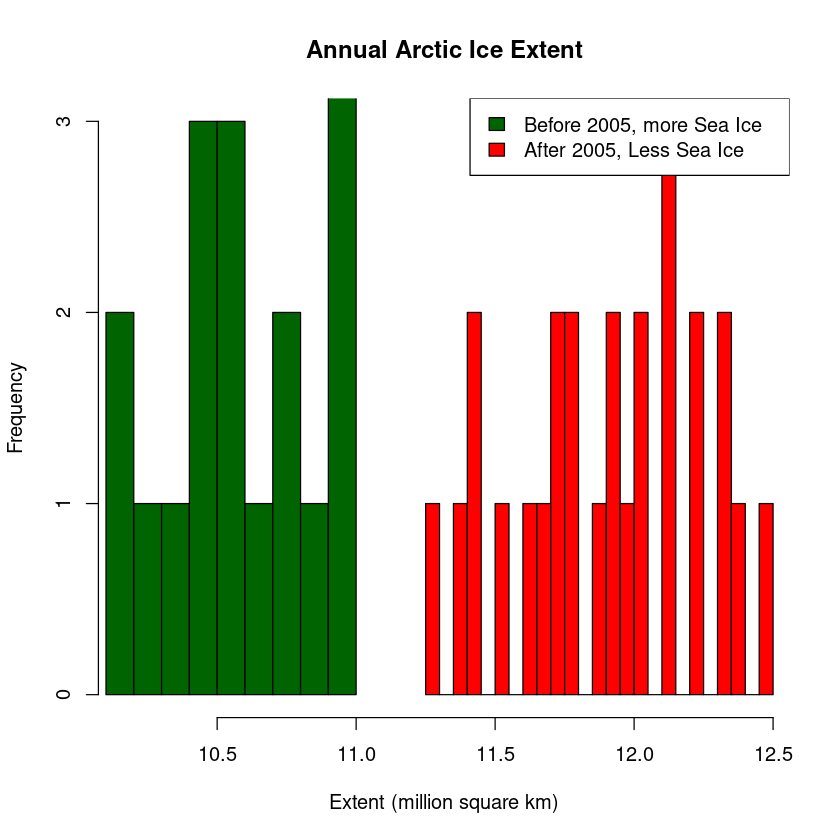

In [330]:
# Create two datasets: one before 2005 and one after
NH_annual_before_2005 <- NH_annual[NH_annual$year < 2005, ]
NH_annual_after_2005 <- NH_annual[NH_annual$year >= 2005, ]

# Get the minimum and maximum values of NH_annual$extent_NH
min_extent <- min(NH_annual$extent_NH)
max_extent <- max(NH_annual$extent_NH)

# Plot the histogram for both datasets on the same figure
hist(NH_annual_before_2005$extent_NH, main = "Annual Arctic Ice Extent", xlab = "Extent (million square km)", ylab = "Frequency", breaks = 20, col = "red", xlim = c(min_extent, max_extent))
hist(NH_annual_after_2005$extent_NH, add = TRUE, col = "darkgreen")

# Add a legend
legend("topright", legend = c("Before 2005, more Sea Ice", "After 2005, Less Sea Ice"), fill = c("darkgreen", "red"))

We could conclude that there is a real shift in the system in ~ 2005

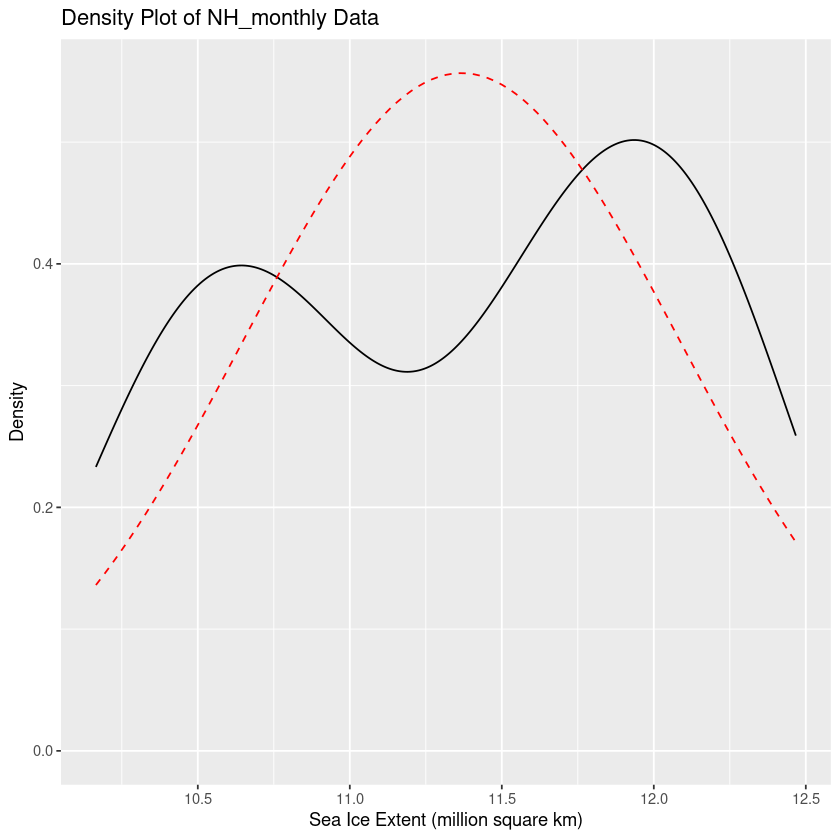

In [331]:
# Overlay the density plot with a normal distribution plot
ggplot(data = NH_annual, aes(x = extent_NH)) +
  geom_density() +
  stat_function(fun = dnorm, args = list(mean = mean(NH_annual$extent_NH), sd = sd(NH_annual$extent_NH)), color = "red", linetype = "dashed") +
  xlab("Sea Ice Extent (million square km)") +
  ylab("Density") +
  labs(title = "Density Plot of NH_monthly Data") +
  # Add legend
  scale_color_manual(values = c("black", "red"), labels = c("Density", "Normal Distribution")) +
  guides(color = guide_legend(title = "Distribution"))

In [332]:
# Although the clear bimodality let us check the normality numerically 

# Run the Shapiro-Wilk test to check if the data is normally distributed
shapiro.test(NH_annual$extent_NH)


	Shapiro-Wilk normality test

data:  NH_annual$extent_NH
W = 0.92732, p-value = 0.008434


The p-value of Shapiro-Wilk test is very low (8e-3), this confirm that the NH_monthly is **not** normally distributed.   
In the next code I will check it as two part (befor and after 2005)

In [333]:
shapiro.test(as.numeric(unlist(NH_annual_before_2005)))


	Shapiro-Wilk normality test

data:  as.numeric(unlist(NH_annual_before_2005))
W = 0.80321, p-value = 8.003e-09


In [334]:
shapiro.test(as.numeric(unlist(NH_annual_after_2005)))


	Shapiro-Wilk normality test

data:  as.numeric(unlist(NH_annual_after_2005))
W = 0.72485, p-value = 9.811e-09


We conclude that the NH_monthly is **not** normally distributed nor its components (before and after) 2005

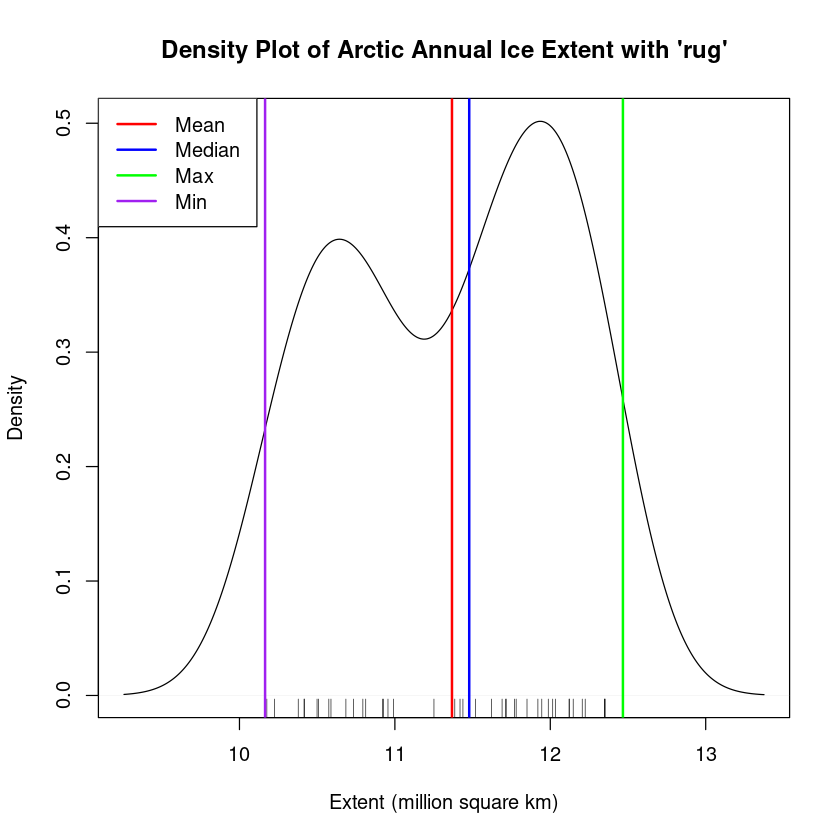

In [335]:
# Create a density plot of the z values with rug jitter for NH_annual$extent_NH
plot(density(NH_annual$extent_NH), main = "Density Plot of Arctic Annual Ice Extent with 'rug'", xlab = "Extent (million square km)", ylab = "Density")
rug(jitter(NH_annual$extent_NH))

# Add mean, median, max, and min as vertical lines
abline(v = mean(NH_annual$extent_NH), col = "red", lwd = 2)
abline(v = median(NH_annual$extent_NH), col = "blue", lwd = 2)
abline(v = max(NH_annual$extent_NH), col = "green", lwd = 2)
abline(v = min(NH_annual$extent_NH), col = "purple", lwd = 2)
# There is no mode value because all numeric values are unique 

# Add legend
legend("topleft", legend = c("Mean", "Median", "Max", "Min"), col = c("red", "blue", "green", "purple"), lwd = 2)

In [336]:
# Summary statistics of NH_annual extent
summary(NH_annual$extent_NH)

# The variance of NH_annual extent
cat("The variance is:", round(var(NH_annual$extent_NH), 1), "million (km to the Fourth power)", "\n")

# The standard deviation of NH_annual extent
cat("Standard Deviation:", round(sd(NH_annual$extent_NH), 1), "(million square km)", "\n")

# The range of NH_annual extent
cat("The data range is:", round((range(NH_annual$extent_NH)[2] - range(NH_annual$extent_NH)[1]), 1), "(million square km)", "\n")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.16   10.72   11.48   11.37   11.99   12.47 

The variance is: 0.5 million (km to the Fourth power) 
Standard Deviation: 0.7 (million square km) 
The data range is: 2.3 (million square km) 


If we compare the previous statistical overview with the one from monthly, we could notice the effect of average in lowering the variation in the values.The exception is the mean which is the same.    I will add the value from the monthly data below again;   

   Min.  	1st Qu.  	Median    	Mean 	3rd Qu.    	Max.   
   
  3.56   	8.54  		12.08  		11.36  	14.28  		16.34   
  
The variance is: 10.7 million (km to the Fourth power)   

Standard Deviation: 3.3 (million square km)   

The data range is: 12.8 (million square km)   



In [337]:
#          🌊☀️🌊☀️🌊☀️🌊☀️🌊☀️🌊☀️    Importing SST    🌊☀️🌊☀️🌊☀️🌊☀️🌊☀️🌊☀️

In the next code I will import the Sea Surface Temperature SST for the area _near_ the Arctic. With _near_ I meant focal windows along the coast with side lenght of 4.25 degrees.

In [338]:
# # I extracted the SST for both Arctic and Anarctic then saved the resulted time_series on GitHub

# # Instead of repeating the extraction of the file and adding extra two giga of files inside this
# #notebook, I will use the resulted file only from GitHub
# # https://raw.githubusercontent.com/alatieh/Statistics-of-the-Sea-Ice/

# # So, this part of the code just to keep the code recipe that I learned from the teacher to extract the data


# library(terra)
# library(ncdf4)
# library(tidyverse)
# # The dataset is the monthly from from NOAA,direct link is
# # https://downloads.psl.noaa.gov/Datasets/noaa.oisst.v2.highres/sst.mon.mean.nc
# # Under the group of
# # https://downloads.psl.noaa.gov/Datasets/noaa.oisst.v2.highres/
# # under
# # https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html

# # Coverage
# # Monthly values from 1981/09 to 2023/10
# # Spatial Coverage
# # 0.25 degree latitude x 0.25 degree longitude global grid (1440x720)
# # 89.875S - 89.875N,0.125E to 359.875E

# ncpath <-  "C:\\Users\\........\\"

# sst = rast(file.path(ncpath, 'sst.mon.mean.nc'))

# crop_extent = ext(0, 360, -90, -57)# -90 to -40
# sst_ant = crop(sst, crop_extent)

# near_coast = focal(is.na(sst_ant[[1]]), w=15, mean)# the parameter (w) give how many pixels, 15 pixels
# near_coast = ifel(is.na(sst_ant[[1]]), 1, near_coast)
# near_coast = ifel(near_coast > 0 & near_coast < 1, 1, NA)

# # mask orig raster
# sst_ant_masked = sst_ant * near_coast
# monthly_mean_only15pixels = global(sst_ant_masked , mean, na.rm=T)

# dates = terra::time(sst)

# monthly_stat = tibble(
#   date = dates,
#   sst_ant = monthly_mean_only15pixels$mean
# )


# plot((sst_ant_masked)[[1]])
# # plot(near_coast)


# ggplot(monthly_stat, aes(x = date, y = sst_ant)) +
#   geom_line() +
#   geom_point() +
#   labs(y = "degree C ", title="SST Antarctica")



In [339]:
# we will make a shorter NH_monthly with the same length as our sst data
# This shorter version of NH_monthly will have the name NH_monthly_sst
# Then we will add the sst as a column in this NH_monthly_sst
NH_monthly_sst <- NH_monthly[35:nrow(NH_monthly), ]

NH_monthly_sst

year date       extent_NH z_value     decimal_date
1   1981 1981-09-01  7.138    -1.29387035 1981.668    
2   1981 1981-10-01  8.856    -0.76786502 1981.751    
3   1981 1981-11-01 10.929    -0.13316824 1981.836    
4   1981 1981-12-01 13.341     0.60532120 1981.918    
5   1982 1982-01-01 15.177     1.16745496 1982.003    
6   1982 1982-02-01 15.974     1.41147489 1982.088    
7   1982 1982-03-01 16.044     1.43290701 1982.164    
8   1982 1982-04-01 15.466     1.25593897 1982.249    
9   1982 1982-05-01 13.973     0.79882258 1982.332    
10  1982 1982-06-01 12.476     0.34048149 1982.416    
11  1982 1982-07-01 10.367    -0.30523751 1982.499    
12  1982 1982-08-01  8.139    -0.98739111 1982.584    
13  1982 1982-09-01  7.302    -1.24365797 1982.668    
14  1982 1982-10-01  9.421    -0.59487723 1982.751    
15  1982 1982-11-01 11.627     0.08054056 1982.836    
16  1982 1982-12-01 13.642     0.69747929 1982.918    
17  1983 1983-01-01 14.942     1.09550428 1983.003    
18  1983 1983-02-01 16.006     1.42127243 1983.088    
19  1983 1983-03-01 16.085     1.44546010 1983.164    
20  1983 1983-04-01 15.172     1.16592409 1983.249    
21  1983 1983-05-01 13.491     0.65124716 1983.332    
22  1983 1983-06-01 12.296     0.28537034 1983.416    
23  1983 1983-07-01 10.570    -0.24308438 1983.499    
24  1983 1983-08-01  8.186    -0.97300097 1983.584    
25  1983 1983-09-01  7.395    -1.21518387 1983.668    
26  1983 1983-10-01  9.334    -0.62151429 1983.751    
27  1983 1983-11-01 11.461     0.02971583 1983.836    
28  1983 1983-12-01 13.299     0.59246193 1983.918    
29  1984 1984-01-01 14.473     0.95190911 1984.003    
30  1984 1984-02-01 15.299     1.20480807 1984.088    
⋮   ⋮    ⋮          ⋮         ⋮           ⋮           
476 2021 2021-04-01 13.792     0.7434053  2021.249    
477 2021 2021-05-01 12.682     0.4035531  2021.332    
478 2021 2021-06-01 10.765    -0.1833806  2021.416    
479 2021 2021-07-01  7.647    -1.1380283  2021.499    
480 2021 2021-08-01  5.715    -1.7295546  2021.584    
481 2021 2021-09-01  4.952    -1.9631647  2021.668    
482 2021 2021-10-01  6.816    -1.3924581  2021.751    
483 2021 2021-11-01  9.830    -0.4696524  2021.836    
484 2021 2021-12-01 12.152     0.2412814  2021.918    
485 2022 2022-01-01 13.872     0.7678991  2022.003    
486 2022 2022-02-01 14.612     0.9944672  2022.088    
487 2022 2022-03-01 14.586     0.9865067  2022.164    
488 2022 2022-04-01 13.986     0.8028028  2022.249    
489 2022 2022-05-01 12.879     0.4638692  2022.332    
490 2022 2022-06-01 10.875    -0.1497016  2022.416    
491 2022 2022-07-01  8.287    -0.9420775  2022.499    
492 2022 2022-08-01  5.950    -1.6576040  2022.584    
493 2022 2022-09-01  4.897    -1.9800042  2022.668    
494 2022 2022-10-01  6.657    -1.4411396  2022.751    
495 2022 2022-11-01  9.725    -0.5018006  2022.836    
496 2022 2022-12-01 11.892     0.1616764  2022.918    
497 2023 2023-01-01 13.346     0.6068521  2023.003    
498 2023 2023-02-01 14.176     0.8609757  2023.088    
499 2023 2023-03-01 14.440     0.9418054  2023.164    
500 2023 2023-04-01 13.992     0.8046399  2023.249    
501 2023 2023-05-01 12.835     0.4503976  2023.332    
502 2023 2023-06-01 10.963    -0.1227584  2023.416    
503 2023 2023-07-01  8.183    -0.9739195  2023.499    
504 2023 2023-08-01  5.566    -1.7751744  2023.584    
505 2023 2023-09-01  4.371    -2.1410512  2023.668

In [340]:
# we will make a shorter NH_annual with the same length as our sst data
# This shorter version of NH_annual will have the name NH_annual_sst
# Then we will add the sst as a column in this NH_annual_sst
NH_annual_sst <- NH_annual[4:nrow(NH_annual), ]

NH_annual_sst

year extent_NH date      
5  1982 12.46733  1982-07-01
6  1983 12.35308  1983-07-01
7  1984 11.92042  1984-07-01
8  1985 12.01592  1985-07-01
9  1986 12.22450  1986-07-01
10 1987 12.20550  1987-07-01
11 1988 12.12158  1988-07-01
12 1989 11.98675  1989-07-01
13 1990 11.71650  1990-07-01
14 1991 11.77025  1991-07-01
15 1992 12.12108  1992-07-01
16 1993 11.94525  1993-07-01
17 1994 12.03217  1994-07-01
18 1995 11.43792  1995-07-01
19 1996 11.85033  1996-07-01
20 1997 11.68983  1997-07-01
21 1998 11.78042  1998-07-01
22 1999 11.71258  1999-07-01
23 2000 11.51883  2000-07-01
24 2001 11.62192  2001-07-01
25 2002 11.38575  2002-07-01
26 2003 11.41908  2003-07-01
27 2004 11.25142  2004-07-01
28 2005 10.92783  2005-07-01
29 2006 10.79400  2006-07-01
30 2007 10.49908  2007-07-01
31 2008 10.99025  2008-07-01
32 2009 10.95567  2009-07-01
33 2010 10.73425  2010-07-01
34 2011 10.50750  2011-07-01
35 2012 10.41925  2012-07-01
36 2013 10.92050  2013-07-01
37 2014 10.81267  2014-07-01
38 2015 10.58858  2015-07-01
39 2016 10.17617  2016-07-01
40 2017 10.41542  2017-07-01
41 2018 10.37792  2018-07-01
42 2019 10.22658  2019-07-01
43 2020 10.16483  2020-07-01
44 2021 10.57500  2021-07-01
45 2022 10.68483  2022-07-01

In [341]:
# Import and read the Arctic Sea Surface Temperature SST
sst_arc <- read.csv("https://raw.githubusercontent.com/alatieh/Statistics-of-the-Sea-Ice/main/data/sst_arc.csv"
					#,  colClasses = c("date" = "Date")
				   )

# Using 'colClasses = c("date" = "Date")'  inside the readcsv() is easier than the following code
sst_arc$date <- as.Date(sst_arc$date, format = "%Y-%m-%d")
# nevertheless, this can be handy if the date format is not the standard "YYYY-MM-DD"

sst_arc

# Check for missing values in sst_arc
anyNA(sst_arc$sst_arc)

# Calculate statistical indexes of sst_arc
summary(sst_arc$sst_arc)

date       sst_arc   
1   1981-09-01  0.9057479
2   1981-10-01 -0.1724705
3   1981-11-01 -0.8573207
4   1981-12-01 -1.1805374
5   1982-01-01 -1.3315989
6   1982-02-01 -1.3553057
7   1982-03-01 -1.3452516
8   1982-04-01 -1.3099027
9   1982-05-01 -1.1546259
10  1982-06-01 -0.5401355
11  1982-07-01  0.8054338
12  1982-08-01  1.3049400
13  1982-09-01  0.7727350
14  1982-10-01 -0.3793249
15  1982-11-01 -0.9651271
16  1982-12-01 -1.1385630
17  1983-01-01 -1.2191543
18  1983-02-01 -1.2762629
19  1983-03-01 -1.2762488
20  1983-04-01 -1.2736020
21  1983-05-01 -1.0796683
22  1983-06-01 -0.4347122
23  1983-07-01  0.7030480
24  1983-08-01  1.4815788
25  1983-09-01  1.1064197
26  1983-10-01 -0.2238870
27  1983-11-01 -0.9403256
28  1983-12-01 -1.1595782
29  1984-01-01 -1.2524839
30  1984-02-01 -1.2312620
⋮   ⋮          ⋮         
476 2021-04-01 -1.1799526
477 2021-05-01 -1.0790399
478 2021-06-01 -0.4581125
479 2021-07-01  0.9146274
480 2021-08-01  2.4190073
481 2021-09-01  1.7373442
482 2021-10-01  0.3699126
483 2021-11-01 -0.6070801
484 2021-12-01 -0.9551311
485 2022-01-01 -1.0872899
486 2022-02-01 -1.1560949
487 2022-03-01 -1.1600575
488 2022-04-01 -1.1876324
489 2022-05-01 -1.0773167
490 2022-06-01 -0.4451276
491 2022-07-01  1.2420922
492 2022-08-01  2.8915974
493 2022-09-01  2.0297221
494 2022-10-01  0.4003727
495 2022-11-01 -0.4643764
496 2022-12-01 -0.7856340
497 2023-01-01 -0.9691502
498 2023-02-01 -0.9867590
499 2023-03-01 -1.1192482
500 2023-04-01 -1.1483207
501 2023-05-01 -0.9865511
502 2023-06-01 -0.4390923
503 2023-07-01  1.3164994
504 2023-08-01  3.2007806
505 2023-09-01  2.3808897

[1] FALSE

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.3791 -1.1582 -0.8522 -0.2362  0.7328  3.3196 

In [342]:
# Add the values of sst_arc$sst_arc as a new column in NH_monthly_sst
NH_monthly_sst$sst_arc <- sst_arc$sst_arc

NH_monthly_sst

year date       extent_NH z_value     decimal_date sst_arc   
1   1981 1981-09-01  7.138    -1.29387035 1981.668      0.9057479
2   1981 1981-10-01  8.856    -0.76786502 1981.751     -0.1724705
3   1981 1981-11-01 10.929    -0.13316824 1981.836     -0.8573207
4   1981 1981-12-01 13.341     0.60532120 1981.918     -1.1805374
5   1982 1982-01-01 15.177     1.16745496 1982.003     -1.3315989
6   1982 1982-02-01 15.974     1.41147489 1982.088     -1.3553057
7   1982 1982-03-01 16.044     1.43290701 1982.164     -1.3452516
8   1982 1982-04-01 15.466     1.25593897 1982.249     -1.3099027
9   1982 1982-05-01 13.973     0.79882258 1982.332     -1.1546259
10  1982 1982-06-01 12.476     0.34048149 1982.416     -0.5401355
11  1982 1982-07-01 10.367    -0.30523751 1982.499      0.8054338
12  1982 1982-08-01  8.139    -0.98739111 1982.584      1.3049400
13  1982 1982-09-01  7.302    -1.24365797 1982.668      0.7727350
14  1982 1982-10-01  9.421    -0.59487723 1982.751     -0.3793249
15  1982 1982-11-01 11.627     0.08054056 1982.836     -0.9651271
16  1982 1982-12-01 13.642     0.69747929 1982.918     -1.1385630
17  1983 1983-01-01 14.942     1.09550428 1983.003     -1.2191543
18  1983 1983-02-01 16.006     1.42127243 1983.088     -1.2762629
19  1983 1983-03-01 16.085     1.44546010 1983.164     -1.2762488
20  1983 1983-04-01 15.172     1.16592409 1983.249     -1.2736020
21  1983 1983-05-01 13.491     0.65124716 1983.332     -1.0796683
22  1983 1983-06-01 12.296     0.28537034 1983.416     -0.4347122
23  1983 1983-07-01 10.570    -0.24308438 1983.499      0.7030480
24  1983 1983-08-01  8.186    -0.97300097 1983.584      1.4815788
25  1983 1983-09-01  7.395    -1.21518387 1983.668      1.1064197
26  1983 1983-10-01  9.334    -0.62151429 1983.751     -0.2238870
27  1983 1983-11-01 11.461     0.02971583 1983.836     -0.9403256
28  1983 1983-12-01 13.299     0.59246193 1983.918     -1.1595782
29  1984 1984-01-01 14.473     0.95190911 1984.003     -1.2524839
30  1984 1984-02-01 15.299     1.20480807 1984.088     -1.2312620
⋮   ⋮    ⋮          ⋮         ⋮           ⋮            ⋮         
476 2021 2021-04-01 13.792     0.7434053  2021.249     -1.1799526
477 2021 2021-05-01 12.682     0.4035531  2021.332     -1.0790399
478 2021 2021-06-01 10.765    -0.1833806  2021.416     -0.4581125
479 2021 2021-07-01  7.647    -1.1380283  2021.499      0.9146274
480 2021 2021-08-01  5.715    -1.7295546  2021.584      2.4190073
481 2021 2021-09-01  4.952    -1.9631647  2021.668      1.7373442
482 2021 2021-10-01  6.816    -1.3924581  2021.751      0.3699126
483 2021 2021-11-01  9.830    -0.4696524  2021.836     -0.6070801
484 2021 2021-12-01 12.152     0.2412814  2021.918     -0.9551311
485 2022 2022-01-01 13.872     0.7678991  2022.003     -1.0872899
486 2022 2022-02-01 14.612     0.9944672  2022.088     -1.1560949
487 2022 2022-03-01 14.586     0.9865067  2022.164     -1.1600575
488 2022 2022-04-01 13.986     0.8028028  2022.249     -1.1876324
489 2022 2022-05-01 12.879     0.4638692  2022.332     -1.0773167
490 2022 2022-06-01 10.875    -0.1497016  2022.416     -0.4451276
491 2022 2022-07-01  8.287    -0.9420775  2022.499      1.2420922
492 2022 2022-08-01  5.950    -1.6576040  2022.584      2.8915974
493 2022 2022-09-01  4.897    -1.9800042  2022.668      2.0297221
494 2022 2022-10-01  6.657    -1.4411396  2022.751      0.4003727
495 2022 2022-11-01  9.725    -0.5018006  2022.836     -0.4643764
496 2022 2022-12-01 11.892     0.1616764  2022.918     -0.7856340
497 2023 2023-01-01 13.346     0.6068521  2023.003     -0.9691502
498 2023 2023-02-01 14.176     0.8609757  2023.088     -0.9867590
499 2023 2023-03-01 14.440     0.9418054  2023.164     -1.1192482
500 2023 2023-04-01 13.992     0.8046399  2023.249     -1.1483207
501 2023 2023-05-01 12.835     0.4503976  2023.332     -0.9865511
502 2023 2023-06-01 10.963    -0.1227584  2023.416     -0.4390923
503 2023 2023-07-01  8.183    -0.9739195  2023.499      1.3164994
504 2023 2023-08-01  5.566    -1.7751744  20

In [343]:
# Calculate annual average of sst_arc
sst_arc_annual <- aggregate(sst_arc$sst_arc, by = list(year = format(sst_arc$date, "%Y")), FUN = mean)

# Change the column name 'x' to 'sst_arc_annual'
colnames(sst_arc_annual)[2] <- "sst_arc_annual"

# Delete the first and last year of sst_arc_annual because there is no complete measurement for the year
sst_arc_annual <- sst_arc_annual[-1, ]
sst_arc_annual <- sst_arc_annual[-nrow(sst_arc_annual), ]

# Parse the column name 'year' as a date
sst_arc_annual$year <- as.Date(paste0(sst_arc_annual$year, "-07-1"))

sst_arc_annual

year       sst_arc_annual
2  1982-07-01 -0.55306055   
3  1983-07-01 -0.46603273   
4  1984-07-01 -0.33941821   
5  1985-07-01 -0.34065558   
6  1986-07-01 -0.50479012   
7  1987-07-01 -0.47198770   
8  1988-07-01 -0.43289781   
9  1989-07-01 -0.41394501   
10 1990-07-01 -0.26127003   
11 1991-07-01 -0.31029158   
12 1992-07-01 -0.45482639   
13 1993-07-01 -0.36795949   
14 1994-07-01 -0.40790922   
15 1995-07-01 -0.20347685   
16 1996-07-01 -0.53049767   
17 1997-07-01 -0.45064396   
18 1998-07-01 -0.45362259   
19 1999-07-01 -0.45493883   
20 2000-07-01 -0.28738533   
21 2001-07-01 -0.35861428   
22 2002-07-01 -0.34912981   
23 2003-07-01 -0.27092160   
24 2004-07-01 -0.32523304   
25 2005-07-01 -0.15416811   
26 2006-07-01 -0.22053682   
27 2007-07-01  0.04649449   
28 2008-07-01 -0.15481642   
29 2009-07-01 -0.20887188   
30 2010-07-01 -0.20532724   
31 2011-07-01 -0.03309658   
32 2012-07-01  0.19220049   
33 2013-07-01 -0.00377481   
34 2014-07-01 -0.02989228   
35 2015-07-01  0.08715379   
36 2016-07-01  0.21551214   
37 2017-07-01 -0.10557289   
38 2018-07-01 -0.15933131   
39 2019-07-01 -0.05526413   
40 2020-07-01  0.11657934   
41 2021-07-01 -0.18465823   
42 2022-07-01 -0.06664541

In [344]:
# Add the values of sst_arc_annual$sst_arc_annual as a new column in NH_annual_sst
NH_annual_sst$sst_arc_annual <- sst_arc_annual$sst_arc_annual

NH_annual_sst

year extent_NH date       sst_arc_annual
5  1982 12.46733  1982-07-01 -0.55306055   
6  1983 12.35308  1983-07-01 -0.46603273   
7  1984 11.92042  1984-07-01 -0.33941821   
8  1985 12.01592  1985-07-01 -0.34065558   
9  1986 12.22450  1986-07-01 -0.50479012   
10 1987 12.20550  1987-07-01 -0.47198770   
11 1988 12.12158  1988-07-01 -0.43289781   
12 1989 11.98675  1989-07-01 -0.41394501   
13 1990 11.71650  1990-07-01 -0.26127003   
14 1991 11.77025  1991-07-01 -0.31029158   
15 1992 12.12108  1992-07-01 -0.45482639   
16 1993 11.94525  1993-07-01 -0.36795949   
17 1994 12.03217  1994-07-01 -0.40790922   
18 1995 11.43792  1995-07-01 -0.20347685   
19 1996 11.85033  1996-07-01 -0.53049767   
20 1997 11.68983  1997-07-01 -0.45064396   
21 1998 11.78042  1998-07-01 -0.45362259   
22 1999 11.71258  1999-07-01 -0.45493883   
23 2000 11.51883  2000-07-01 -0.28738533   
24 2001 11.62192  2001-07-01 -0.35861428   
25 2002 11.38575  2002-07-01 -0.34912981   
26 2003 11.41908  2003-07-01 -0.27092160   
27 2004 11.25142  2004-07-01 -0.32523304   
28 2005 10.92783  2005-07-01 -0.15416811   
29 2006 10.79400  2006-07-01 -0.22053682   
30 2007 10.49908  2007-07-01  0.04649449   
31 2008 10.99025  2008-07-01 -0.15481642   
32 2009 10.95567  2009-07-01 -0.20887188   
33 2010 10.73425  2010-07-01 -0.20532724   
34 2011 10.50750  2011-07-01 -0.03309658   
35 2012 10.41925  2012-07-01  0.19220049   
36 2013 10.92050  2013-07-01 -0.00377481   
37 2014 10.81267  2014-07-01 -0.02989228   
38 2015 10.58858  2015-07-01  0.08715379   
39 2016 10.17617  2016-07-01  0.21551214   
40 2017 10.41542  2017-07-01 -0.10557289   
41 2018 10.37792  2018-07-01 -0.15933131   
42 2019 10.22658  2019-07-01 -0.05526413   
43 2020 10.16483  2020-07-01  0.11657934   
44 2021 10.57500  2021-07-01 -0.18465823   
45 2022 10.68483  2022-07-01 -0.06664541

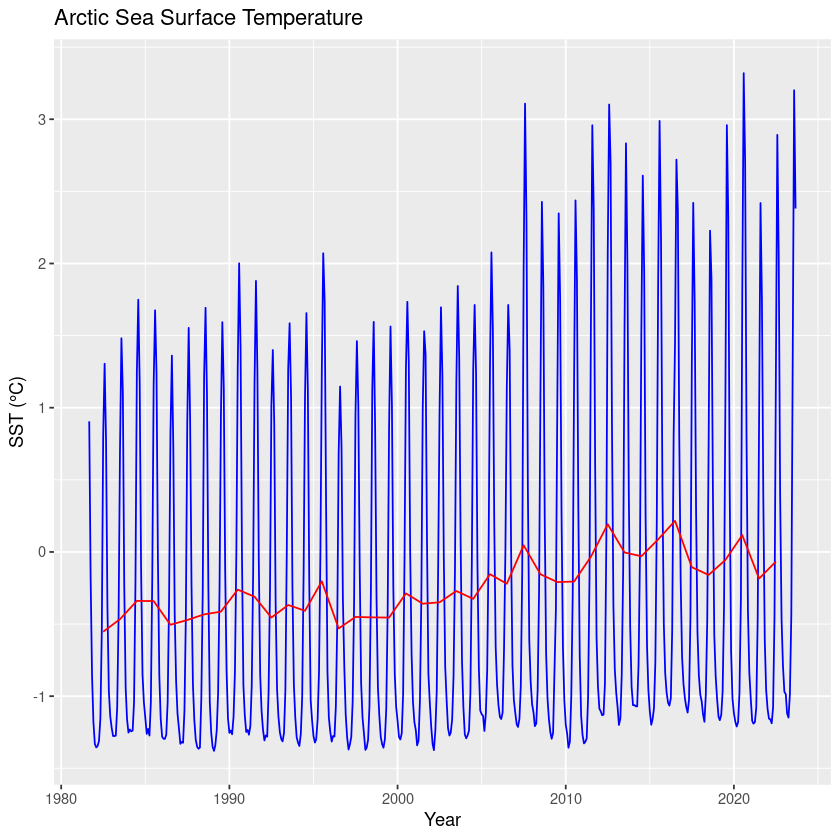

In [345]:
ggplot() +
  geom_line(data = NH_monthly_sst, aes(x = date, y = sst_arc), color = "blue") +
  geom_line(data = NH_annual_sst, aes(x = date, y = sst_arc_annual), color = "red") +
  xlab("Year") +
  ylab("SST (°C)") +
  labs(title = "Arctic Sea Surface Temperature") +
  scale_color_manual(values = c("blue", "red"), labels = c("Monthly SST", "Annual SST"))

`geom_smooth()` using formula = 'y ~ x'


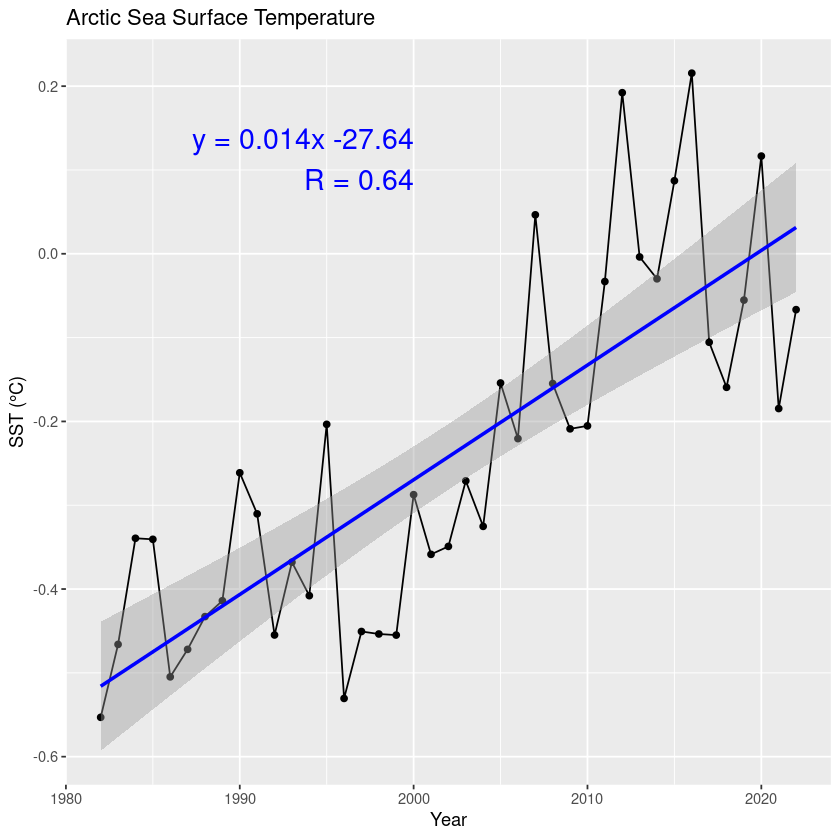

In [346]:
# The linear trend line of Arctic Sea Ice
plot <- ggplot(NH_annual_sst, aes(x = year, y = sst_arc_annual)) +
  geom_line() +
  geom_point() +
  geom_smooth(method = "lm", se = TRUE, color = "blue") +
#  use se = FALSE for no shaded confidence interval
#  se = TRUE include a shaded confidence interval, the default confidence level for the confidence interval is 95%
#  You can change the confidence level by specifying the level argument when using geom_smooth. For example, 
#  geom_smooth(method = "lm", se = TRUE, level = 0.90)
  labs(y = "SST (°C)",x='Year', title = "Arctic Sea Surface Temperature")


# Calculate linear regression
linear_model <- lm(sst_arc_annual ~ year, data = NH_annual_sst)
r_value <- round(summary(linear_model)$r.squared, 2)

# Add equation and R value to the plot
NH_annual_trend <- plot + annotate("text", x = 2000, y = 0.15,
                        label = paste0("y = ", round(coef(linear_model)[2], 3), "x ", round(coef(linear_model)[1], 2),
                                       "\nR = ", r_value), hjust = 1, vjust = 1, size=6, color = "blue")


NH_annual_trend

In [347]:
summary(linear_model)


Call:
lm(formula = sst_arc_annual ~ year, data = NH_annual_sst)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.20611 -0.07570 -0.02443  0.08602  0.29763 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -27.63940    3.28339  -8.418 2.65e-10 ***
year          0.01368    0.00164   8.344 3.31e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1243 on 39 degrees of freedom
Multiple R-squared:  0.641,	Adjusted R-squared:  0.6318 
F-statistic: 69.63 on 1 and 39 DF,  p-value: 3.307e-10


In [348]:
linear_model$coefficients

(Intercept)         year 
-27.63940390   0.01368488

In [349]:
# Check which year the average temperature will be zero
round(-linear_model$coefficients[1] / linear_model$coefficients[2])

(Intercept) 
       2020

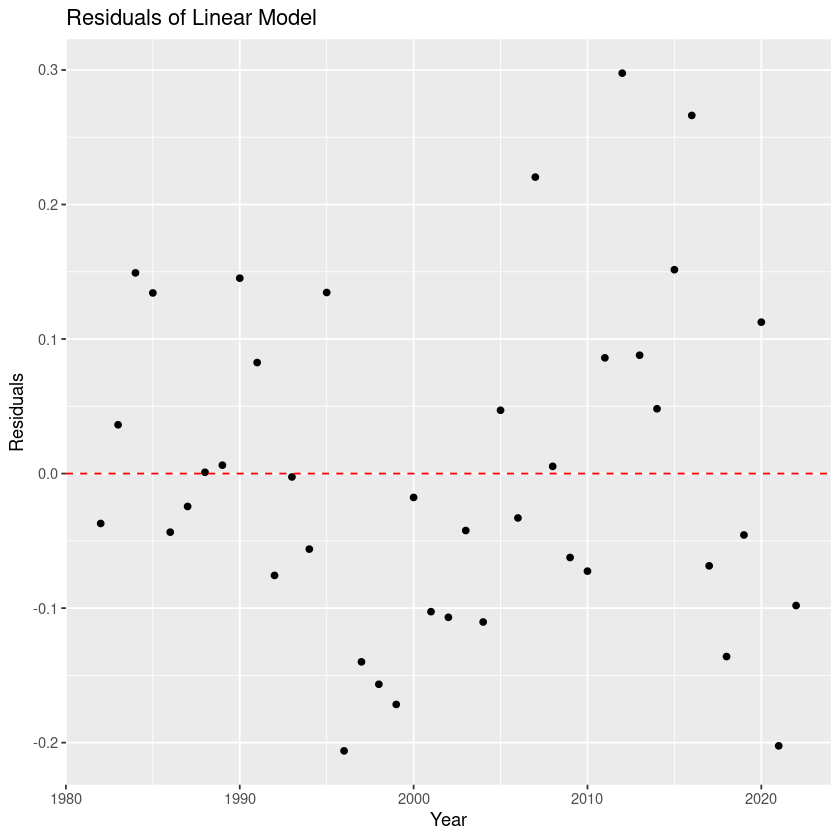

In [350]:
# Plotting the residuals of linear_model
residuals <- linear_model$residuals

plot_resid <- ggplot() +
  geom_point(aes(x = NH_annual_sst$year, y = residuals)) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  labs(y = "Residuals", x = "Year", title = "Residuals of Linear Model")

plot_resid

`geom_smooth()` using formula = 'y ~ x'


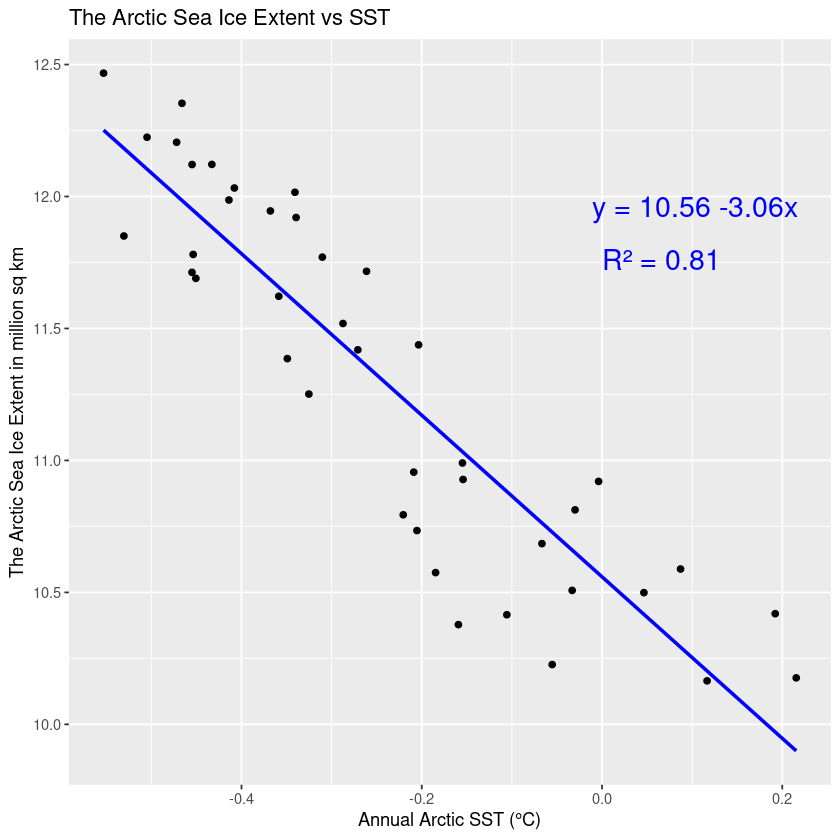

In [445]:
# linear regression line
linear_model_sst_ice <- lm(extent_NH ~ sst_arc_annual, data = NH_annual_sst)

ggplot(NH_annual_sst, aes(x = sst_arc_annual, y = extent_NH)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(x = "Annual Arctic SST (°C)", y = "The Arctic Sea Ice Extent in million sq km", title = "The Arctic Sea Ice Extent vs SST") +
  annotate("text", color = "blue", x = -0.02, y =12, 
           label = paste0(" y = ", round(linear_model$coefficients[1], 2), " ", round(linear_model$coefficients[2], 2), "x"), 
           hjust = 0, vjust = 1, size =6) +
  annotate("text", color = "blue", x = 0, y = 11.8, 
           label = paste0("R² = ", round(summary(linear_model)$r.squared, 2)), 
           hjust = 0, vjust = 1, size =6)

R² value of 0.81 indicates that approximately 81% of the variability in 'extent_NH' can be explained by 'sst_arc_annual'

In [359]:
# correlation between Arctic Sea Ice Extent and Arctic Sea Surface Temperature
correlation <- cor(NH_annual_sst$extent_NH, NH_annual_sst$sst_arc_annual)

# The correlation coefficient  value
correlation

[1] -0.9005379

The correlation coefficient of approximately -0.901 means there is a strong negative linear relationship between 'extent_NH' and 'sst_arc_annual'


Autocorrelations of series ‘X’, by lag

   -13    -12    -11    -10     -9     -8     -7     -6     -5     -4     -3 
-0.117 -0.193 -0.249 -0.369 -0.391 -0.405 -0.448 -0.530 -0.636 -0.679 -0.657 
    -2     -1      0      1      2      3      4      5      6      7      8 
-0.687 -0.765 -0.901 -0.745 -0.696 -0.657 -0.675 -0.624 -0.509 -0.419 -0.309 
     9     10     11     12     13 
-0.257 -0.202 -0.119 -0.074  0.016 

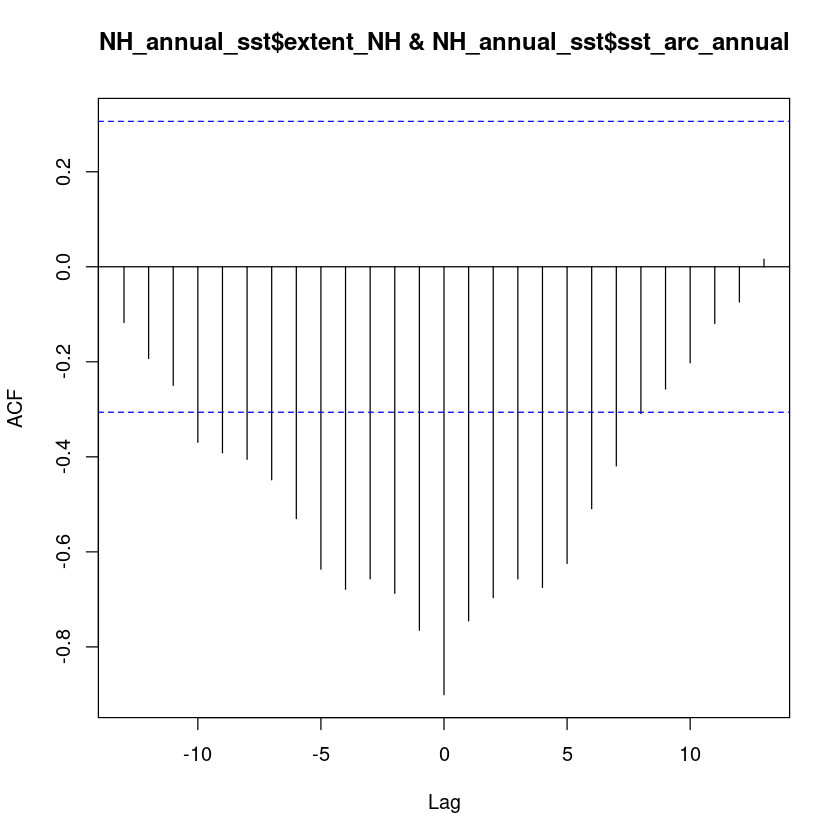

In [379]:
# cross-correlation between ANNUAL Arctic Sea Ice Extent and Arctic Sea Surface Temperature
# We do that to check if there is a lag between the Arctic Sea Surface Temperature sst_arc_annual
#                                                 and the Sea Ice Extent extent_NH
cross_correlation <- ccf(NH_annual_sst$extent_NH, NH_annual_sst$sst_arc_annual)

cross_correlation

In this annual data, The only peak is at lag of zero. So there is no lag between sst and Sea Ice Extent.


Autocorrelations of series ‘X’, by lag

   -24    -23    -22    -21    -20    -19    -18    -17    -16    -15    -14 
-0.856 -0.878 -0.620 -0.194  0.237  0.561  0.726  0.716  0.540  0.227 -0.176 
   -13    -12    -11    -10     -9     -8     -7     -6     -5     -4     -3 
-0.589 -0.876 -0.899 -0.636 -0.201  0.239  0.570  0.739  0.730  0.550  0.231 
    -2     -1      0      1      2      3      4      5      6      7      8 
-0.183 -0.608 -0.904 -0.919 -0.642 -0.203  0.234  0.562  0.730  0.722  0.547 
     9     10     11     12     13     14     15     16     17     18     19 
 0.233 -0.173 -0.587 -0.870 -0.887 -0.621 -0.195  0.230  0.549  0.714  0.707 
    20     21     22     23     24 
 0.537  0.232 -0.164 -0.569 -0.845 

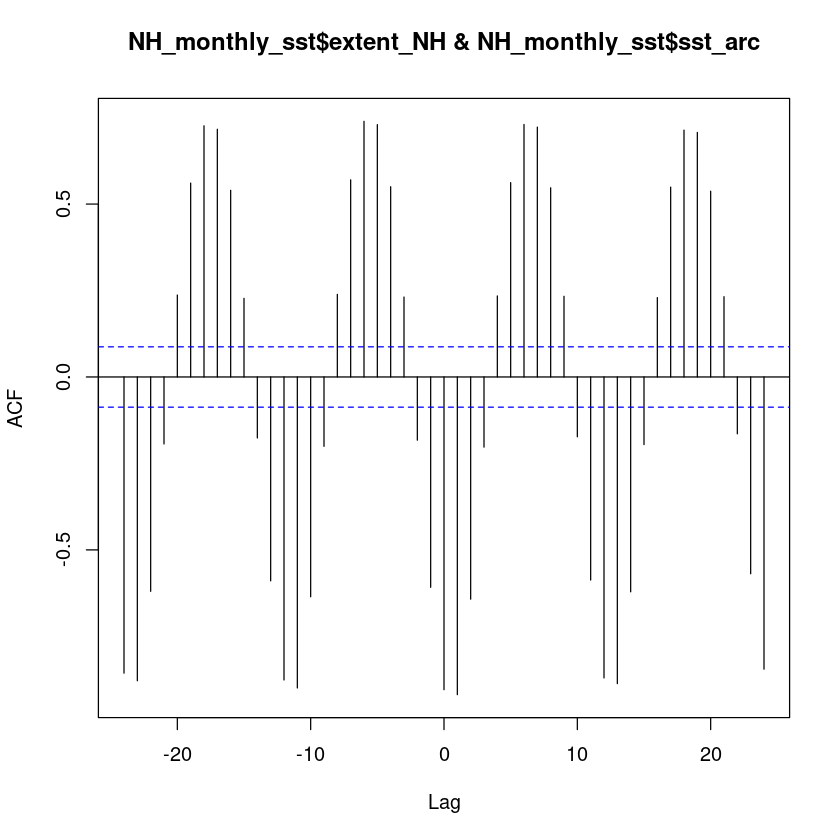

In [380]:
# cross-correlation between Monthly Arctic Sea Ice Extent and Arctic Sea Surface Temperature
# We do that to check if there is a lag between the Arctic Sea Surface Temperature sst_arc_annual
#                                                 and the Sea Ice Extent extent_NH
cross_correlation <- ccf(NH_monthly_sst$extent_NH, NH_monthly_sst$sst_arc)

cross_correlation

From the cross-correlation plot above, there is a clear cycle of (12 months) which is the result natural seasonality

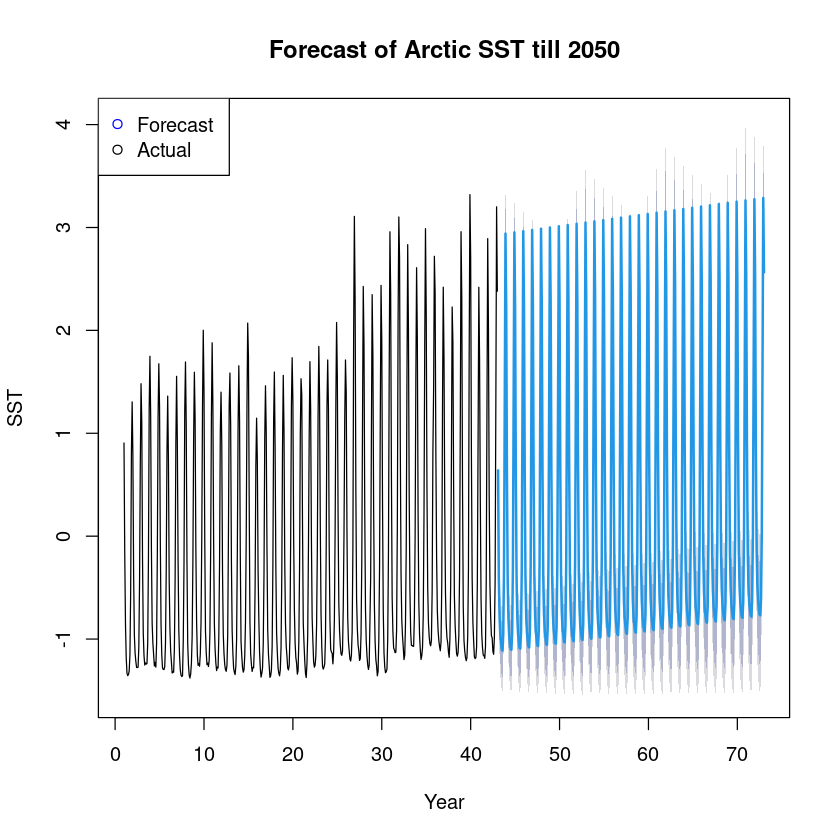

In [418]:
# Create a time series object for NH_monthly_sst$sst_arc
sst_ts <- ts(NH_monthly_sst$sst_arc, frequency = 12)

# Fit a seasonal ARIMA model to the time series data
model <- auto.arima(sst_ts)

# Forecast the values for the next 30 years (360 months)
forecast <- forecast(model, h = 360)

# Plot the forecasted values
plot(forecast, main = "Forecast of Arctic SST till 2050", xlab = "Year", ylab = "SST")

# Add the actual data points for comparison
#points(NH_monthly_sst$date, NH_monthly_sst$sst_arc, col = "red")

# Add a legend
legend("topleft", legend = c("Forecast", "Actual"), col = c("blue", "black"), pch = c(1, 1))

In [400]:
summary(forecast)


Forecast method: ARIMA(1,0,1)(0,1,1)[12] with drift

Model Information:
Series: sst_ts 
ARIMA(1,0,1)(0,1,1)[12] with drift 

Coefficients:
         ar1     ma1     sma1  drift
      0.5986  0.3348  -0.7065  1e-03
s.e.  0.0460  0.0540   0.0314  5e-04

sigma^2 = 0.01742:  log likelihood = 296.26
AIC=-582.52   AICc=-582.4   BIC=-561.52

Error measures:
                       ME      RMSE        MAE       MPE    MAPE      MASE
Training set 0.0004585412 0.1298659 0.07959986 0.7482496 21.2521 0.5199834
                    ACF1
Training set 0.004831341

Forecasts:
       Point Forecast      Lo 80         Hi 80      Lo 95        Hi 95
Feb 43    0.639418844  0.4702882  0.8085494967  0.3807558  0.898081856
Mar 43   -0.408116479 -0.6394678 -0.1767651414 -0.7619378 -0.054295141
Apr 43   -0.786537931 -1.0364398 -0.5366360796 -1.1687298 -0.404346030
May 43   -0.960100194 -1.2163216 -0.7038788082 -1.3519570 -0.568243400
Jun 43   -1.039442838 -1.2978907 -0.7809949402 -1.4347048 -0.644180888
Jul 43   

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


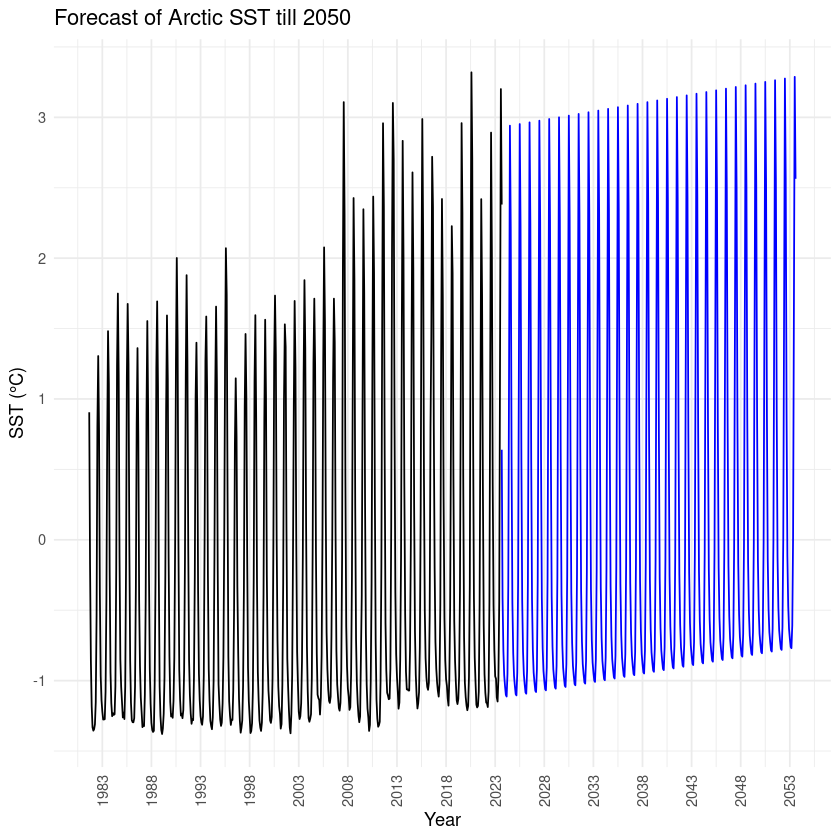

In [409]:
# plot it using ggplot

# Convert the forecasted values to a dataframe
forecast_sst <- data.frame(date = seq(max(NH_monthly_sst$date) + 1, length.out = 360, by = "month"), forecast = forecast$mean)

# Plot the forecasted values using ggplot
ggplot() +
  geom_line(data = forecast_sst, aes(x = date, y = forecast), color = "blue", linetype = "solid") +
  geom_line(data = NH_monthly_sst, aes(x = date, y = sst_arc), color = "black") +
  labs(title = "Forecast of Arctic SST till 2050", x = "Year", y = "SST (°C)") +
  theme_minimal() +
  theme(legend.position = "top") +
  scale_x_date(date_labels = "%Y", date_breaks = "5 years") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [411]:
forecast_sst

date       forecast    
1   2023-09-02  0.6394188  
2   2023-10-02 -0.4081165  
3   2023-11-02 -0.7865379  
4   2023-12-02 -0.9601002  
5   2024-01-02 -1.0394428  
6   2024-02-02 -1.1017448  
7   2024-03-02 -1.1129383  
8   2024-04-02 -0.9533414  
9   2024-05-02 -0.3269932  
10  2024-06-02  1.3090129  
11  2024-07-02  2.9408729  
12  2024-08-02  2.2168344  
13  2024-09-02  0.5666999  
14  2024-10-02 -0.4468379  
15  2024-11-02 -0.8049100  
16  2024-12-02 -0.9662919  
17  2025-01-02 -1.0383439  
18  2025-02-02 -1.0962821  
19  2025-03-02 -1.1048635  
20  2025-04-02 -0.9437032  
21  2025-05-02 -0.3164191  
22  2025-06-02  1.3201470  
23  2025-07-02  2.9523423  
24  2025-08-02  2.2285045  
25  2025-09-02  0.5784901  
26  2025-10-02 -0.4349758  
27  2025-11-02 -0.7930048  
28  2025-12-02 -0.9543610  
29  2026-01-02 -1.0263976  
30  2026-02-02 -1.0843265  
⋮   ⋮          ⋮           
331 2051-03-02 -0.793668593
332 2051-04-02 -0.632504952
333 2051-05-02 -0.005218876
334 2051-06-02  1.631348459
335 2051-07-02  3.263544452
336 2051-08-02  2.539707108
337 2051-09-02  0.889692965
338 2051-10-02 -0.123772825
339 2051-11-02 -0.481801703
340 2051-12-02 -0.643157836
341 2052-01-02 -0.715194409
342 2052-02-02 -0.773123310
343 2052-03-02 -0.781699239
344 2052-04-02 -0.620535598
345 2052-05-02  0.006750478
346 2052-06-02  1.643317812
347 2052-07-02  3.275513806
348 2052-08-02  2.551676461
349 2052-09-02  0.901662319
350 2052-10-02 -0.111803472
351 2052-11-02 -0.469832349
352 2052-12-02 -0.631188483
353 2053-01-02 -0.703225055
354 2053-02-02 -0.761153956
355 2053-03-02 -0.769729886
356 2053-04-02 -0.608566244
357 2053-05-02  0.018719831
358 2053-06-02  1.655287166
359 2053-07-02  3.287483160
360 2053-08-02  2.563645815

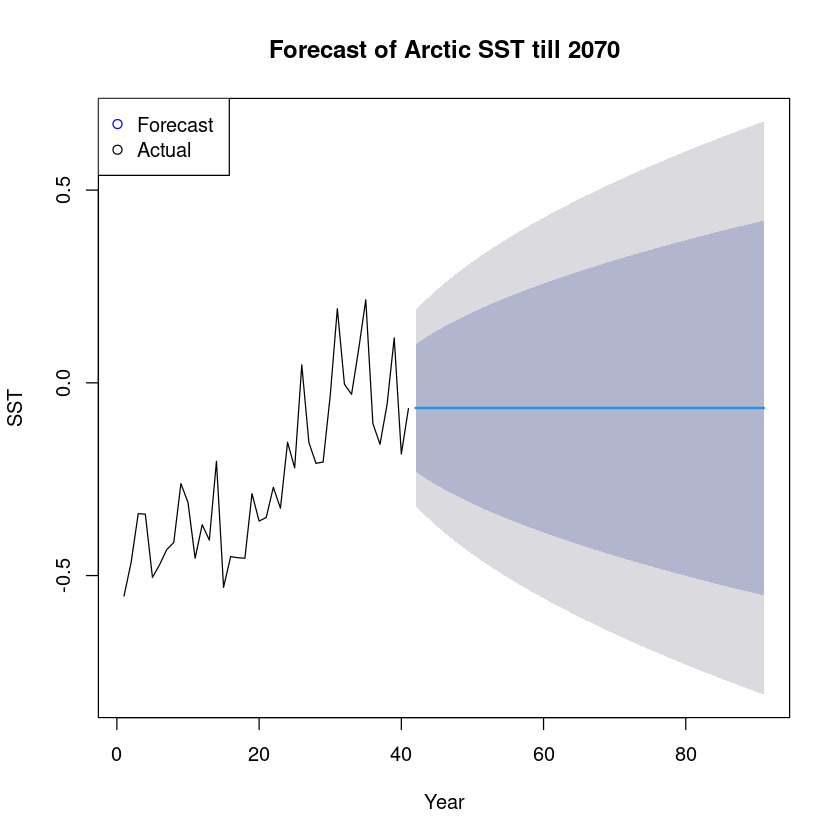

In [423]:
# Create a time series object for NH_annual_sst$sst_arc_annual
sst_ts <- ts(NH_annual_sst$sst_arc_annual, frequency = 1)

# Fit a seasonal ARIMA model to the time series data
model <- auto.arima(sst_ts)

# Forecast the values for the next 50 years (50 annual observations)
forecast <- forecast(model, h = 50)

# Plot the forecasted values
plot(forecast, main = "Forecast of Arctic SST till 2070", xlab = "Year", ylab = "SST")

# Add the actual data points for comparison
#points(NH_annual_sst$date, NH_annual_sst$sst_arc_annual, col = "red")

# Add a legend
legend("topleft", legend = c("Forecast", "Actual"), col = c("blue", "black"), pch = c(1, 1))

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


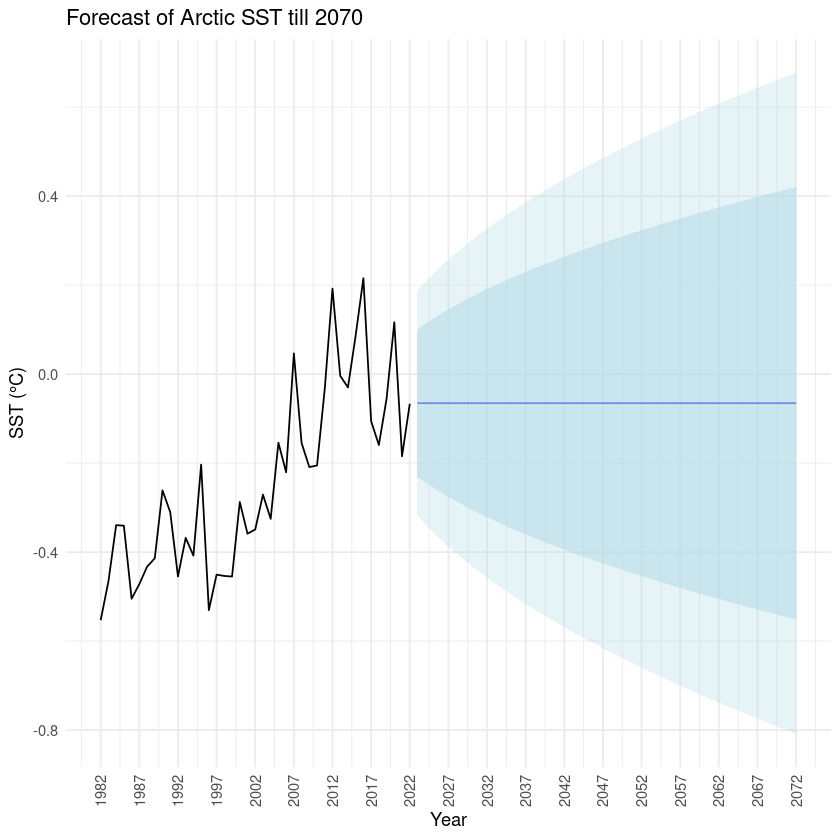

In [429]:
# Convert the forecasted values to a dataframe
forecast_sst <- data.frame(date = seq(max(NH_annual_sst$year) + 1, length.out = 50, by = 1), 
                           forecast_mean = forecast$mean,
                           forecast_lo80 = forecast$lower[, "80%"],
                           forecast_hi80 = forecast$upper[, "80%"],
                           forecast_lo95 = forecast$lower[, "95%"],
                           forecast_hi95 = forecast$upper[, "95%"])

# Plot the forecasted values using ggplot
ggplot() +
  geom_line(data = forecast_sst, aes(x = date, y = forecast_mean), color = "blue", linetype = "solid") +
  geom_ribbon(data = forecast_sst, aes(x = date, ymin = forecast_lo80, ymax = forecast_hi80), fill = "lightblue", alpha = 0.5) +
  geom_ribbon(data = forecast_sst, aes(x = date, ymin = forecast_lo95, ymax = forecast_hi95), fill = "lightblue", alpha = 0.3) +
  geom_line(data = NH_annual_sst, aes(x = year, y = sst_arc_annual), color = "black") +
  labs(title = "Forecast of Arctic SST till 2070", x = "Year", y = "SST (°C)") +
  theme_minimal() +
  theme(legend.position = "top") +
  scale_x_continuous(breaks = seq(min(NH_annual_sst$year), max(NH_annual_sst$year) + 50, by = 5)) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [425]:
forecast_sst

date forecast   
1  2023 -0.06525272
2  2024 -0.06525272
3  2025 -0.06525272
4  2026 -0.06525272
5  2027 -0.06525272
6  2028 -0.06525272
7  2029 -0.06525272
8  2030 -0.06525272
9  2031 -0.06525272
10 2032 -0.06525272
11 2033 -0.06525272
12 2034 -0.06525272
13 2035 -0.06525272
14 2036 -0.06525272
15 2037 -0.06525272
16 2038 -0.06525272
17 2039 -0.06525272
18 2040 -0.06525272
19 2041 -0.06525272
20 2042 -0.06525272
21 2043 -0.06525272
22 2044 -0.06525272
23 2045 -0.06525272
24 2046 -0.06525272
25 2047 -0.06525272
26 2048 -0.06525272
27 2049 -0.06525272
28 2050 -0.06525272
29 2051 -0.06525272
30 2052 -0.06525272
31 2053 -0.06525272
32 2054 -0.06525272
33 2055 -0.06525272
34 2056 -0.06525272
35 2057 -0.06525272
36 2058 -0.06525272
37 2059 -0.06525272
38 2060 -0.06525272
39 2061 -0.06525272
40 2062 -0.06525272
41 2063 -0.06525272
42 2064 -0.06525272
43 2065 -0.06525272
44 2066 -0.06525272
45 2067 -0.06525272
46 2068 -0.06525272
47 2069 -0.06525272
48 2070 -0.06525272
49 2071 -0.06525272
50 2072 -0.06525272

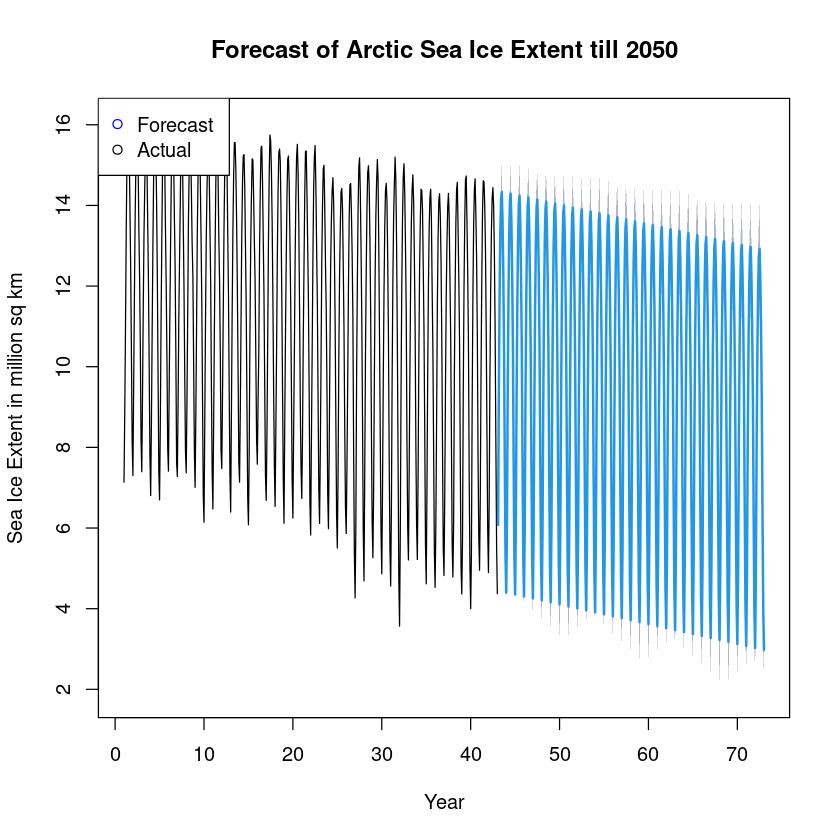

In [421]:
# Create a time series object for NH_monthly_sst$extent_NH
extent_ts <- ts(NH_monthly_sst$extent_NH, frequency = 12)

# Fit a seasonal ARIMA model to the time series data
model <- auto.arima(extent_ts)

# Forecast the values for the next 30 years (360 months)
forecast <- forecast(model, h = 360)

# Plot the forecasted values
plot(forecast, main = "Forecast of Arctic Sea Ice Extent till 2050", xlab = "Year", ylab = "Sea Ice Extent in million sq km")

# Add the actual data points for comparison
#points(NH_monthly_sst$date, NH_monthly_sst$extent_NH, col = "red")

# Add a legend
legend("topleft", legend = c("Forecast", "Actual"), col = c("blue", "black"), pch = c(1, 1))

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


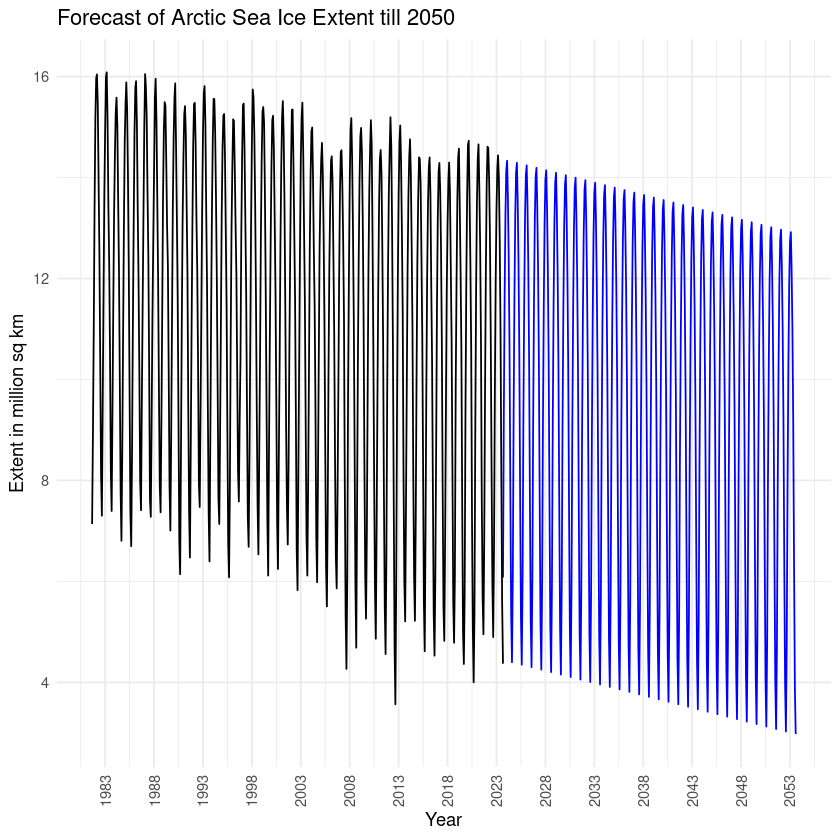

In [422]:
# Convert the forecasted values to a dataframe
forecast_extent <- data.frame(date = seq(max(NH_monthly_sst$date) + 1, length.out = 360, by = "month"), forecast = forecast$mean)

# Plot the forecasted values using ggplot
ggplot() +
  geom_line(data = forecast_extent, aes(x = date, y = forecast), color = "blue", linetype = "solid") +
  geom_line(data = NH_monthly_sst, aes(x = date, y = extent_NH), color = "black") +
  labs(title = "Forecast of Arctic Sea Ice Extent till 2050", x = "Year", y = "Extent in million sq km") +
  theme_minimal() +
  theme(legend.position = "top") +
  scale_x_date(date_labels = "%Y", date_breaks = "5 years") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


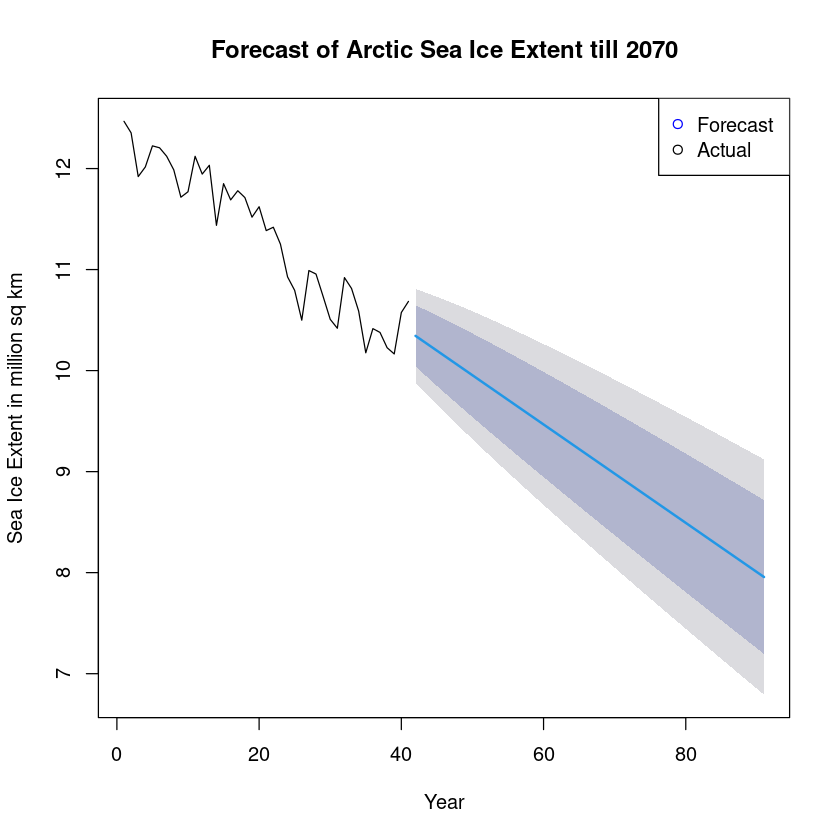

In [432]:
# Create a time series object for NH_annual_sst$extent_NH
extent_ts <- ts(NH_annual_sst$extent_NH, frequency = 1)

# Fit a seasonal ARIMA model to the time series data
model <- auto.arima(extent_ts)

# Forecast the values for the next 50 years (50 annual observations)
forecast <- forecast(model, h = 50)

# Plot the forecasted values
plot(forecast, main = "Forecast of Arctic Sea Ice Extent till 2070", xlab = "Year", ylab = "Sea Ice Extent in million sq km")

# Add the actual data points for comparison
#points(NH_annual_sst$date, NH_annual_sst$extent_NH, col = "red")

# Add a legend
legend("topright", legend = c("Forecast", "Actual"), col = c("blue", "black"), pch = c(1, 1))

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


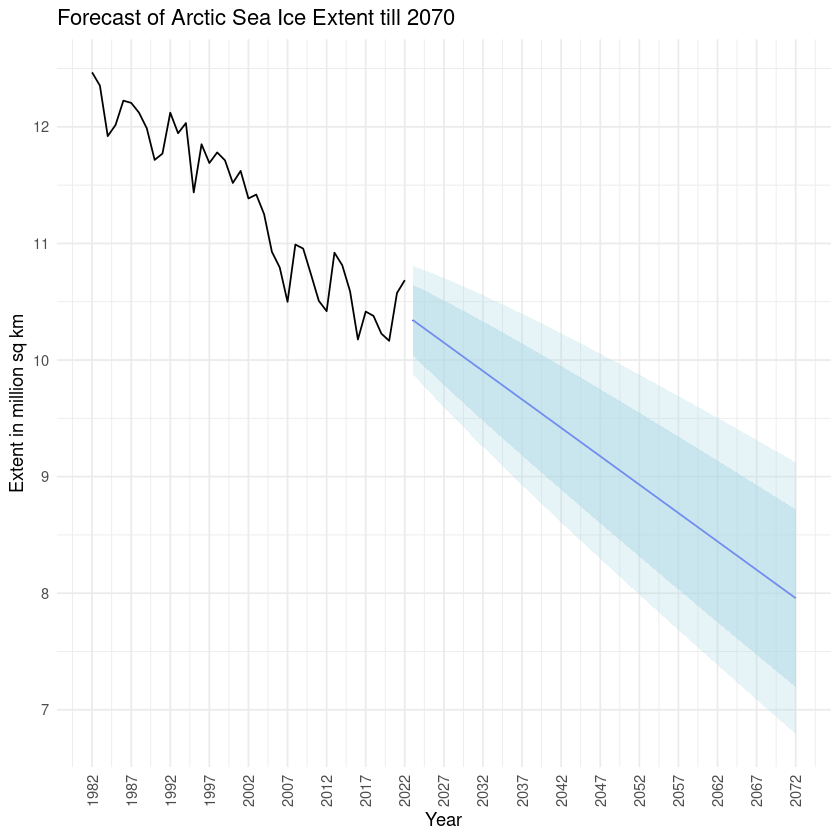

In [433]:
# Convert the forecasted values to a dataframe
forecast_extent <- data.frame(date = seq(max(NH_annual_sst$year) + 1, length.out = 50, by = 1), 
                              forecast_mean = forecast$mean,
                              forecast_lo80 = forecast$lower[, "80%"],
                              forecast_hi80 = forecast$upper[, "80%"],
                              forecast_lo95 = forecast$lower[, "95%"],
                              forecast_hi95 = forecast$upper[, "95%"])

# Plot the forecasted values using ggplot
ggplot() +
  geom_line(data = forecast_extent, aes(x = date, y = forecast_mean), color = "blue", linetype = "solid") +
  geom_ribbon(data = forecast_extent, aes(x = date, ymin = forecast_lo80, ymax = forecast_hi80), fill = "lightblue", alpha = 0.5) +
  geom_ribbon(data = forecast_extent, aes(x = date, ymin = forecast_lo95, ymax = forecast_hi95), fill = "lightblue", alpha = 0.3) +
  geom_line(data = NH_annual_sst, aes(x = year, y = extent_NH), color = "black") +
  labs(title = "Forecast of Arctic Sea Ice Extent till 2070", x = "Year", y = "Extent in million sq km") +
  theme_minimal() +
  theme(legend.position = "top") +
  scale_x_continuous(breaks = seq(min(NH_annual_sst$year), max(NH_annual_sst$year) + 50, by = 5)) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

In [436]:
install.packages('randomForest')

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/randomForest_4.7-1.1.tar.gz' ...
	OK [downloaded 256.8 Kb in 1 secs]
Installing randomForest [4.7-1.1] ...
	OK [installed binary]
Moving randomForest [4.7-1.1] into the cache ...
	OK [moved to cache in 0.27 milliseconds]


In [440]:
# Load the randomForest package
library(randomForest)

# Create the random forest model
rf_model <- randomForest(extent_NH ~ sst_arc_annual , data = NH_annual_sst)

# Print the random forest model
rf_model


Call:
 randomForest(formula = extent_NH ~ sst_arc_annual, data = NH_annual_sst) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.0999373
                    % Var explained: 78.84

78.84 % of the data (Sea Ice Extent) variation is explained by the random forest model

In comparison, the linear regression model above have R² value of 0.81 indicates that approximately 81% of the variability in 'extent_NH' can be explained by 'sst_arc_annual'.  

Can that indicate that linear regression model is better for this situation of one variable?   
Let us visualize both prediction methods.

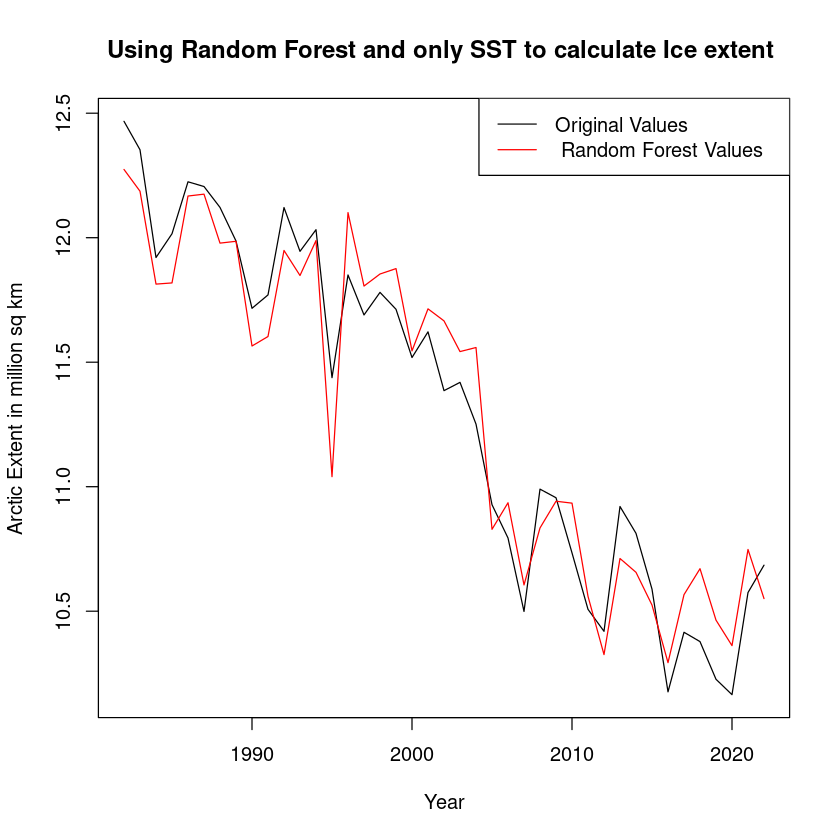

In [444]:
# Plotting the original values
plot(NH_annual_sst$year, NH_annual_sst$extent_NH, type = "l", xlab = "Year", ylab = "Arctic Extent in million sq km", main = "Using Random Forest and only SST to calculate Ice extent ")

# Adding the rf_model values to the plot
lines(NH_annual_sst$year, predict(rf_model, NH_annual_sst), col = "red")

# Adding a legend
legend("topright", legend = c("Original Values", " Random Forest Values"), col = c("black", "red"), lty = 1)

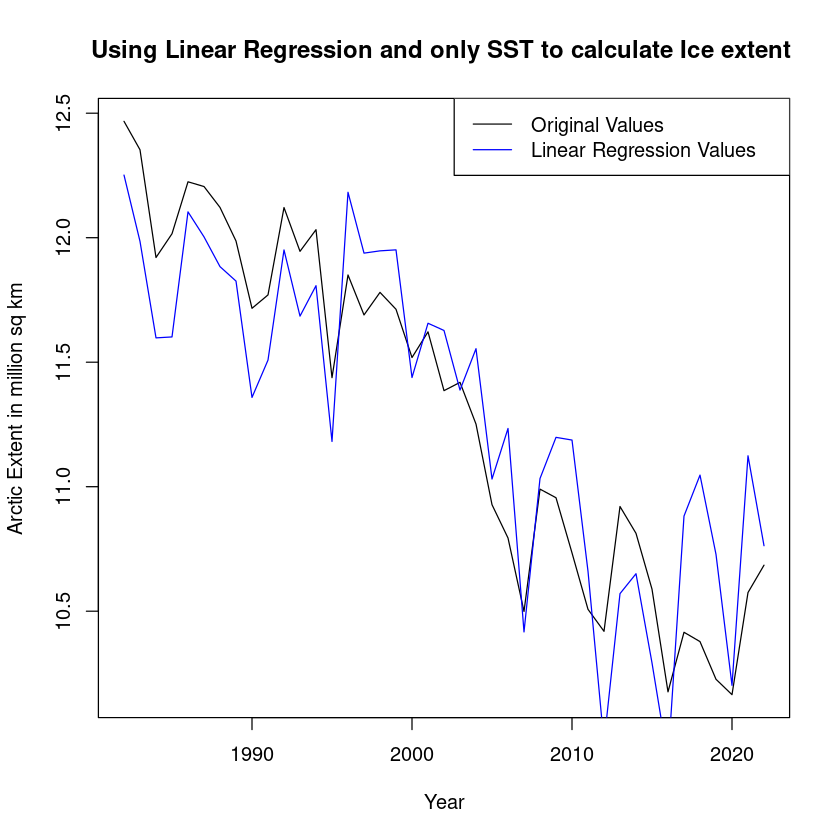

In [446]:
# Plotting the original values
plot(NH_annual_sst$year, NH_annual_sst$extent_NH, type = "l", xlab = "Year", ylab = "Arctic Extent in million sq km", main = "Using Linear Regression and only SST to calculate Ice extent ")

# Adding the linear_model_sst_ice values to the plot
lines(NH_annual_sst$year, predict(linear_model_sst_ice, NH_annual_sst), col = "blue")

# Adding a legend
legend("topright", legend = c("Original Values", "Linear Regression Values"), col = c("black", "blue"), lty = 1)

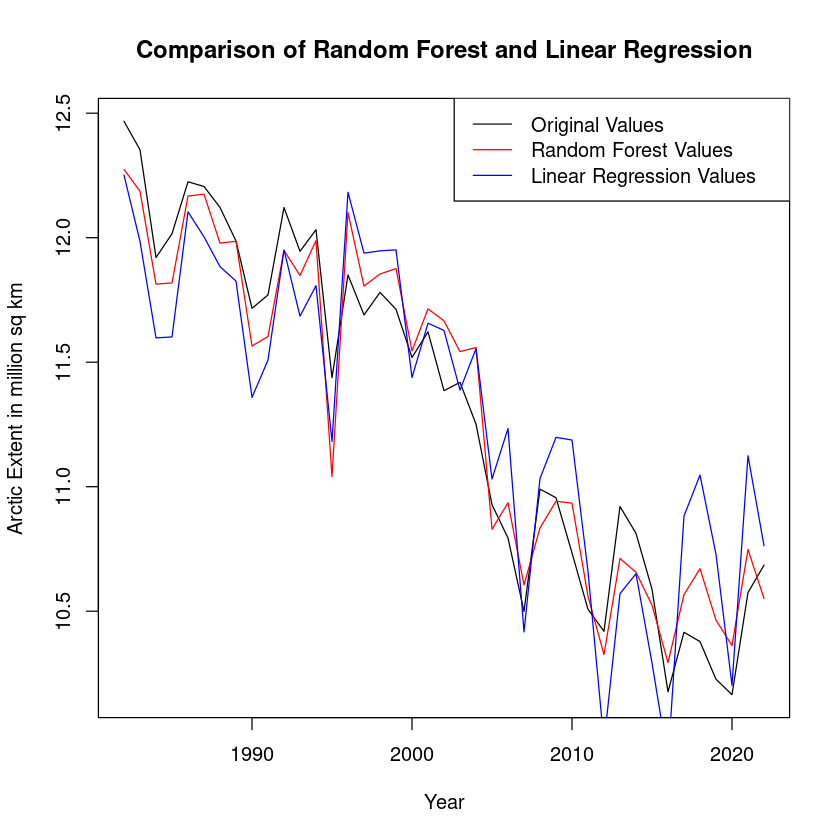

In [447]:
# Plotting the original values
plot(NH_annual_sst$year, NH_annual_sst$extent_NH, type = "l", xlab = "Year", ylab = "Arctic Extent in million sq km", main = "Comparison of Random Forest and Linear Regression")

# Adding the rf_model values to the plot
lines(NH_annual_sst$year, predict(rf_model, NH_annual_sst), col = "red")

# Adding the linear_model_sst_ice values to the plot
lines(NH_annual_sst$year, predict(linear_model_sst_ice, NH_annual_sst), col = "blue")

# Adding a legend
legend("topright", legend = c("Original Values", "Random Forest Values", "Linear Regression Values"), col = c("black", "red", "blue"), lty = 1)

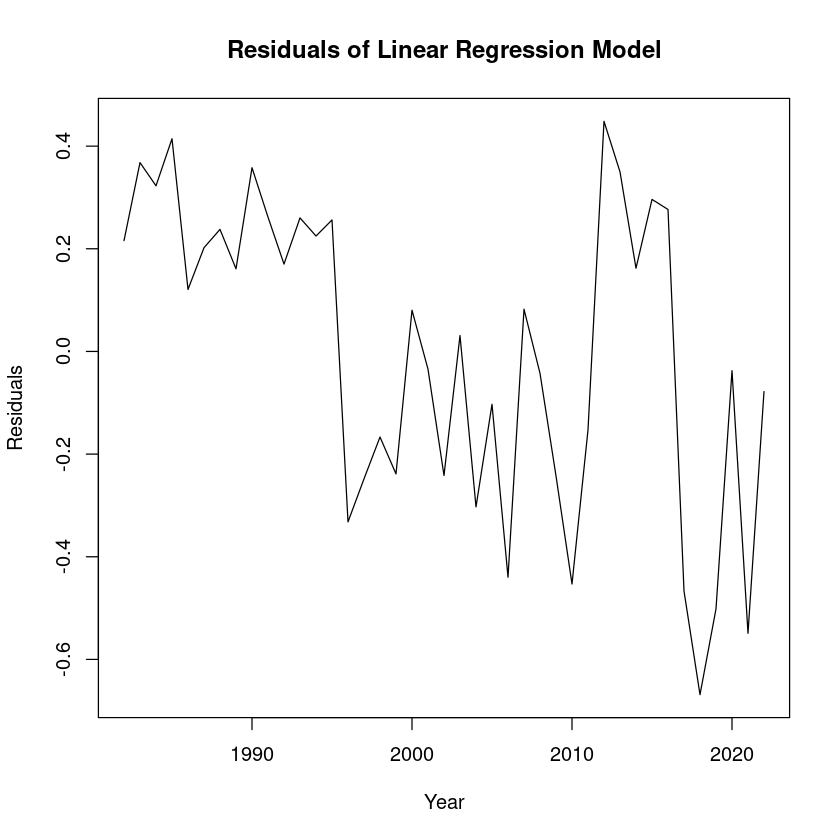

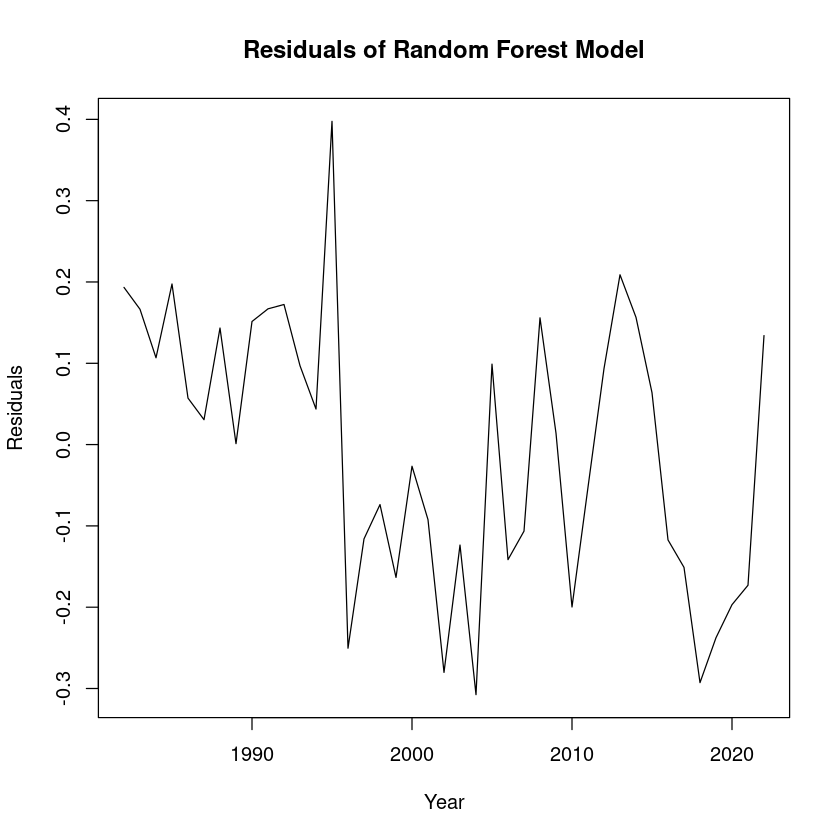

In [448]:
# Calculate the residuals for the linear regression model
linear_residuals <- NH_annual_sst$extent_NH - predict(linear_model_sst_ice, NH_annual_sst)

# Plot the residuals of the linear regression model
plot(NH_annual_sst$year, linear_residuals, type = "l", xlab = "Year", ylab = "Residuals", main = "Residuals of Linear Regression Model")

# Calculate the residuals for the random forest model
rf_residuals <- NH_annual_sst$extent_NH - predict(rf_model, NH_annual_sst)

# Plot the residuals of the random forest model
plot(NH_annual_sst$year, rf_residuals, type = "l", xlab = "Year", ylab = "Residuals", main = "Residuals of Random Forest Model")

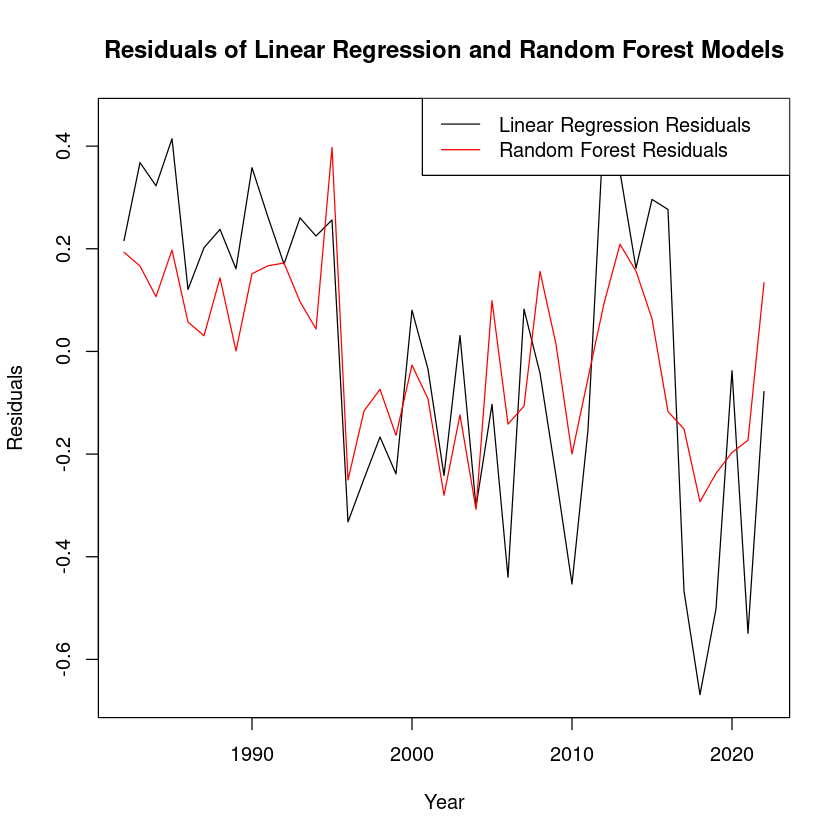

In [449]:
# Calculate the residuals for the linear regression model
linear_residuals <- NH_annual_sst$extent_NH - predict(linear_model_sst_ice, NH_annual_sst)

# Calculate the residuals for the random forest model
rf_residuals <- NH_annual_sst$extent_NH - predict(rf_model, NH_annual_sst)

# Plot the residuals of both models on one plot
plot(NH_annual_sst$year, linear_residuals, type = "l", xlab = "Year", ylab = "Residuals", main = "Residuals of Linear Regression and Random Forest Models")
lines(NH_annual_sst$year, rf_residuals, col = "red")

# Adding a legend
legend("topright", legend = c("Linear Regression Residuals", "Random Forest Residuals"), col = c("black", "red"), lty = 1)

[1] "linear_mse is  0.0892802760692318"
[1] "random forest mse is  0.0280636634019316"
[1] "The random forest model performs better."


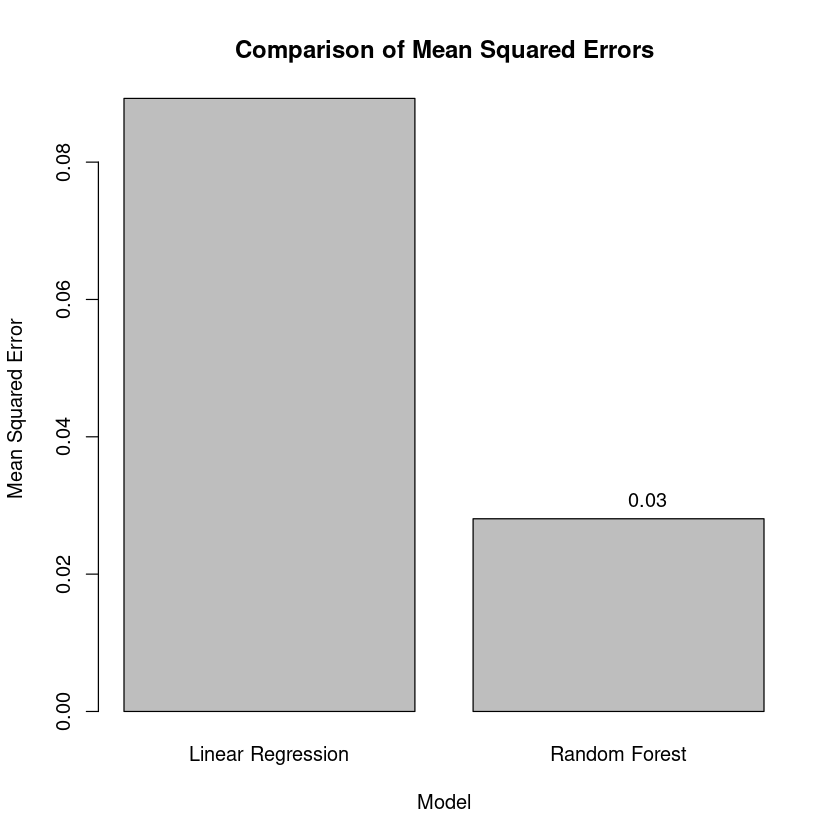

In [455]:
# Calculate the residuals for the linear regression model
linear_residuals <- NH_annual_sst$extent_NH - predict(linear_model_sst_ice, NH_annual_sst)

# Calculate the residuals for the random forest model
rf_residuals <- NH_annual_sst$extent_NH - predict(rf_model, NH_annual_sst)

# Calculate the mean squared error for linear regression model
linear_mse <- mean(linear_residuals^2)
print(paste('linear_mse is ', linear_mse))

# Calculate the mean squared error for random forest model
rf_mse <- mean(rf_residuals^2)
print(paste('random forest mse is ', rf_mse))

# Plot the mean squared errors of both models
barplot(c(linear_mse, rf_mse), names.arg = c("Linear Regression", "Random Forest"), 
        xlab = "Model", ylab = "Mean Squared Error", main = "Comparison of Mean Squared Errors")

# Add text labels to the bars
text(x = c(1, 2), y = c(linear_mse, rf_mse), labels = c(round(linear_mse, 2), round(rf_mse, 2)), 
     pos = 3, col = "black")

# Compare the mean squared errors of the linear and random forest models
if (linear_mse < rf_mse) {
  print("The linear regression model performs better.")
} else if (rf_mse < linear_mse) {
  print("The random forest model performs better.")
} else {
  print("Both models perform equally well.")
}

Conclusion   

**Random Forest is better**